# Desafío1  Limpieza de datos y análisis exploratorio   Properati

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import re as re
from collections import Counter
pd.options.display.max_colwidth=700


In [2]:
prope=pd.read_csv('properatti.csv',index_col=0)
prope.head()


,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mataderos_lavadero_patio_inmobiliaria-fedele,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO, REFACCIONADO A NUEVO, PATIO GRANDE, CON LAVADERO, LIVING COMEDOR CON COCINA INTEGRADA, ARTEFACTO DE COCINA, ALACENA, BAÑO COMPLETO, Y DORMITORIO. TODO EN EXCELENTE ESTADO, PARA HABITAR.NO ES APTO CREDITO Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIKufMJMwHtquzhk=/trim/198x0/smart/filters:strip_icc()/inmobiliariafedele.com/photos/CARHUE%202278-IMG_3400.JPG
1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_departamentos_la-plata_balcon_lavadero_toilette_garage_estrenar_antonini-propiedades_dcp,"Venta de departamento en décimo piso al frente, a estrenar. Living comedor con ventanales hacia el balcón con pisos de madera. Cocina completa con doble mesada, muebles bajo mesada. Lavadero separado. Toilette.Dormitorio con placard. Segundo dormitorio a dividir. Calefacción por radiadorBaño completo.Balcón corrido. Posibilidad de cochera semicubierta. U$D 20.000 Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).",VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv45KAKirGL3JM8=/trim/198x0/smart/filters:strip_icc()/antoninipropiedades.com/photos/401-1-7%20y%2037%2010A%201.jpg
2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_departamentos_mataderos_lavadero_placard_inmobiliaria-fedele,"2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AMPLIO COCINA SEPARADA CON LAVADERO, BAÑO COMPLETO Y DORMITORIO CON PLACARD. BAJAS EXPENSAS, EXCELENTE UBICACION Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).",2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_Ejwfu6QpW4cH0=/trim/198x0/smart/filters:strip_icc()/inmobiliariafedele.com/photos/GUAMINI%201171-IMG_3403.JPG
3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_liniers_patio_g-goffredo,"PH 3 ambientes con patio. Hay 3 deptos en lote, 2 en PB y 1 en 1º piso.Reciclado a nuevo. ""Muy buen estado"" Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).",PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SPyleyeQlIypI8w=/trim/198x0/smart/filters:strip_icc()/ggoffredo.com/photos/GG0040-1563480102.jpg
4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Centro|,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,...,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_departamentos_centro_cristina-pavone-negocios-inmobiliarios,"DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURAL, AL CONTRAFRENTE, EDIFICIO DE POCAS UNIDADES Y MUY BIEN CONSERVADO. EN ESTADO ORIGINAL.-POSEE: 1 DORMITORIOS, 1 BAÑO COMPLETO, LIVING COMEDOR Y COCINA SEPARADA.-EN ESTADO ORIGINAL.- Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).",DEPTO 

In [3]:
prope.dtypes #veo  type de los datos

operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
properati_url                  object
description                    object
title                          object
image_thumbnail                object
dtype: object

In [4]:
nulos=prope.isnull().sum() #cuento nulos
nulos


operation                          0
property_type                      0
place_name                        23
place_with_parent_names            0
country_name                       0
state_name                         0
geonames_id                    18717
lat-lon                        51550
lat                            51550
lon                            51550
price                          20410
currency                       20411
price_aprox_local_currency     20410
price_aprox_usd                20410
surface_total_in_m2            39328
surface_covered_in_m2          19907
price_usd_per_m2               52603
price_per_m2                   33562
floor                         113321
rooms                          73830
expenses                      106958
properati_url                      0
description                        2
title                              0
image_thumbnail                 3112
dtype: int64

In [5]:
non_na=prope.count() #cuento no nulos
total=non_na+nulos #cuento total
porc_nulos=((nulos/total)*100.).sort_values(ascending=False)
print(round(porc_nulos,5)) #veo el % de nulos sobre el total

floor                         93.48375
expenses                      88.23461
rooms                         60.90579
price_usd_per_m2              43.39465
lon                           42.52599
lat-lon                       42.52599
lat                           42.52599
surface_total_in_m2           32.44349
price_per_m2                  27.68685
currency                      16.83798
price_aprox_local_currency    16.83716
price_aprox_usd               16.83716
price                         16.83716
surface_covered_in_m2         16.42221
geonames_id                   15.44052
image_thumbnail                2.56723
place_name                     0.01897
description                    0.00165
title                          0.00000
properati_url                  0.00000
state_name                     0.00000
country_name                   0.00000
place_with_parent_names        0.00000
property_type                  0.00000
operation                      0.00000
dtype: float64


De aca podemos interpretar que varias de las columnas que son relevantes a la hora de hablar de un futuro predictor para tasar propediedad se encuentran bastante incompletas, como por ejemplo rooms(numero de ambientes) o precio en usd por metro cuadrado.
Vamos a tener que investigar posibles estrategias para obtener los datos faltantes

In [6]:
prope[prope['place_name'].isnull()][['place_name','place_with_parent_names']]
#como observamos todos los registros que no tienen place name figuran de Tigre

,place_name,place_with_parent_names
6489,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
10201,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
11451,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
14839,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
18622,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
21922,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
23664,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
24722,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
38856,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||
45970,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||


In [7]:
prope['place_name'].fillna("Tigre",inplace=True)
#rellenamos los NaN de place name con "Tigre"

In [8]:
print(prope['country_name'].unique())
print(prope['operation'].unique())

['Argentina']
['sell']


como observamos que los datos para las columnas Country name y Operation todos refieren al mismo valor, esta columna no
aporta informacion y por tanto puede ser eliminada a efectos de este analisis en particular.

In [9]:
prope.drop(columns="country_name", inplace=True)
prope.drop(columns="operation", inplace=True)

In [10]:
prope.shape

(121220, 23)

In [11]:
prope.columns

Index(['property_type', 'place_name', 'place_with_parent_names', 'state_name',
       'geonames_id', 'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail'],
      dtype='object')

In [12]:
prope['properati_url'].sample(5)

91594                                                                                                                                          http://www.properati.com.ar/1bbs7_venta_casa_punilla_cecilia-inmuebles_gjw
1382                                                                                          http://www.properati.com.ar/15i4k_venta_casa_pilar_suite_lavadero_toilette_luminoso_losa-radiante_moresco-bienes-raices_dyj
58758     http://www.properati.com.ar/19w8a_venta_departamento_caballito_balcon_gimnasio_hidromasaje_lavadero_parrilla_piscina_vista_sauna_electrogeno_tenis_amenities_losa-radiante_subte-linea-a_high-level-real-estate
106413                                           http://www.properati.com.ar/1bwcb_venta_departamento_general-pico_balcon_parrilla_patio_piscina_quincho_luminoso_lujoso_garage_jorge-audisio-servicios-inmobiliarios_gpm
14586                                                                                                                  http://ww

In [13]:
prope['image_thumbnail'].sample(5)

90251    https://thumbs4.properati.com/4/fjuyXkPxYey6YkZL94ddMrpTAgg=/trim/198x0/smart/filters:strip_icc()/tbcn.s3-accelerate.amazonaws.com/pictures/86239431184423709014154002238055972855774720265454987058048992547783354017147.jpg
41056                                                        https://thumbs4.properati.com/5/tKaYq-6jWSDFLB3wSn5CkIcDTY4=/trim/198x0/smart/filters:strip_icc()/remax.com.ar/UserImages/42/L_dc71240ac19549d4b3c08ca6aad6e969_iList.jpg
41437                                                                                 https://thumbs4.properati.com/5/Ys1uuykFPVgQtju8SEtsdmuK2HI=/trim/198x0/smart/filters:strip_icc()/inmobiliariasalerno.com.ar/photos/0107-1-1.jpg
96009     https://thumbs4.properati.com/4/NZtHPizPcXfdkaKXqZ-a5GuHxdA=/trim/198x0/smart/filters:strip_icc()/tbcn.s3-accelerate.amazonaws.com/pictures/6313359559743794065245751581991928763438195779624712651173053422161417315798.jpg
3411                                                                      ht

las variables properati_url e image_thumbnail no consideramos que sean relevantes para el analisis exploratorio ni 
para la limpieza de datos por tanto la vamos a desegregar del analisis

In [14]:
prope.drop(columns="properati_url", inplace=True)
prope.drop(columns="image_thumbnail", inplace=True)

In [15]:
prope.shape

(121220, 21)

In [16]:
check_duplicados = prope.iloc[:,1:].duplicated() == True
check_duplicados.sum()

5130

In [17]:
prope[prope.iloc[:,1:].duplicated()]

,property_type,place_name,place_with_parent_names,state_name,geonames_id,lat-lon,lat,lon,price,currency,...,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,description,title
221,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Capital Federal,3436077.0,"-34.5652650561,-58.438232802",-34.565265,-58.438233,237895.0,USD,...,237895.00,69.0,53.0,3447.753623,4488.584906,NaN,2.0,NaN,"El edificio está situado en el barrio de las Cañitas en la ciudad autonoma de Buenos Aires, en la calle Soldado de la Independencia 1100.Consta de 2 Subsuelos, Planta Baja y 9 pisos, con destino de vivienda multifamiliar y cocheras.El edificio se desarrolla entre medianeras, bajo el esquema de enrase. Respeta la altura de los edificios linderos y el peril de retiros. El piso 7 posee un retiro de 2 m al frente y en el piso 8 el retiro es de 1 metro al frente y de 4 mts al contrafrente generando terrazas en los respectivos departamentos.En el primer y segundo subsuelo se ubican 16 cocheras simples y 4 bauleras. 8 cocheras por nivel. El acceso vehicular a las cocheras es atraves de un as...",Ultimas Unidades
245,apartment,Rosario,|Argentina|Santa Fe|Rosario|,Santa Fe,3838574.0,"-32.9495571,-60.6582837",-32.949557,-60.658284,NaN,NaN,...,NaN,35.0,35.0,NaN,NaN,NaN,1.0,NaN,"Departamento de un ambiente al contrafrente con balcón. Tiene cocina integrada, con muebles de bajo mesada y alacenas, un baño completo.","Departamentos monoambiente, zona parque Independencia"
247,apartment,Rosario,|Argentina|Santa Fe|Rosario|,Santa Fe,3838574.0,"-32.9495571,-60.6582837",-32.949557,-60.658284,NaN,NaN,...,NaN,35.0,35.0,NaN,NaN,NaN,1.0,NaN,"Departamento de un ambiente al contrafrente con balcón. Tiene cocina integrada, con muebles de bajo mesada y alacenas, un baño completo.","Departamentos monoambiente, zona parque Independencia"
248,apartment,Rosario,|Argentina|Santa Fe|Rosario|,Santa Fe,3838574.0,"-32.9495571,-60.6582837",-32.949557,-60.658284,NaN,NaN,...,NaN,35.0,35.0,NaN,NaN,NaN,1.0,NaN,"Departamento de un ambiente al contrafrente con balcón. Tiene cocina integrada, con muebles de bajo mesada y alacenas, un baño completo.","Departamentos monoambiente, zona parque Independencia"
249,apartment,Rosario,|Argentina|Santa Fe|Rosario|,Santa Fe,3838574.0,"-32.9495571,-60.6582837",-32.949557,-60.658284,NaN,NaN,...,NaN,35.0,35.0,NaN,NaN,NaN,1.0,NaN,"Departamento de un ambiente al contrafrente con balcón. Tiene cocina integrada, con muebles de bajo mesada y alacenas, un baño completo.","Departamentos monoambiente, zona parque Independencia"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121201,apartment,Córdoba,|Argentina|Córdoba|,Córdoba,3860255.0,NaN,NaN,NaN,1498000.0,ARS,...,84013.34,50.0,NaN,1680.266800,NaN,NaN,NaN,NaN,"UBICACIÓNEstratégicamente ubicado en calle Obispo Trejo 825, estos departamentos en construcción, se encuentran en el corazón de Nueva Córdoba, a pasos de Palacio Ferreyra, Plaza España, Museo Caraffa, Parque Sarmiento, Paseo del buen Pastor, UNC, Bancos y Sanatorios.EDIFICIO BERDEA nos regala las mejores Visuales tanto de Nueva Córdoba y el Centro de laciudad, como del parque y alrededores.CARACTERÍSTICAS GENERALES1.\tDepartamentos de 1 y 2 dormitorios en PB y 14 Pisos Superiores, y Locales Comerciales en PB sobre calle Obispo Trejo.2.\tEquipamiento de muebles en melanina 18mm color Teka Ártico en cocina (bajo mesadas y alacenas) y puertas para placares en dormitorios e Interiores compl...",Departamento - Nueva Cordoba
121204,apartment,Córdoba,|Argentina|Córdoba|,Córdoba,3860255.0,NaN,NaN,NaN,1502000.0,ARS,...,84237.68,50.0,NaN,1684.753600,NaN,NaN,NaN,NaN,"UBICACIÓNEstratégicamente ubicado en calle Obispo Trejo 825, estos departamentos en construcción, se encuentran en el corazón de Nueva Córdoba, a pasos de Palacio Ferreyra, Plaza España, Museo Caraffa, Parque Sarmiento, Paseo del buen Pastor, UNC, Bancos y Sanatorios.EDIFICIO BERDEA nos regala las mejo

In [18]:
prope['duplicados'] = list(check_duplicados)

In [19]:
prope['duplicados'].value_counts()

False    116090
True       5130
Name: duplicados, dtype: int64

estas filas duplicadas a que se deben ?

In [20]:
prope[prope['duplicados']==True]['description']

221       El edificio está situado en el barrio de  las Cañitas en la ciudad  autonoma de Buenos Aires, en la calle Soldado de la Independencia 1100.Consta de 2 Subsuelos, Planta Baja y 9 pisos, con destino de vivienda multifamiliar y cocheras.El edificio se desarrolla entre medianeras, bajo el esquema de enrase. Respeta la altura de los edificios linderos y el peril de retiros. El piso 7 posee un retiro de 2 m al frente y en el piso 8 el retiro es de 1 metro al frente y de 4 mts al contrafrente generando terrazas en los respectivos departamentos.En el  primer y segundo subsuelo se ubican 16 cocheras simples y 4 bauleras. 8 cocheras por nivel. El acceso vehicular a las cocheras es atraves de un as...
245                                                                                                                                                                                                                                                                                               

corroboro que hay duplicacion de registros voy a segregarlos de mi analisis

In [21]:
prope=prope[prope['duplicados']==False]

In [22]:
prope['duplicados'].value_counts()

False    116090
Name: duplicados, dtype: int64

vamos a comenzar a trabar en limpiar un poco las variables referidas a ubicacion/localizacion

In [23]:
pattern = r'\|*([\w+\.*\s*]+)\|'
regex = re.compile(pattern, flags = re.IGNORECASE)

separa_list = []
for texto in prope["place_with_parent_names"]:
    separa_list.append(regex.findall(texto))
    
separa_df1 = pd.DataFrame(separa_list)   
separa_df1[2]

0             Mataderos
1              La Plata
2             Mataderos
3               Liniers
4         Mar del Plata
              ...      
116085         Belgrano
116086       San Isidro
116087    Villa Urquiza
116088    Mar del Plata
116089             None
Name: 2, Length: 116090, dtype: object

In [24]:
prope = pd.merge(prope, separa_df1, on = prope.index)
prope

,key_0,property_type,place_name,place_with_parent_names,state_name,geonames_id,lat-lon,lat,lon,price,...,rooms,expenses,description,title,duplicados,0,1,2,3,4
0,0,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,...,NaN,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO, REFACCIONADO A NUEVO, PATIO GRANDE, CON LAVADERO, LIVING COMEDOR CON COCINA INTEGRADA, ARTEFACTO DE COCINA, ALACENA, BAÑO COMPLETO, Y DORMITORIO. TODO EN EXCELENTE ESTADO, PARA HABITAR.NO ES APTO CREDITO Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).",2 AMB TIPO CASA SIN EXPENSAS EN PB,False,Argentina,Capital Federal,Mataderos,None,None
1,1,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,150000.0,...,NaN,NaN,"Venta de departamento en décimo piso al frente, a estrenar. Living comedor con ventanales hacia el balcón con pisos de madera. Cocina completa con doble mesada, muebles bajo mesada. Lavadero separado. Toilette.Dormitorio con placard. Segundo dormitorio a dividir. Calefacción por radiadorBaño completo.Balcón corrido. Posibilidad de cochera semicubierta. U$D 20.000 Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).",VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37,False,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,None,None
2,2,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,...,NaN,NaN,"2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AMPLIO COCINA SEPARADA CON LAVADERO, BAÑO COMPLETO Y DORMITORIO CON PLACARD. BAJAS EXPENSAS, EXCELENTE UBICACION Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).",2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,False,Argentina,Capital Federal,Mataderos,None,None
3,3,PH,Liniers,|Argentina|Capital Federal|Liniers|,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,95000.0,...,NaN,NaN,"PH 3 ambientes con patio. Hay 3 deptos en lote, 2 en PB y 1 en 1º piso.Reciclado a nuevo. ""Muy buen estado"" Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).",PH 3 amb. cfte. reciclado,False,Argentina,Capital Federal,Liniers,None,None
4,4,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Centro|,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,64000.0,...,NaN,NaN,"DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURAL, AL CONTRAFRENTE, EDIFICIO DE POCAS UNIDADES Y MUY BIEN CONSERVADO. EN ESTADO ORIGINAL.-POSEE: 1 DORMITORIOS, 1 BAÑO COMPLETO, LIVING COMEDOR Y COCINA SEPARADA.-EN ESTADO ORIGINAL.- Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).",DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA MITRE,False,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,Centro,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116085,121215,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Capital Federal,3436077.0,NaN,NaN,NaN,870000.0,...,NaN,10000.0,"TORRE FORUM ALCORTA - MÁXIMA CATEGORÍA.Impecable Departamento.Living comedor, toilette de recepción, con salida a un Balcón aterrazado con parrilla y mesa.2 dormitorios en suite, principal con vestidor.Cochera fijaOpción a compra de la segunda cochera.-Seguridad 24hs.-El complejo posee pileta de natación descubierta y pileta climatizada cubierta, Cancha de tenis cubierta y otra cancha de tenis descubierta, quincho con parrilla, gran salón de fiestas, plaza para chicos y micro cine. Las medidas, superficies y expensas consignadas en la presente descripción son aproximadas, a solo título orientativo y no son vinculantes. Las medidas y superficies reales surgen del Título respectivo. FEDERI...",Torre Forum Alcorta- Impecable 3 ambientes,False,Argentina,Capital Federal,Belg

In [25]:
prope = prope.rename(columns = {0:'pais',1:'provincia/zona',2:'ciudad',3:'barrio',4:'lugar'})

In [26]:
prope.drop(['pais', 'place_with_parent_names'], axis=1, inplace=True)


In [27]:
g = prope['provincia/zona']
h = prope["state_name"]
i = g == h
i.all()

True

In [28]:
prope.drop(columns='provincia/zona',inplace=True)

In [29]:
prope.columns

Index(['key_0', 'property_type', 'place_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'description', 'title', 'duplicados', 'ciudad',
       'barrio', 'lugar'],
      dtype='object')

In [30]:
#Chequeamos para las columnas 'place_name' y 'ciudad'
#las columnas 'place_name' y 'ciudad'son iguales y si es asi, borraremos una
j = prope['place_name']
k = prope["ciudad"]
l = j == k
l.all()
#no confirmamos la hipotesis 

False

In [31]:
# vamos a chequear si el conjunto X esta incluido dentro del conjunto Y, porque en place_name hay informacion que 
# parece que deberia estar en barrio y lugar. Para despues sacar columna place_name
mask_city = prope['place_name'] != prope['ciudad']
x = mask_city.value_counts()
x

False    81938
True     34152
dtype: int64

In [32]:
mask_otras = (prope['place_name'] == prope['barrio']) | (prope['place_name'] == prope['lugar'])
y = mask_otras.value_counts()
y

False    77203
True     38887
dtype: int64

In [33]:
# Con este analisis de conjuntos la idea es demostrar que mask_city esta contenida totalmente dentro de mask_otras
set(mask_city) & set(mask_otras) == set(mask_city)

True

In [34]:
# como esta contenida mask_city, puedo ver que los nulos en ciudad igualarlos al dato del place_name en este conjunto
no_mask_city = prope['ciudad'].isnull()
x1 = prope['place_name'][no_mask_city]
x1.sample (5)

58402           Santa Fe
20446            Mendoza
85158    Capital Federal
85667            Córdoba
84320            Córdoba
Name: place_name, dtype: object

In [35]:
# reemplazamos los nulos de la ciudad por los de place_name
prope.ciudad[no_mask_city] = prope.place_name[no_mask_city]
prope.ciudad[no_mask_city].sample (5)

C:\Users\Mankarov\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


49563    Bs.As. G.B.A. Zona Oeste
67016                     Córdoba
9301              Capital Federal
52288    Bs.As. G.B.A. Zona Norte
87346                     Córdoba
Name: ciudad, dtype: object

In [36]:
# Chequeamos si quedo en cero ciudad. Esta OK!!!!!!
prope.isnull().sum().sort_values()

key_0                              0
property_type                      0
place_name                         0
state_name                         0
ciudad                             0
duplicados                         0
title                              0
description                        2
price                          17555
price_aprox_local_currency     17555
price_aprox_usd                17555
currency                       17556
geonames_id                    18177
surface_covered_in_m2          18850
price_per_m2                   30439
surface_total_in_m2            38368
lon                            48277
lat                            48277
lat-lon                        48277
price_usd_per_m2               49278
rooms                          69910
barrio                         77069
expenses                      102007
floor                         108431
lugar                         115556
dtype: int64

In [37]:
# vemos que tenemos en la base para estos campos, donde buscare asignar datos a barrio y lugar desde place_name
prope[['ciudad','place_name','barrio','lugar']].sample(5)

,ciudad,place_name,barrio,lugar
13232,Mar del Plata,Mar del Plata,None,None
4821,Tres de Febrero,Sáenz Peña,Sáenz Peña,None
23089,Rosario,Rosario,None,None
58073,Tigre,Barrio La Alameda,Nordelta,Barrio La Alameda
105771,Rafaela,Rafaela,None,None


In [38]:
# Parece que si el 'barrio' == 'Nordelta', se cumple que 'place_name' == 'lugar', siempre y cuando que en 
# 'place_name' no sea 'Nordelta', porque en ese caso el 'lugar' esta nulo, entonces lo transformaremos luego en 
# 'Nordelta'

mask22 = prope['barrio'] == "Nordelta"
m = prope['place_name'][mask22] == "Nordelta"
n = prope['lugar'][mask22].isnull()
o = m == n
o.all()

True

In [39]:
# En la base se ve que las columnas 'place_name' y 'barrio' o lugar coinciden varias veces, ahora llevaremos el valor de
#place_name a lugar
mask_barrio = ( prope['place_name'] !=  prope['barrio']) & ( prope['place_name'] !=  prope['ciudad'])
z2 = mask_barrio.value_counts()
z2

False    115087
True       1003
dtype: int64

In [40]:
prope.lugar[mask_barrio].value_counts()

Barrio Los Alisos            267
Barrio La Alameda             62
BarrioPortezuelo              54
Barrio Los Lagos              39
Barrio El Golf                31
Enyoi                         16
Barrio Los Castores           13
QBay Yacht                    13
Barrio La Isla                10
Barrio Las Glorietas          10
Islas del Canal                6
Barrio Barrancas del Lago      4
Barrio Los Sauces              4
Barrio Cabos del Lago          3
Barrio Los Tilos               1
Barrio El Yacht                1
Name: lugar, dtype: int64

In [41]:
prope.lugar[mask_barrio].count()

534

In [42]:
prope.lugar[mask_barrio].isnull().sum()

469

In [43]:
# Dentro de esta condicion hay 548 definidos y 473 que reemplazaremos por el valor del place_name en lugar
lugar_definido = (prope.lugar[mask_barrio] != 'NaN')
set(lugar_definido) & set(mask_barrio)

{True}

In [44]:
# chequeamos si la mascara representa los 473 faltantes
mask_no_barrio_num = prope.lugar[mask_barrio].isnull().sum()
mask_no_barrio_num

469

In [45]:
mask_no_barrio = (prope.lugar[mask_barrio].isnull())
mask_no_barrio

17        False
33        False
272       False
408       False
438       False
          ...  
113955    False
114648    False
114809     True
114972     True
115215    False
Name: lugar, Length: 1003, dtype: bool

In [46]:
# Despues de varias pruebas, salio asi, pudiendo destrabar el index bolean
prope.place_name.loc[mask_no_barrio.index].sample (4)

109932    Haras del Pilar - Las Praderas 1 y 2
60580                        Barrio Los Alisos
29356           Haras del Sol - Barrio Privado
53798                        Barrio Los Alisos
Name: place_name, dtype: object

In [47]:
# Antes de renombrar, chequeamos si sale bien tambien en lugar y si hay coincidencias.
prope.lugar.loc[mask_no_barrio.index]

17                   Barrio El Golf
33                   Barrio El Golf
272            Barrio Las Glorietas
408                Barrio Los Lagos
438            Barrio Las Glorietas
                    ...            
113955    Barrio Barrancas del Lago
114648    Barrio Barrancas del Lago
114809                         None
114972                         None
115215    Barrio Barrancas del Lago
Name: lugar, Length: 1003, dtype: object

In [48]:
# la usaremos para reemplazar valores
prope.lugar.loc[mask_no_barrio.index] = prope.place_name.loc[mask_no_barrio.index]

C:\Users\Mankarov\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [49]:
# estan todos completos
prope.lugar[mask_barrio].count()

1003

In [50]:
# chequeo no falta ninguno
prope.lugar[mask_barrio].isnull().sum()

0

In [51]:
# Chequeo como quedo
prope.isnull().sum().sort_values()

key_0                              0
property_type                      0
place_name                         0
state_name                         0
ciudad                             0
duplicados                         0
title                              0
description                        2
price                          17555
price_aprox_local_currency     17555
price_aprox_usd                17555
currency                       17556
geonames_id                    18177
surface_covered_in_m2          18850
price_per_m2                   30439
surface_total_in_m2            38368
lon                            48277
lat                            48277
lat-lon                        48277
price_usd_per_m2               49278
rooms                          69910
barrio                         77069
expenses                      102007
floor                         108431
lugar                         115087
dtype: int64

In [52]:
# veo que tenemos
prope[['ciudad','place_name','barrio','lugar']].sample(5)

,ciudad,place_name,barrio,lugar
97032,La Falda,La Falda,None,None
111293,Los Cocos,Los Cocos,None,None
29235,Córdoba,Córdoba,None,None
109174,La Matanza,Ramos Mejía,Ramos Mejía,None
58913,San Fernando,Victoria,Victoria,None


In [53]:
# Si el barrio esta nulo, copiamos en él, el place_name; despues idem para lugar copiando barrio si el lugar esta nulo.
# Terminamos de completar datos de ubicacion y borramos place_name.
mask_barrio_vacio = prope.barrio.isnull()

In [54]:
# reemplazo barrio por place_name
prope.barrio[mask_barrio_vacio] = prope.place_name[mask_barrio_vacio]

C:\Users\Mankarov\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [55]:
# chequeamos barrio
prope.barrio.isnull().sum()

0

In [56]:
# idem para lugar
mask_lugar_vacio = prope.lugar.isnull()

In [57]:
prope.lugar[mask_lugar_vacio] = prope.barrio[mask_lugar_vacio]

C:\Users\Mankarov\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [58]:
# chequeo lugar
prope.lugar.isnull().sum()

0

In [59]:
prope[['ciudad','place_name','barrio','lugar']].sample(50)

,ciudad,place_name,barrio,lugar
92815,Lomas de Zamora,Lomas de Zamora,Lomas de Zamora,Lomas de Zamora
32689,Santa Fe,Santa Fe,Santa Fe,Santa Fe
113480,Córdoba,Córdoba,Córdoba,Córdoba
6436,Las Cañitas,Las Cañitas,Las Cañitas,Las Cañitas
72778,Tigre,Tigre,Tigre,Tigre
110711,Córdoba,Córdoba,Córdoba,Córdoba
97184,Pompeya,Pompeya,Pompeya,Pompeya
43531,Mar del Plata,Mar del Plata,Mar del Plata,Mar del Plata
7321,Flores,Flores,Flores,Flores
83062,Caballito,Caballito,Caballito,Caballito


In [60]:
# Chequeamos como quedo
prope.isnull().sum().sort_values()

key_0                              0
ciudad                             0
duplicados                         0
title                              0
barrio                             0
lugar                              0
property_type                      0
place_name                         0
state_name                         0
description                        2
price                          17555
price_aprox_local_currency     17555
price_aprox_usd                17555
currency                       17556
geonames_id                    18177
surface_covered_in_m2          18850
price_per_m2                   30439
surface_total_in_m2            38368
lat-lon                        48277
lon                            48277
lat                            48277
price_usd_per_m2               49278
rooms                          69910
expenses                      102007
floor                         108431
dtype: int64

In [61]:
prope[prope['place_name']!=prope['ciudad']]
#ciudad aporta mayores valores que place_name

,key_0,property_type,place_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,...,price_per_m2,floor,rooms,expenses,description,title,duplicados,ciudad,barrio,lugar
4,4,apartment,Centro,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,64000.0,USD,...,1828.571429,NaN,NaN,NaN,"DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURAL, AL CONTRAFRENTE, EDIFICIO DE POCAS UNIDADES Y MUY BIEN CONSERVADO. EN ESTADO ORIGINAL.-POSEE: 1 DORMITORIOS, 1 BAÑO COMPLETO, LIVING COMEDOR Y COCINA SEPARADA.-EN ESTADO ORIGINAL.- Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).",DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA MITRE,False,Mar del Plata,Centro,Centro
6,6,PH,Munro,Bs.As. G.B.A. Zona Norte,3430511.0,"-34.5329567,-58.5217825",-34.532957,-58.521782,130000.0,USD,...,1666.666667,NaN,NaN,NaN,MUY BUEN PH AL FRENTE CON ENTRADA INDEPENDIENTE - SIN EXPENSAS! TODO EN PLANTA BAJA DOS DORMITORIOS (pisos de pinotea) - LIVING - COCINA COMEDOR - BAÑO - PATIO - GALPÓN Y LAVADERO EN EL PATIOEN MUY BUEN ESTADO - INMEJORABLE UBICACIÓN - A 1 CUADRA DE LA ESTACIÓN DE MUNRO - CERCA DE MAS DE 6 LINEAS DE COLECTIVOS - A 2 CUADRAS DEL CENTRO UNIVERSITARIO. 106 m2 TOTALES: 78 m2 CUBIERTOS Y 28 m2 DESCUBIERTOSAPTO PROFESIONAL Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).,"MUY BUEN PH AL FRENTE DOS DORMITORIOS , PATIO, EXCELENTE UBICACION EN MUNRO",False,Vicente López,Munro,Munro
12,12,apartment,Martínez,Bs.As. G.B.A. Zona Norte,3430813.0,"-34.4860195,-58.5038139",-34.486019,-58.503814,115000.0,USD,...,3194.444444,NaN,NaN,NaN,"EXCELENTE DEPARTAMENTO 2 AMBIENTES CONTRAFRENTE CON BALCON A PULMON DE MANZANA.A SOLO MEDIA CUADRA DE LA AV. SANTA FE.LIVING 3,06 X 5,30 DORMITORIO 2,80 X 3,60 BAÑO 1,55 X 2,11 COCINA 1,60 X 3,13 BALCON 4,61 X 1 POSEE DOS AIRES ACONDICIONADOS NUEVOS.TERRAZA.total cubiertos: 35,66semi 3,56total: 39,22 Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).",EXCELENTE DEPARTAMENTO 2 AMBIENTES CONTRAFRENTE CON BALCON,False,San Isidro,Martínez,Martínez
13,13,apartment,Palermo Soho,Capital Federal,3430234.0,NaN,NaN,NaN,111700.0,USD,...,3723.333333,NaN,1.0,NaN,"Torre I Mondrian. 3 ambientes con terraza y dos baños al frente.Vitraux ofrece en el ultimo nivel, Piscina con Solarium, un espacio con Sala de Reunión para uso profesional, eventos o proyecciones con un amplio Foyer, Sauna, Gimnasio, un Salón de Usos Múltiples con cocina y una amplia expansión. Asimismo cuenta con un Hall en Doble altura y un amplio Estar que balconea al mismo en el primer piso.Así destaca la Excelente Relación de espacios de uso común sobre el metro propio, sobre todo en Studios que rondan los 30 metros propios y pueden gozar de todos los diferentes usos especiales.",Vitraux Palermo,False,Palermo,Palermo Soho,Palermo Soho
14,14,apartment,Palermo Soho,Capital Federal,3430234.0,NaN,NaN,NaN,147900.0,USD,...,4770.967742,NaN,1.0,NaN,"Torre II Dalí. Ambiente unico divisible.Vitraux ofrece en el ultimo nivel, Piscina con Solarium, un espacio con Sala de Reunión para uso profesional, eventos o proyecciones con un amplio Foyer, Sauna, Gimnasio, un Salón de Usos Múltiples con cocina y una amplia expansión. Asimismo cuenta con un Hall en Doble altura y un amplio Estar que balconea al mismo en el primer piso.Así destaca la Excelente Relación de espacios de uso común sobre el metro propio, sobre todo en Studios que rondan los 30 metros propios y pueden gozar de todos los diferentes usos especiales.",Vitraux Palermo,False,Palermo,Palermo Soho,Palermo Soho
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116081,121211,apartment,Acassuso,Bs.As. G.B.A. Zona Norte,3436508.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"Excelente departamento de categoría con vistas parciales al Río en exclusivo Barrio Cerrado ""Barrancas al Río"". Pallier privado, hall, toilette y guarda ropa. Living y comedor con salida a Balcón terr

In [62]:
# entonces borarmos place_name
prope.drop('place_name', axis=1, inplace=True)
prope.columns

Index(['key_0', 'property_type', 'state_name', 'geonames_id', 'lat-lon', 'lat',
       'lon', 'price', 'currency', 'price_aprox_local_currency',
       'price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
       'price_usd_per_m2', 'price_per_m2', 'floor', 'rooms', 'expenses',
       'description', 'title', 'duplicados', 'ciudad', 'barrio', 'lugar'],
      dtype='object')

In [63]:
prope.drop('key_0', axis=1, inplace=True)


In [64]:
prope.shape

(116090, 23)

In [65]:
#Importamos el archivo de geolocalizaciones descargado
geo = pd.read_csv('AR.txt', header = None, sep="\t")

In [66]:
#Reviso la composición del archivo importado
geo.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,3427200,Sierra del 15,Sierra del 15,NaN,-37.96613,-57.94670,T,HLL,AR,NaN,1.0,6357.0,NaN,NaN,0,NaN,200,America/Argentina/Buenos_Aires,2016-01-30
1,3427201,Puesto 1 Napoleón Cué,Puesto 1 Napoleon Cue,NaN,-28.63333,-56.11667,S,HSE,AR,NaN,6.0,18168.0,NaN,NaN,0,NaN,79,America/Argentina/Cordoba,2016-01-30
2,3427202,Cañada del Zorro,Canada del Zorro,NaN,-32.16667,-59.50000,H,STM,AR,NaN,8.0,NaN,NaN,NaN,0,NaN,65,America/Argentina/Cordoba,1993-12-21
3,3427203,Estancia Zorraquín,Estancia Zorraquin,NaN,-31.51553,-58.55208,S,RNCH,AR,NaN,8.0,30113.0,NaN,NaN,0,NaN,71,America/Argentina/Cordoba,2016-01-30
4,3427204,Estancia Zequeira Cué,Estancia Zequeira Cue,NaN,-28.43825,-56.08838,S,RNCH,AR,NaN,6.0,18168.0,NaN,NaN,0,NaN,98,America/Argentina/Cordoba,2016-01-30


In [67]:
#Cambiamos el nombre de las columnas relevantes:
geo.rename(columns = {0:'geonameid',1:'name',4:'latitude',5:'longitude'}, inplace = True)

#Reducimos los valores decimales de latitud y longitud:
geo['latitude'] = pd.Series([round(val, 8) for val in geo['latitude']], index = geo.index)
geo['longitude'] = pd.Series([round(val, 8) for val in geo['longitude']], index = geo.index)

#Limpiamos el Dataframe de Geolocalizaciones eliminando las columnas que no contienen información relevante:
geo.drop([2,3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18], axis=1, inplace=True)

In [68]:
geo.head(5)

,geonameid,name,latitude,longitude
0,3427200,Sierra del 15,-37.96613,-57.94670
1,3427201,Puesto 1 Napoleón Cué,-28.63333,-56.11667
2,3427202,Cañada del Zorro,-32.16667,-59.50000
3,3427203,Estancia Zorraquín,-31.51553,-58.55208
4,3427204,Estancia Zequeira Cué,-28.43825,-56.08838


In [69]:
geo.info

<bound method DataFrame.info of        geonameid                       name  latitude  longitude
0        3427200              Sierra del 15 -37.96613  -57.94670
1        3427201      Puesto 1 Napoleón Cué -28.63333  -56.11667
2        3427202           Cañada del Zorro -32.16667  -59.50000
3        3427203         Estancia Zorraquín -31.51553  -58.55208
4        3427204      Estancia Zequeira Cué -28.43825  -56.08838
...          ...                        ...       ...        ...
49645   12035965           Alfredo Demarchi -35.29244  -61.40572
49646   12036204             Zárate station -34.09771  -59.03687
49647   12036205            Saldías Station -34.57537  -58.39853
49648   12036353  Barrio Esteban Echeverría -34.79140  -58.52340
49649   12076997                José C. Paz -34.51541  -58.76813

[49650 rows x 4 columns]>

In [70]:
#Antes de correr el proceso cuento la cantidad inicial de valores incompletos geonames_id:
prope.geonames_id.notnull().value_counts()

True     97913
False    18177
Name: geonames_id, dtype: int64

In [71]:
#Antes de correr el proceso cuento la cantidad inicial de valores incompletos longitud:
prope.lon.notnull().value_counts()

True     67813
False    48277
Name: lon, dtype: int64

In [72]:
#Antes de correr el proceso cuento la cantidad inicial de valores incompletos latitud:
prope.lat.notnull().value_counts()

True     67813
False    48277
Name: lat, dtype: int64

In [73]:
#Aplicamos modelo para completar 'lat'

#Creamos un diccionario:
lat_d = {}
geoname_lat = zip(geo['geonameid'],geo['latitude'])

#Rellenamos
for geoname, latitud in geoname_lat:
    lat_d[geoname] = latitud

#Completamos
prope.loc[prope['lat'].isnull(),'lat'] = prope['geonames_id'].map(lat_d)

In [74]:
#Aplicamos modelo para completar 'lat'

#Creamos un diccionario:
lat_d = {}
geoname_lat = zip(geo['geonameid'],geo['latitude'])

#Rellenamos
for geoname, latitud in geoname_lat:
    lat_d[geoname] = latitud

#Completamos
prope.loc[prope['lat'].isnull(),'lat'] = prope['geonames_id'].map(lat_d)

In [75]:
#Corremos para completar 'lat-lon':

prope.loc[(prope['lat-lon'].isnull())|(prope['lon'].notnull()),'lat-lon'] = prope['lat'].astype(str)+','+prope['lon'].astype(str)

In [76]:
# buscamos donde hay nulos en geonames y no nulos en lat, lon
mask_geo = (prope.geonames_id.isnull()) & (prope.lat.notnull())
mask_geo.sum()

10166

In [77]:
# chequeos en la base los nulos en lat
mask_lat = prope.lat.isnull()

In [78]:
# Chequeamos un campo para ver si funciono la asignacion
prope.loc[13]

property_type                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        apartment
state_name                                                                                                                                                                                                                                                                                                                                                                               

In [79]:
#Agregamos una columna (lat-lon) en base de geonames para completar geonames_id en DF:
geo['lat_lon'] = geo['latitude'].astype(str)+','+geo['longitude'].astype(str)
geo.head()

,geonameid,name,latitude,longitude,lat_lon
0,3427200,Sierra del 15,-37.96613,-57.94670,"-37.96613,-57.9467"
1,3427201,Puesto 1 Napoleón Cué,-28.63333,-56.11667,"-28.63333,-56.11667"
2,3427202,Cañada del Zorro,-32.16667,-59.50000,"-32.16667,-59.5"
3,3427203,Estancia Zorraquín,-31.51553,-58.55208,"-31.51553,-58.55208"
4,3427204,Estancia Zequeira Cué,-28.43825,-56.08838,"-28.43825,-56.08838"


In [80]:
#Aplicamos modelo para completar 'geonames_id'

#Creamos un diccionario:
latlon_d = {}
geoname_latlon = zip(geo['lat_lon'],geo['geonameid'])

#Rellenamos
for latilong, geoname in geoname_latlon:
    latlon_d[latilong] = geoname

#Completamos
prope.loc[prope['geonames_id'].isnull(),'geonames_id'] = geo['lat_lon'].map(latlon_d)

In [81]:
#Luego de correr el proceso controlamos cantidad de valores incompletos geonames_id:
prope.geonames_id.notnull().value_counts()

True     105900
False     10190
Name: geonames_id, dtype: int64

In [82]:
#Luego de correr el proceso controlamos cantidad de valores incompletos longitud:
prope.lon.notnull().value_counts()

True     67813
False    48277
Name: lon, dtype: int64

In [83]:
#Luego de correr el proceso controlamos cantidad de valores incompletos latitud:
prope.lon.notnull().value_counts()

True     67813
False    48277
Name: lon, dtype: int64

In [84]:
# pruebo con join, para ver si las localidades elegidas estan OK, o si necesitamos ajustes. A simple vista la mayoria
# dice lo mismo, pero vale 

In [85]:
prope = pd.merge(prope, geo, left_on='geonames_id', right_on='geonameid', how='left')

In [86]:
prope.sample(5)

,property_type,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,...,title,duplicados,ciudad,barrio,lugar,geonameid,name,latitude,longitude,lat_lon
37477,apartment,Capital Federal,3429153.0,"-34.619965,-58.403736",-34.619965,-58.403736,107000.0,USD,1887961.5,107000.0,...,DEPARTAMENTO 3 AMB EN EMPRENDIMIENTO,False,San Cristobal,San Cristobal,San Cristobal,3429153.0,San Cristóbal,-34.62212,-58.39766,"-34.62212,-58.39766"
112578,apartment,Santa Fe,3838574.0,"-33.16667,nan",-33.166670,NaN,NaN,NaN,NaN,NaN,...,Un dormitorio. Barrio Lourdes. Macrocentro,False,Rosario,Rosario,Rosario,3838574.0,Rosario Department,-33.16667,-60.75000,"-33.16667,-60.75"
56340,apartment,Capital Federal,3429760.0,"-34.6161314,-58.3620813",-34.616131,-58.362081,700000.0,USD,12351150.0,700000.0,...,EYLE PETRONA 300,False,Puerto Madero,Puerto Madero,Puerto Madero,3429760.0,Puerto Madero,-34.60944,-58.36186,"-34.60944,-58.36186"
26903,PH,Capital Federal,3427408.0,"-34.6666802,-58.4906696",-34.666680,-58.490670,65000.0,USD,1146892.5,65000.0,...,PH 3 AMBIENTES,False,Villa Lugano,Villa Lugano,Villa Lugano,3427408.0,Villa Lugano,-34.67907,-58.47263,"-34.67907,-58.47263"
35637,house,Santa Fe,3838638.0,"-32.9095093,-60.89360010000001",-32.909509,-60.893600,NaN,NaN,NaN,NaN,...,Los Molinos 2100 – Don Quijote – Roldán,False,Roldán,Roldán,Roldán,3838638.0,Roldán,-32.89846,-60.90681,"-32.89846,-60.90681"


In [87]:
prope.isnull().sum().sort_values()

property_type                      0
state_name                         0
lat-lon                            0
lugar                              0
barrio                             0
ciudad                             0
duplicados                         0
title                              0
description                        2
lat                             8170
geonames_id                    10190
latitude                       10640
name                           10640
geonameid                      10640
lat_lon                        10640
longitude                      10640
price_aprox_usd                17555
price_aprox_local_currency     17555
price                          17555
currency                       17556
surface_covered_in_m2          18850
price_per_m2                   30439
surface_total_in_m2            38368
lon                            48277
price_usd_per_m2               49278
rooms                          69910
expenses                      102007
f

In [88]:
# Como hay mas nulos en geo que en df1 para geonames, chequeamos si los geonames estan completos en las mismas filas, visto
# desde geo
check_coin = prope.geonameid.notnull()
igual_geo = prope.geonames_id[check_coin] == prope.geonameid[check_coin]

In [89]:
igual_geo.all()

True

In [90]:
# cuantos hay, que coinciden?
igual_geo.sum()

105450

In [91]:
# pero not null de df1 geonames_id?
prope.geonames_id.notnull().sum()

105900

In [92]:
# valores en dfProperatti - geo de geonames...
diferencia = prope.geonames_id.notnull().sum() - igual_geo.sum()
diferencia

450

In [93]:
# son iguales, cuando coinciden los geonames?, SI!!!
igual_geon = prope.geonames_id[igual_geo.index] == prope.geonameid[igual_geo.index]

In [94]:
igual_geon.all()

True

In [95]:
# Aca buscare los geonames, lat y lon promedio para las localidades, para usar estos valores en los faltantes de las mismas
# localidades
tabla_geo = prope.groupby('lugar')['geonames_id', 'lat', 'lon'].mean()

tabla_geo.sample(5)

,geonames_id,lat,lon
lugar,,,
Carpintería,3862546.0,-32.555010,NaN
Comandante Nicanor Otamendi,3435280.0,-38.113877,-57.838380
General Pueyrredón,3433782.0,-37.975429,-57.708138
Tilisarao,3834397.0,-32.734920,-65.290700
Santos Lugares,3428075.0,-34.599973,-58.545826


In [96]:
tabla_geo.reset_index(inplace=True)

tabla_geo.sample(5)

,lugar,geonames_id,lat,lon
161,Batán,3.436091e+06,-38.008500,NaN
172,Berisso,3.547179e+06,-34.892873,-57.885806
504,La Martinica,3.775660e+06,-34.449339,-58.925656
405,General Cabrera,3.855124e+06,-32.817692,-63.874371
475,José C Paz,4.170244e+06,-34.518685,-58.749300


In [97]:
# Hacemos joint y borramos luego columnas adicionales. Arrancare por lugar y luego iterando a barrio, ciudad y state.
tabla_geo = tabla_geo.rename(columns = {'lugar':'lugar1','geonames_id':'geonames_id1','lat':'lat1','lon':'lon1'})

In [98]:
tabla_geo.sample()

,lugar1,geonames_id1,lat1,lon1
903,Speluzzi,3835046.0,-35.54829,NaN


In [99]:
no_geo = prope.loc[prope['geonames_id'].isnull()]

In [100]:
no_geo.sample ()

,property_type,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,...,title,duplicados,ciudad,barrio,lugar,geonameid,name,latitude,longitude,lat_lon
78411,house,Bs.As. G.B.A. Zona Norte,NaN,"-34.5188423,-58.5321507",-34.518842,-58.532151,285000.0,USD,5028682.5,285000.0,...,VENTA CASA 4 AMBIENTES EN CARAPACHAY,False,Vicente López,Carapachay,Carapachay,NaN,NaN,NaN,NaN,NaN


In [101]:
prope = pd.merge(prope, tabla_geo, left_on='lugar', right_on='lugar1', how='left')

In [102]:
prope.geonames_id[no_geo.index] = prope.geonames_id1[no_geo.index]

C:\Users\Mankarov\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [103]:
no_geo2 = prope.geonames_id.isnull()
no_geo2.sum()

165

Completando por defecto, directamente los faltantes, al state, son pocos. Podriamos ir paso a paso, barrio, ciudad, state, etc.

In [104]:
tabla_geo2 = prope.groupby('state_name')['geonames_id', 'lat', 'lon'].mean()

In [105]:
tabla_geo2.reset_index(inplace=True)

In [106]:
tabla_geo2 = tabla_geo2.rename(columns = {'state_name':'state_name2','geonames_id':'geonames_id2','lat':'lat2','lon':'lon2'})

In [107]:
tabla_geo2.sample()

,state_name2,geonames_id2,lat2,lon2
6,Catamarca,3.846023e+06,-27.964808,-65.782725


In [108]:
prope = pd.merge(prope, tabla_geo2, left_on='state_name', right_on='state_name2', how='left')

In [109]:
prope.geonames_id[no_geo2.index] = prope.geonames_id2[no_geo2.index]

C:\Users\Mankarov\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [110]:
prope.geonames_id.isnull().sum()

0

In [111]:
# Parece quefunciona!!!
prope.isnull().sum().sort_values()

property_type                      0
state_name                         0
geonames_id                        0
lat-lon                            0
geonames_id2                       0
state_name2                        0
lugar1                             0
lugar                              0
barrio                             0
ciudad                             0
duplicados                         0
title                              0
lat2                               0
description                        2
lon2                              32
lat1                              56
geonames_id1                     165
lon1                             630
lat                             8170
lat_lon                        10640
longitude                      10640
latitude                       10640
geonameid                      10640
name                           10640
price_aprox_local_currency     17555
price_aprox_usd                17555
price                          17555
c

In [112]:
# Sabiendo que corre vamos con los datos que faltan de lat, lon y lat-lon
no_lat = prope.loc[prope['lat'].isnull()]

In [113]:
prope.lat[no_lat.index] = prope.lat1[no_lat.index]

C:\Users\Mankarov\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [114]:
prope.lat.isnull().sum()

56

In [115]:
prope['lat-lon'][no_lat.index] = prope.lat1[no_lat.index].astype(str)+','+prope.lon1[no_lat.index].astype(str)

C:\Users\Mankarov\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [116]:
prope['lat-lon'].isnull().sum()

0

In [117]:
no_lat2 = prope.lat.isnull()

In [118]:
prope.lat[no_lat2.index] = prope.lat2[no_lat2.index]

C:\Users\Mankarov\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [119]:
prope.lat.isnull().sum()

0

In [120]:
prope['lat-lon'].isnull().sum()

0

In [121]:
prope.isnull().sum().sort_values()

property_type                      0
state_name                         0
geonames_id                        0
lat-lon                            0
lat                                0
geonames_id2                       0
state_name2                        0
lugar1                             0
lugar                              0
barrio                             0
ciudad                             0
duplicados                         0
title                              0
lat2                               0
description                        2
lon2                              32
lat1                              56
geonames_id1                     165
lon1                             630
lat_lon                        10640
longitude                      10640
name                           10640
geonameid                      10640
latitude                       10640
price_aprox_usd                17555
price                          17555
price_aprox_local_currency     17555
c

In [122]:
# ahora borro las columnas de apoyo para la iteracion y dejo la base limpia

prope.drop(['geonameid', 'name', 'latitude', 'longitude', 'lat_lon', 'lugar1', 'geonames_id1', 'lat1'], axis=1, inplace=True)
prope.drop(['lon1','state_name2', 'geonames_id2', 'lat2', 'lon2'], axis=1, inplace=True)
prope.columns

Index(['property_type', 'state_name', 'geonames_id', 'lat-lon', 'lat', 'lon',
       'price', 'currency', 'price_aprox_local_currency', 'price_aprox_usd',
       'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2',
       'price_per_m2', 'floor', 'rooms', 'expenses', 'description', 'title',
       'duplicados', 'ciudad', 'barrio', 'lugar'],
      dtype='object')

In [123]:
prope.isnull().sum().sort_values()

property_type                      0
ciudad                             0
duplicados                         0
title                              0
barrio                             0
lugar                              0
state_name                         0
lat                                0
geonames_id                        0
lat-lon                            0
description                        2
price                          17555
price_aprox_local_currency     17555
price_aprox_usd                17555
currency                       17556
surface_covered_in_m2          18850
price_per_m2                   30439
surface_total_in_m2            38368
lon                            48277
price_usd_per_m2               49278
rooms                          69910
expenses                      102007
floor                         108431
dtype: int64

# Empezamos a analisis los valores de algunas de las variables

In [124]:
prope['property_type'].value_counts()

apartment    66614
house        39750
PH            5657
store         4069
Name: property_type, dtype: int64

In [125]:
prope['state_name'].value_counts()

Capital Federal                 30720
Bs.As. G.B.A. Zona Norte        24758
Bs.As. G.B.A. Zona Sur          13545
Córdoba                         11585
Buenos Aires Costa Atlántica     9913
Bs.As. G.B.A. Zona Oeste         9046
Santa Fe                         9034
Buenos Aires Interior            2251
Río Negro                         792
Mendoza                           656
Tucumán                           635
Neuquén                           587
Corrientes                        575
Misiones                          454
Entre Ríos                        365
Salta                             276
Chubut                            259
San Luis                          245
La Pampa                          153
Chaco                              57
San Juan                           40
Formosa                            32
Tierra Del Fuego                   31
Catamarca                          27
Jujuy                              26
Santa Cruz                         20
La Rioja    

In [126]:
prope['currency'].value_counts()
#aca observamos algo muy interesante, existen algunas propiedades en otras monedas que no son dolares o pesos
# al no tener la tasa de dichas monedas y ser infimos registros para el dataset original las eliminamos

USD    85874
ARS    12657
PEN        2
UYU        1
Name: currency, dtype: int64

In [127]:
prope[(prope['currency']=='PEN')|(prope['currency']=='UYU')]

,property_type,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,...,price_per_m2,floor,rooms,expenses,description,title,duplicados,ciudad,barrio,lugar
49279,apartment,Capital Federal,3.576394e+06,"-34.6,nan",-34.600746,NaN,380000.0,PEN,2.066865e+06,117139.33,...,NaN,NaN,NaN,NaN,"Ref.: 55:PREVENTA ::: OPORTUNIDAD ::: Dúplex a entregarse en 20 meses de 47m2, pequeño patio. Con todos los artefactos.- Departamento de 1 dormitorios con patio, cochera y parrilla ENTREGA: $380.000 + 24 cuotas de $24.000 ( ) Departamento de 1 dormitorio con patio, sin cochera ENTREGA: $350.000 + 24 cuotas de $22.000 ( ) ( ) Cuotas ajustadas al Indice de la Construcción.-",DUPLEX A LA VENTA | Liniers 1200 | Tandil,False,Capital Federal,Capital Federal,Capital Federal
49280,apartment,Capital Federal,3.576394e+06,"-34.6,nan",-34.600746,NaN,950000.0,PEN,5.167162e+06,292848.33,...,NaN,NaN,NaN,NaN,"Ref.: 56Duplex en venta de 1 dormitorio con aproximadamente 50m2 c/u Hay 3 departamentos en venta, todos con cocina, termotanque y calefactores.",DUPLEX A LA VENTA | Liniers 1200 | Tandil,False,Capital Federal,Capital Federal,Capital Federal
103367,house,Mendoza,3.843382e+06,"-33.02887,nan",-33.341040,NaN,650000000.0,UYU,4.054773e+08,22980378.29,...,NaN,NaN,NaN,NaN,"Casa con Calefacción central, Mendoza, San Roque, por $ 650.000.000",Casa - San Vicente,False,San Roque,San Roque,San Roque


In [128]:
prope.drop(labels=[50387,50388,107390],axis=0,inplace=True)

In [129]:
prope.shape
#confirmamos que no estan mas las filas

(116087, 23)

In [130]:
prope[['price_aprox_usd','surface_total_in_m2','surface_covered_in_m2','price_usd_per_m2','price_per_m2','floor','rooms','expenses']].describe()

,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
count,9.853200e+04,77720.000000,97237.000000,66810.000000,8.564800e+04,7659.000000,46178.000000,1.408300e+04
mean,2.408173e+05,238.190324,135.226478,2152.941153,6.803517e+03,17.907951,3.097146,5.033639e+03
std,3.935305e+05,1744.382872,739.116401,2765.467528,2.845808e+04,122.083889,1.870671,1.212016e+05
min,0.000000e+00,0.000000,0.000000,0.600000,1.510204e+00,1.000000,1.000000,1.000000e+00
25%,9.000000e+04,50.000000,46.000000,1205.273377,1.538462e+03,1.000000,2.000000,1.000000e+03
50%,1.450000e+05,85.000000,75.000000,1800.000000,2.200000e+03,3.000000,3.000000,2.000000e+03
75%,2.680000e+05,207.000000,153.000000,2483.985765,3.333333e+03,6.000000,4.000000,4.000000e+03
max,4.654544e+07,200000.000000,187000.000000,206333.333333,4.000000e+06,3150.000000,32.000000,1.000150e+07


In [131]:
prope['FX']=prope['price_aprox_local_currency']/prope['price_aprox_usd']
prope[['currency','price_aprox_usd','price_aprox_local_currency','FX']].sample(10)

,currency,price_aprox_usd,price_aprox_local_currency,FX
96862,NaN,NaN,NaN,NaN
93356,USD,85500.0,1508604.75,17.6445
111011,USD,235000.0,4146457.50,17.6445
45145,USD,310000.0,5469795.00,17.6445
43127,USD,200000.0,3528900.00,17.6445
103750,USD,400000.0,7057800.00,17.6445
54609,USD,920000.0,16232940.00,17.6445
102386,USD,160000.0,2823120.00,17.6445
26953,USD,980000.0,17291610.00,17.6445
70245,USD,80000.0,1411560.00,17.6445


analizamos la relacion que hay entre precio en usd y precio en pesos para ver el FX implicito
Concluimos que el tipo de cambio para el periodo es fijo en 17.6445 , esto puede ser de utilidad para transformaciones de datos faltantes

In [132]:
prope[prope['price'].isnull()][['price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2']].sort_values(by='price_usd_per_m2')

,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2
5,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN
20,NaN,NaN,NaN,NaN,148.0,148.0,NaN,NaN
41,NaN,NaN,NaN,NaN,115.0,115.0,NaN,NaN
62,NaN,NaN,NaN,NaN,156.0,156.0,NaN,NaN
67,NaN,NaN,NaN,NaN,220.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
116080,NaN,NaN,NaN,NaN,NaN,120.0,NaN,NaN
116081,NaN,NaN,NaN,NaN,205.0,205.0,NaN,NaN
116082,NaN,NaN,NaN,NaN,420.0,420.0,NaN,NaN
116083,NaN,NaN,NaN,NaN,600.0,600.0,NaN,NaN


In [133]:
prope[prope['price'].isnull()][['currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2']].count()


currency                          0
price_aprox_local_currency        0
price_aprox_usd                   0
surface_total_in_m2           10661
surface_covered_in_m2         11587
price_usd_per_m2                  0
price_per_m2                      0
dtype: int64

observamos que cuando el price es nulo/Nan todo el resto de las variables sujetas a precio son nulas tambien por lo que no va
a ser posible un calculo a partir de otras columnas

In [134]:
prope[prope['price_aprox_usd'].isnull()][['currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2']].count()


currency                          0
price_aprox_local_currency        0
price_aprox_usd                   0
surface_total_in_m2           10661
surface_covered_in_m2         11587
price_usd_per_m2                  0
price_per_m2                      0
dtype: int64

In [135]:
prope[prope['price_aprox_local_currency'].isnull()][['currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2']].count()


currency                          0
price_aprox_local_currency        0
price_aprox_usd                   0
surface_total_in_m2           10661
surface_covered_in_m2         11587
price_usd_per_m2                  0
price_per_m2                      0
dtype: int64

vemos que ocurre lo mismo tanto con precio aprox_local_currency como precio aprox_usd

In [136]:
prope[prope['price_usd_per_m2'].isnull()][['currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2']].count()
#sin embargo cuando hacemos lo mismo con price_usd_per_m2 vemos que tenemos ifnromacion de precio aprox en USD  y 
#metros cuadrados totales o covered , lo cual nos indicaria que podriamos realizar algunas cuentas
#tomamos un sample


currency                      31721
price_aprox_local_currency    31722
price_aprox_usd               31722
surface_total_in_m2           10910
surface_covered_in_m2         35571
price_usd_per_m2                  0
price_per_m2                  23984
dtype: int64

In [137]:
prope[prope['price_usd_per_m2'].isnull()][['currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2']].sample(10)
#1)precio per m2 en pesos y se que el fx es fijo en 17.6445 por ende podria dividir directamente como primer aproach
#2a) priori vemos dos problemas hay superficies total en m2 que me faltan y otros casos que la superficie covered en m2 esta
#2b) como relleno esas superficies? tomo covered como la total o relleno con lo que obtengo de las regex?


,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2
38262,USD,16409385.00,930000.00,NaN,340.0,NaN,2735.294118
33007,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69151,USD,2734897.50,155000.00,NaN,80.0,NaN,1937.500000
105251,USD,29995650.00,1700000.00,NaN,NaN,NaN,NaN
13900,ARS,1472441.11,83450.43,NaN,63.0,NaN,23618.460317
74816,USD,2470230.00,140000.00,NaN,NaN,NaN,NaN
37383,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2974,NaN,NaN,NaN,NaN,29.0,NaN,NaN
105623,USD,2187918.00,124000.00,NaN,105.0,NaN,1180.952381
4153,USD,1535071.50,87000.00,NaN,35.0,NaN,2485.714286


# Trabajo de limieza de variables de superficie

In [138]:
patron_m2=r'([1-9]+)\s?(?:\s?m2|\s?met\w*|\s?mt\w*|m2)'
prope['met2']=prope['description'].str.extract(patron_m2,flags=re.IGNORECASE)
#voy generar una nueva columna con la regex y compararla con la de superface covered para cual es el metodo mas adecuado 
#de relleno
prope['met2_t']=prope['title'].str.extract(patron_m2,flags=re.IGNORECASE)


In [139]:
def status_surft():
    print(prope.shape)
    print(prope['surface_total_in_m2'].isnull().sum())

In [140]:
status_surft()

(116087, 26)
38367


In [141]:
prope['surface_total_in_m2'].describe()

count     77720.000000
mean        238.190324
std        1744.382872
min           0.000000
25%          50.000000
50%          85.000000
75%         207.000000
max      200000.000000
Name: surface_total_in_m2, dtype: float64

In [142]:
print(prope[(prope['surface_total_in_m2'].isnull())&(prope['met2'].notnull())]['met2'].count())
print(prope[(prope['surface_total_in_m2'].isnull())&(prope['met2_t'].notnull())]['met2'].count())
print(prope[(prope['surface_total_in_m2'].isnull())&(prope['met2'].notnull())&(prope['met2_t']).isnull()]['met2'].count())
print(prope[(prope['surface_total_in_m2'].isnull())&(prope['met2_t'].notnull())&(prope['met2']).isnull()]['met2'].count())


8272
313
7959
0


In [143]:
prope[(prope['surface_total_in_m2'].isnull())&(prope['met2_t'].notnull())&(prope['met2']).isnull()][['currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2','met2','met2_t', 'price_usd_per_m2', 'price_per_m2']]

,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,met2,met2_t,price_usd_per_m2,price_per_m2
79,USD,2082051.00,118000.00,NaN,42.0,NaN,42,NaN,2809.523810
269,NaN,NaN,NaN,NaN,NaN,NaN,13,NaN,NaN
1547,USD,8998695.00,510000.00,NaN,20.0,NaN,414,NaN,25500.000000
4086,USD,988092.00,56000.00,NaN,43.0,NaN,43,NaN,1302.325581
4088,USD,1676227.50,95000.00,NaN,71.0,NaN,71,NaN,1338.028169
...,...,...,...,...,...,...,...,...,...
110717,ARS,544262.59,30846.02,NaN,53.0,NaN,412,NaN,10377.358491
111422,ARS,643219.30,36454.38,NaN,NaN,NaN,35,NaN,NaN
114749,USD,5275705.50,299000.00,NaN,148.0,NaN,154,NaN,2020.270270
114777,USD,2293785.00,130000.00,NaN,55.0,NaN,55,NaN,2363.636364


In [144]:
prope[(prope['surface_total_in_m2'].isnull())&(prope['met2'].notnull())&(prope['met2_t']).isnull()][['currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2','met2','met2_t', 'price_usd_per_m2', 'price_per_m2']]


,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,met2,met2_t,price_usd_per_m2,price_per_m2
111,USD,2823120.0,160000.0,NaN,90.0,25,NaN,NaN,1777.777778
112,USD,2823120.0,160000.0,NaN,90.0,25,NaN,NaN,1777.777778
120,USD,3140721.0,178000.0,NaN,55.0,63,NaN,NaN,3236.363636
137,USD,4393480.5,249000.0,NaN,126.0,63,NaN,NaN,1976.190476
138,USD,2293785.0,130000.0,NaN,100.0,842,NaN,NaN,1300.000000
...,...,...,...,...,...,...,...,...,...
115703,NaN,NaN,NaN,NaN,180.0,1225,NaN,NaN,NaN
115892,USD,1499782.5,85000.0,NaN,45.0,35,NaN,NaN,1888.888889
115949,USD,5646240.0,320000.0,NaN,220.0,22,NaN,NaN,1454.545455
115954,USD,9704475.0,550000.0,NaN,330.0,3,NaN,NaN,1666.666667


el minimo de la superficie total es 0.0 que hacemos con estos valores? los dejamos o los removemos?
pueden complicar el relleno de otros valores por ejemplo calcular el precio usd per m2 dividiendo precio usd / sup total
dividiendo por 0 me va a dar infinito

In [145]:
prope[(prope['surface_total_in_m2']==0)&(prope['met2'].notnull())&(prope['price'].notnull())][['currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2','met2', 'price_usd_per_m2', 'price_per_m2']]

,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,met2,price_usd_per_m2,price_per_m2
5173,ARS,742176.19,42062.75,0.0,NaN,38,NaN,NaN
5174,ARS,742176.19,42062.75,0.0,NaN,55,NaN,NaN
7179,ARS,1944501.88,110204.42,0.0,NaN,139,NaN,NaN
10257,USD,4675792.50,265000.00,0.0,NaN,4,NaN,NaN
12847,USD,1588005.00,90000.00,0.0,NaN,16,NaN,NaN
14514,ARS,449263.90,25461.98,0.0,NaN,56,NaN,NaN
14515,ARS,385931.62,21872.63,0.0,NaN,56,NaN,NaN
14516,ARS,417597.85,23667.31,0.0,NaN,56,NaN,NaN
14518,USD,2558452.50,145000.00,0.0,NaN,82,NaN,NaN
17680,USD,13762710.00,780000.00,0.0,NaN,231,NaN,NaN


observo que mi regex me trae valores para los casos que desde el dataset la superficie total es =0 , puedo rellenarlos

In [146]:
surface_0_regex_nonull=prope.loc[(prope['surface_total_in_m2']==0)&(prope['met2'].notnull())&(prope['price'].notnull()),['met2']]

In [147]:
surface_0_regex_nonull.columns=['surface_total_in_m2']

In [148]:
prope.update(surface_0_regex_nonull)


actualice los valores que eran 0.0 por los valores del regex

In [149]:
status_surft()

(116087, 26)
38367


In [150]:
surface_0_regex_t_nonull=prope.loc[(prope['surface_total_in_m2']==0)&(prope['met2_t'].notnull())&(prope['price'].notnull()),['met2_t']]

In [151]:
surface_0_regex_t_nonull.columns=['surface_total_in_m2']

In [152]:
prope.update(surface_0_regex_t_nonull)


In [153]:
prope['surface_total_in_m2']=prope['surface_total_in_m2'].astype(float)

In [154]:
prope['surface_total_in_m2'].describe()

count     77720.000000
mean        238.223726
std        1744.379085
min           0.000000
25%          50.000000
50%          85.000000
75%         207.000000
max      200000.000000
Name: surface_total_in_m2, dtype: float64

In [155]:
status_surft()

(116087, 26)
38367


In [156]:
prope[(prope['surface_total_in_m2']==0)&(prope['met2'].notnull())&(prope['price'].notnull())][['currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2','met2', 'price_usd_per_m2', 'price_per_m2']]
#corroboro que no tengo valores con surface total en 0 y regex descrition capturando 

,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,met2,price_usd_per_m2,price_per_m2


In [157]:
prope[(prope['surface_total_in_m2']==0)&(prope['met2_t'].notnull())&(prope['price'].notnull())][['currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2','met2','met2_t', 'price_usd_per_m2', 'price_per_m2']]
#corroboro que no tengo valores con surface total en 0 y regex title capturando 

,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,met2,met2_t,price_usd_per_m2,price_per_m2


In [158]:
prope[(prope['surface_total_in_m2']==0.0)][['currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2','met2', 'price_usd_per_m2', 'price_per_m2']]
#sigo teniendo 329 valores con superficie total en 0

,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,met2,price_usd_per_m2,price_per_m2
100,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
101,NaN,NaN,NaN,0.0,NaN,22,NaN,NaN
102,NaN,NaN,NaN,0.0,NaN,22,NaN,NaN
103,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
205,USD,3176010.0,180000.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
111928,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
113927,NaN,NaN,NaN,0.0,NaN,185,NaN,NaN
113942,NaN,NaN,NaN,0.0,NaN,148,NaN,NaN
113953,USD,970447.5,55000.0,0.0,NaN,NaN,NaN,NaN


In [159]:
prope[prope['surface_total_in_m2']<8]['surface_total_in_m2'].value_counts()

0.0    326
5.0      4
7.0      1
2.0      1
6.0      1
3.0      1
4.0      1
Name: surface_total_in_m2, dtype: int64

Observando mejor el dataset puedo ver que siguen figurando varios valores atipicos para surface total en m2
Posiblemente seran segregados del analisis dado que dificultaran el relleno de otras variables como precio per m2.

In [160]:
prope[['currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2','met2', 'price_usd_per_m2', 'price_per_m2']]

,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,met2,price_usd_per_m2,price_per_m2
0,USD,1093959.00,62000.0,55.0,40.0,NaN,1127.272727,1550.000000
1,USD,2646675.00,150000.0,NaN,NaN,NaN,NaN,NaN
2,USD,1270404.00,72000.0,55.0,55.0,NaN,1309.090909,1309.090909
3,USD,1676227.50,95000.0,NaN,NaN,NaN,NaN,NaN
4,USD,1129248.00,64000.0,35.0,35.0,NaN,1828.571429,1828.571429
...,...,...,...,...,...,...,...,...
116085,USD,15350715.00,870000.0,113.0,93.0,NaN,7699.115044,9354.838710
116086,USD,8786961.00,498000.0,360.0,360.0,572,1383.333333,1383.333333
116087,USD,2320251.75,131500.0,46.0,39.0,NaN,2858.695652,3371.794872
116088,USD,1692107.55,95900.0,48.0,48.0,NaN,1997.916667,1997.916667


In [161]:
prope['surface_total_in_m2'].describe()

count     77720.000000
mean        238.223726
std        1744.379085
min           0.000000
25%          50.000000
50%          85.000000
75%         207.000000
max      200000.000000
Name: surface_total_in_m2, dtype: float64

In [162]:
prope['surface_total_in_m2'].isnull().sum()

38367

In [163]:
prope['met2']=prope['met2'].astype(float)
prope['met2'].describe()

count    25577.000000
mean       141.551707
std        827.538631
min          1.000000
25%         25.000000
50%         49.000000
75%         95.000000
max      95139.000000
Name: met2, dtype: float64

In [164]:
prope['met2_t']=prope['met2_t'].astype(float)
prope['met2_t'].describe()

count    1642.000000
mean      150.004263
std       322.771334
min         1.000000
25%        39.000000
50%        61.500000
75%       131.750000
max      6676.000000
Name: met2_t, dtype: float64

In [165]:
prope['dif_m2_sup_regex']=prope['surface_covered_in_m2']-prope['met2']
prope['dif_m2_sup_regex_t']=prope['surface_covered_in_m2']-prope['met2_t']


In [166]:
prope[(prope['dif_m2_sup_regex']==0)&(prope['surface_total_in_m2'].isnull())][['currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2','met2','met2_t', 'price_usd_per_m2', 'price_per_m2','dif_m2_sup_regex']]

,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,met2,met2_t,price_usd_per_m2,price_per_m2,dif_m2_sup_regex
77,USD,2646675.0,150000.0,NaN,85.0,85.0,85.0,NaN,1764.705882,0.0
143,USD,1316279.7,74600.0,NaN,36.0,36.0,NaN,NaN,2072.222222,0.0
152,USD,22055625.0,1250000.0,NaN,612.0,612.0,NaN,NaN,2042.483660,0.0
275,USD,476401.5,27000.0,NaN,23.0,23.0,NaN,NaN,1173.913043,0.0
436,USD,1676227.5,95000.0,NaN,43.0,43.0,NaN,NaN,2209.302326,0.0
...,...,...,...,...,...,...,...,...,...,...
115651,NaN,NaN,NaN,NaN,225.0,225.0,NaN,NaN,NaN,0.0
115659,NaN,NaN,NaN,NaN,64.0,64.0,NaN,NaN,NaN,0.0
115660,NaN,NaN,NaN,NaN,255.0,255.0,NaN,NaN,NaN,0.0
115662,NaN,NaN,NaN,NaN,56.0,56.0,NaN,NaN,NaN,0.0


In [167]:
prope[(prope['dif_m2_sup_regex_t']==0)&(prope['surface_total_in_m2'].isnull())&(prope['dif_m2_sup_regex']==0)][['currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2','met2','met2_t', 'price_usd_per_m2', 'price_per_m2','dif_m2_sup_regex','dif_m2_sup_regex_t']]

,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,met2,met2_t,price_usd_per_m2,price_per_m2,dif_m2_sup_regex,dif_m2_sup_regex_t
77,USD,2646675.00,150000.00,NaN,85.0,85.0,85.0,NaN,1764.705882,0.0,0.0
972,USD,749891.25,42500.00,NaN,34.0,34.0,34.0,NaN,1250.000000,0.0,0.0
4104,USD,875167.20,49600.00,NaN,44.0,44.0,44.0,NaN,1127.272727,0.0,0.0
4105,USD,734011.20,41600.00,NaN,33.0,33.0,33.0,NaN,1260.606061,0.0,0.0
4106,USD,875167.20,49600.00,NaN,44.0,44.0,44.0,NaN,1127.272727,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
110795,ARS,2948913.81,167129.35,NaN,175.0,175.0,175.0,NaN,17028.571429,0.0,0.0
111603,USD,2205562.50,125000.00,NaN,76.0,76.0,76.0,NaN,1644.736842,0.0,0.0
111618,ARS,1385395.67,78517.14,NaN,54.0,54.0,54.0,NaN,25925.925926,0.0,0.0
112550,USD,2734897.50,155000.00,NaN,96.0,96.0,96.0,NaN,1614.583333,0.0,0.0


In [168]:
prope['surface_covered_dif_zero_total']=prope[(prope['dif_m2_sup_regex_t']==0)&(prope['surface_total_in_m2'].isnull())&(prope['dif_m2_sup_regex']==0)]['surface_covered_in_m2']

In [169]:
prope['surface_covered_dif_zero']=prope[prope['dif_m2_sup_regex']==0]['met2']

In [170]:
prope['surface_covered_dif_zero_t']=prope[prope['dif_m2_sup_regex_t']==0]['met2_t']

In [171]:
prope['surface_total_in_m2'].fillna(prope['surface_covered_dif_zero_total'],inplace=True)
#cuando mis regexs son igual a mi surface_covered_in_m2 tome como que el valor total de la superficie es igual al cubierto


In [172]:
prope['surface_total_in_m2'].fillna(prope['surface_covered_dif_zero_total'],inplace=True)
#cuando mi regex era igual a mi surface_covered_in_m2 tome como que el valor total de la superficie es igual al cubierto


In [173]:
status_surft()

(116087, 31)
38241


In [174]:
prope['surface_total_in_m2'].fillna(prope['surface_covered_dif_zero'],inplace=True)
#cuando mi regex era igual a mi surface_covered_in_m2 tome como que el valor total de la superficie es igual al cubierto


cuando mi regex description era igual a mi surface_covered_in_m2 tome como que el valor total de la superficie es igual al cubierto


In [175]:
prope.drop(columns="surface_covered_dif_zero", inplace=True)


In [176]:
status_surft()

(116087, 30)
36588


In [177]:
prope['surface_total_in_m2'].fillna(prope['surface_covered_dif_zero_t'],inplace=True)

In [178]:
prope.drop(columns="surface_covered_dif_zero_t", inplace=True)


cuando mi regex title era igual a mi surface_covered_in_m2 tome como que el valor total de la superficie es igual al cubierto


In [179]:
status_surft()

(116087, 29)
36470


In [180]:
prope[(prope['surface_total_in_m2'].isnull())&(prope['met2'].notnull())&(prope['met2_t'].notnull())&(prope['surface_covered_in_m2'].notnull())][['currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2','met2','met2_t', 'price_usd_per_m2', 'price_per_m2','dif_m2_sup_regex']]


,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,met2,met2_t,price_usd_per_m2,price_per_m2,dif_m2_sup_regex
1532,USD,1579182.75,89500.0,NaN,20.0,58.0,58.0,NaN,4475.000000,-38.0
4411,USD,14115600.00,800000.0,NaN,137.0,135.0,135.0,NaN,5839.416058,2.0
4808,USD,4940460.00,280000.0,NaN,20.0,114.0,238.0,NaN,14000.000000,-94.0
4934,USD,1093959.00,62000.0,NaN,20.0,27.0,27.0,NaN,3100.000000,-7.0
4957,USD,3070143.00,174000.0,NaN,102.0,1.0,126.0,NaN,1705.882353,101.0
...,...,...,...,...,...,...,...,...,...,...
112791,USD,5293350.00,300000.0,NaN,270.0,825.0,825.0,NaN,1111.111111,-555.0
113627,USD,2911342.50,165000.0,NaN,123.0,15.0,15.0,NaN,1341.463415,108.0
114720,USD,1409795.55,79900.0,NaN,20.0,46.0,46.0,NaN,3995.000000,-26.0
114747,USD,3334810.50,189000.0,NaN,70.0,75.0,5.0,NaN,2700.000000,-5.0


In [181]:
prope[(prope['surface_total_in_m2'].isnull())&(prope['met2'].notnull())&(prope['met2_t'].notnull())&(prope['surface_covered_in_m2']>prope['met2'])&(prope['surface_covered_in_m2']>prope['met2_t'])][['currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2','met2','met2_t', 'price_usd_per_m2', 'price_per_m2','dif_m2_sup_regex']]


,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,met2,met2_t,price_usd_per_m2,price_per_m2,dif_m2_sup_regex
4411,USD,14115600.00,800000.00,NaN,137.0,135.0,135.0,NaN,5839.416058,2.0
6731,USD,1588005.00,90000.00,NaN,42.0,34.0,14.0,NaN,2142.857143,8.0
7911,USD,2576097.00,146000.00,NaN,129.0,128.0,128.0,NaN,1131.782946,1.0
10817,USD,1676227.50,95000.00,NaN,39.0,37.0,37.0,NaN,2435.897436,2.0
14653,USD,3440677.50,195000.00,NaN,258.0,58.0,58.0,NaN,755.813953,200.0
16844,USD,2734897.50,155000.00,NaN,63.0,55.0,55.0,NaN,2460.317460,8.0
18310,USD,6863710.50,389000.00,NaN,280.0,8.0,192.0,NaN,1389.285714,272.0
19183,USD,1640938.50,93000.00,NaN,65.0,15.0,14.0,NaN,1430.769231,50.0
19655,USD,16762275.00,950000.00,NaN,20.0,4.0,2.0,NaN,47500.000000,16.0
22805,ARS,1616954.68,91640.72,NaN,40.0,36.0,36.0,NaN,40850.000000,4.0


In [182]:
prope['surface_total_in_m2'].describe()

count     79617.000000
mean        234.865129
std        1723.679477
min           0.000000
25%          50.000000
50%          85.000000
75%         202.000000
max      200000.000000
Name: surface_total_in_m2, dtype: float64

In [183]:
prope['surface_total_in_m2'].isnull().sum()

36470

In [184]:
prope[(prope['surface_total_in_m2'].isnull())&(prope['met2'].notnull())&(prope['met2_t'].notnull())&(prope['surface_covered_in_m2']>prope['met2'])&(prope['surface_covered_in_m2']>prope['met2_t'])][['currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2','met2','met2_t', 'price_usd_per_m2', 'price_per_m2','dif_m2_sup_regex']]


,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,met2,met2_t,price_usd_per_m2,price_per_m2,dif_m2_sup_regex
4411,USD,14115600.00,800000.00,NaN,137.0,135.0,135.0,NaN,5839.416058,2.0
6731,USD,1588005.00,90000.00,NaN,42.0,34.0,14.0,NaN,2142.857143,8.0
7911,USD,2576097.00,146000.00,NaN,129.0,128.0,128.0,NaN,1131.782946,1.0
10817,USD,1676227.50,95000.00,NaN,39.0,37.0,37.0,NaN,2435.897436,2.0
14653,USD,3440677.50,195000.00,NaN,258.0,58.0,58.0,NaN,755.813953,200.0
16844,USD,2734897.50,155000.00,NaN,63.0,55.0,55.0,NaN,2460.317460,8.0
18310,USD,6863710.50,389000.00,NaN,280.0,8.0,192.0,NaN,1389.285714,272.0
19183,USD,1640938.50,93000.00,NaN,65.0,15.0,14.0,NaN,1430.769231,50.0
19655,USD,16762275.00,950000.00,NaN,20.0,4.0,2.0,NaN,47500.000000,16.0
22805,ARS,1616954.68,91640.72,NaN,40.0,36.0,36.0,NaN,40850.000000,4.0


In [185]:
prope['surface_covered_great_ambas_regex']=prope[(prope['surface_total_in_m2'].isnull())&(prope['met2'].notnull())&(prope['met2_t'].notnull())&(prope['surface_covered_in_m2']>prope['met2'])&
                                                 (prope['surface_covered_in_m2']>prope['met2_t'])]['surface_covered_in_m2']


In [186]:
prope['surface_total_in_m2'].fillna(prope['surface_covered_great_ambas_regex'],inplace=True)


In [187]:
prope.drop(columns="surface_covered_great_ambas_regex", inplace=True)


In [188]:
status_surft()

(116087, 29)
36428


cuando lo que capturo es menor a lo que tengo en surface_covered tomo como valido este utlimo numero dado que existe menos 
posibilidad de error que por el otro lado se encuentra presente en la sintaxis emplementada

In [189]:
prope[(prope['surface_total_in_m2'].isnull())&(prope['met2'].notnull())&(prope['surface_covered_in_m2']>prope['met2'])][['currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2','met2','met2_t', 'price_usd_per_m2', 'price_per_m2','dif_m2_sup_regex','dif_m2_sup_regex_t']]

,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,met2,met2_t,price_usd_per_m2,price_per_m2,dif_m2_sup_regex,dif_m2_sup_regex_t
111,USD,2823120.0,160000.0,NaN,90.0,25.0,NaN,NaN,1777.777778,65.0,NaN
112,USD,2823120.0,160000.0,NaN,90.0,25.0,NaN,NaN,1777.777778,65.0,NaN
137,USD,4393480.5,249000.0,NaN,126.0,63.0,NaN,NaN,1976.190476,63.0,NaN
161,USD,4587570.0,260000.0,NaN,200.0,11.0,NaN,NaN,1300.000000,189.0,NaN
166,USD,2258496.0,128000.0,NaN,51.0,9.0,NaN,NaN,2509.803922,42.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
115685,NaN,NaN,NaN,NaN,102.0,2.0,NaN,NaN,NaN,100.0,NaN
115689,NaN,NaN,NaN,NaN,102.0,5.0,NaN,NaN,NaN,97.0,NaN
115892,USD,1499782.5,85000.0,NaN,45.0,35.0,NaN,NaN,1888.888889,10.0,NaN
115949,USD,5646240.0,320000.0,NaN,220.0,22.0,NaN,NaN,1454.545455,198.0,NaN


In [190]:
prope['surface_covered_great_regex']=prope[(prope['surface_total_in_m2'].isnull())&(prope['met2'].notnull())&(prope['surface_covered_in_m2']>prope['met2'])]['surface_covered_in_m2']


In [191]:
prope['surface_total_in_m2'].fillna(prope['surface_covered_great_regex'],inplace=True)


In [192]:
prope.drop(columns="surface_covered_great_regex", inplace=True)


In [193]:
status_surft()

(116087, 29)
33467


In [194]:
prope['surface_covered_great_regex_t']=prope[(prope['surface_total_in_m2'].isnull())&(prope['met2_t'].notnull())&(prope['surface_covered_in_m2']>prope['met2_t'])]['surface_covered_in_m2']


In [195]:
prope['surface_total_in_m2'].fillna(prope['surface_covered_great_regex_t'],inplace=True)


In [196]:
prope.drop(columns="surface_covered_great_regex_t", inplace=True)


In [197]:
status_surft()

(116087, 29)
33442


In [198]:
prope[(prope['surface_total_in_m2'].isnull())&(prope['met2'].notnull())&(prope['met2_t'].notnull())][['price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2','met2','met2_t', 'price_usd_per_m2', 'price_per_m2','dif_m2_sup_regex','dif_m2_sup_regex_t']]

,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,met2,met2_t,price_usd_per_m2,price_per_m2,dif_m2_sup_regex,dif_m2_sup_regex_t
834,125000.00,NaN,NaN,66.0,86.0,NaN,NaN,NaN,NaN
997,36454.38,NaN,NaN,77.0,77.0,NaN,NaN,NaN,NaN
1532,89500.00,NaN,20.0,58.0,58.0,NaN,4475.000000,-38.0,-38.0
4600,235800.00,NaN,NaN,88.0,88.0,NaN,NaN,NaN,NaN
4808,280000.00,NaN,20.0,114.0,238.0,NaN,14000.000000,-94.0,-218.0
...,...,...,...,...,...,...,...,...,...
111888,56000.00,NaN,NaN,25.0,25.0,NaN,NaN,NaN,NaN
112791,300000.00,NaN,270.0,825.0,825.0,NaN,1111.111111,-555.0,-555.0
114568,235000.00,NaN,NaN,227.0,227.0,NaN,NaN,NaN,NaN
114720,79900.00,NaN,20.0,46.0,46.0,NaN,3995.000000,-26.0,-26.0


In [199]:
prope[(prope['surface_total_in_m2'].isnull())&(prope['met2'].notnull())&(prope['met2_t'].notnull())&((prope['met2']==prope['met2_t']))][['price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2','met2','met2_t', 'price_usd_per_m2', 'price_per_m2','dif_m2_sup_regex','dif_m2_sup_regex_t']]

,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,met2,met2_t,price_usd_per_m2,price_per_m2,dif_m2_sup_regex,dif_m2_sup_regex_t
997,36454.38,NaN,NaN,77.0,77.0,NaN,NaN,NaN,NaN
1532,89500.00,NaN,20.0,58.0,58.0,NaN,4475.000000,-38.0,-38.0
4600,235800.00,NaN,NaN,88.0,88.0,NaN,NaN,NaN,NaN
4934,62000.00,NaN,20.0,27.0,27.0,NaN,3100.000000,-7.0,-7.0
9160,NaN,NaN,NaN,32.0,32.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
111888,56000.00,NaN,NaN,25.0,25.0,NaN,NaN,NaN,NaN
112791,300000.00,NaN,270.0,825.0,825.0,NaN,1111.111111,-555.0,-555.0
114568,235000.00,NaN,NaN,227.0,227.0,NaN,NaN,NaN,NaN
114720,79900.00,NaN,20.0,46.0,46.0,NaN,3995.000000,-26.0,-26.0


In [200]:
prope['regex_iguales_rellen']=prope[(prope['surface_total_in_m2'].isnull())&(prope['met2'].notnull())&(prope['met2_t'].notnull())&((prope['met2']==prope['met2_t']))]['met2']

In [201]:
prope['surface_total_in_m2'].fillna(prope['regex_iguales_rellen'],inplace=True)


In [202]:
prope.drop(columns="regex_iguales_rellen", inplace=True)


In [203]:
status_surft()

(116087, 29)
33372


In [204]:
prope[(prope['surface_total_in_m2'].isnull())&(prope['met2'].notnull())&(prope['met2_t'].notnull())&(prope['met2']>prope['met2_t'])][['price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2','met2','met2_t', 'price_usd_per_m2', 'price_per_m2','dif_m2_sup_regex','dif_m2_sup_regex_t']]

,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,met2,met2_t,price_usd_per_m2,price_per_m2,dif_m2_sup_regex,dif_m2_sup_regex_t
18914,75000.0,NaN,20.0,58.0,31.0,NaN,3750.000000,-38.0,-11.0
18915,148000.0,NaN,20.0,82.0,72.0,NaN,7400.000000,-62.0,-52.0
33977,75000.0,NaN,20.0,58.0,31.0,NaN,3750.000000,-38.0,-11.0
33978,148000.0,NaN,20.0,82.0,72.0,NaN,7400.000000,-62.0,-52.0
36701,69000.0,NaN,20.0,53.0,23.0,NaN,3450.000000,-33.0,-3.0
40151,199900.0,NaN,150.0,963.0,953.0,NaN,1332.666667,-813.0,-803.0
43859,NaN,NaN,NaN,488.0,42.0,NaN,NaN,NaN,NaN
47529,80000.0,NaN,NaN,4.0,2.0,NaN,NaN,NaN,NaN
47882,95000.0,NaN,101.0,266.0,222.0,NaN,940.594059,-165.0,-121.0
47883,95000.0,NaN,101.0,266.0,222.0,NaN,940.594059,-165.0,-121.0


In [205]:
prope['regex_desc_may_title']=prope[(prope['surface_total_in_m2'].isnull())&(prope['met2'].notnull())&(prope['met2_t'].notnull())&(prope['met2']>prope['met2_t'])]['met2']

In [206]:
prope['surface_total_in_m2'].fillna(prope['regex_desc_may_title'],inplace=True)


In [207]:
prope.drop(columns="regex_desc_may_title", inplace=True)


In [208]:
status_surft()

(116087, 29)
33356


In [209]:
prope['regex_desc_men_title']=prope[(prope['surface_total_in_m2'].isnull())&(prope['met2'].notnull())&(prope['met2_t'].notnull())&(prope['met2']<prope['met2_t'])]['met2_t']

In [210]:
prope['surface_total_in_m2'].fillna(prope['regex_desc_men_title'],inplace=True)


In [211]:
prope.drop(columns="regex_desc_men_title", inplace=True)


In [212]:
status_surft()

(116087, 29)
33338


In [213]:
prope[(prope['surface_total_in_m2'].isnull())&((prope['met2'].notnull())|(prope['met2_t'].notnull()))][['price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2','met2','met2_t', 'price_usd_per_m2', 'price_per_m2','dif_m2_sup_regex','dif_m2_sup_regex_t']]

,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,met2,met2_t,price_usd_per_m2,price_per_m2,dif_m2_sup_regex,dif_m2_sup_regex_t
120,178000.0,NaN,55.0,63.0,NaN,NaN,3236.363636,-8.0,NaN
138,130000.0,NaN,100.0,842.0,NaN,NaN,1300.000000,-742.0,NaN
144,147000.0,NaN,NaN,379.0,NaN,NaN,NaN,NaN,NaN
148,380000.0,NaN,91.0,92.0,NaN,NaN,4175.824176,-1.0,NaN
175,NaN,NaN,NaN,83.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
115598,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
115644,NaN,NaN,294.0,555.0,NaN,NaN,NaN,-261.0,NaN
115663,NaN,NaN,NaN,655.0,NaN,NaN,NaN,NaN,NaN
115703,NaN,NaN,180.0,1225.0,NaN,NaN,NaN,-1045.0,NaN


In [214]:
prope[(prope['surface_covered_in_m2'])>(prope['surface_total_in_m2'])][['currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2','met2', 'price_usd_per_m2', 'price_per_m2','dif_m2_sup_regex']]
#hay 1100 casos que la superficie total es menor a la covered

,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,met2,price_usd_per_m2,price_per_m2,dif_m2_sup_regex
78,ARS,5442626.35,308460.22,261.0,18615.0,NaN,1181.839923,295.460650,NaN
177,USD,8292915.00,470000.00,420.0,450.0,NaN,1119.047619,1044.444444,NaN
310,USD,7587135.00,430000.00,125.0,156.0,NaN,3440.000000,2756.410256,NaN
447,USD,2099695.50,119000.00,170.0,430.0,NaN,700.000000,276.744186,NaN
659,USD,1940895.00,110000.00,180.0,230.0,NaN,611.111111,478.260870,NaN
...,...,...,...,...,...,...,...,...,...
115227,USD,2293785.00,130000.00,120.0,140.0,NaN,1083.333333,928.571429,NaN
115240,ARS,2028615.16,114971.53,153.0,226.0,NaN,751.447908,9070.796460,NaN
115261,USD,882225.00,50000.00,70.0,200.0,NaN,714.285714,250.000000,NaN
115347,USD,22937850.00,1300000.00,1200.0,12000.0,NaN,1083.333333,108.333333,NaN


In [215]:
df_cov_may_tot=prope.loc[(prope['surface_covered_in_m2'])>(prope['surface_total_in_m2']),['surface_total_in_m2']]

In [216]:
df_cov_may_tot.columns=['surface_covered_in_m2']

In [217]:
prope.update(df_cov_may_tot)
#actualizamos los valores de superficie cubierta que eran mayores que la total , con los valores de la total

In [218]:
prope[(prope['surface_covered_in_m2'])>(prope['surface_total_in_m2'])][['currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2','met2', 'price_usd_per_m2', 'price_per_m2','dif_m2_sup_regex']]

,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,met2,price_usd_per_m2,price_per_m2,dif_m2_sup_regex


In [219]:
prope[(prope['surface_total_in_m2'].isnull())&(prope['dif_m2_sup_regex']<-50)][['surface_total_in_m2',
       'surface_covered_in_m2','met2', 'price_usd_per_m2', 'price_per_m2','dif_m2_sup_regex','description']]
#que decision tomamos cuando al diferencia entre el espacio ocupado y el espacio de regex es muy grande?
#donde "confiamos"?

,surface_total_in_m2,surface_covered_in_m2,met2,price_usd_per_m2,price_per_m2,dif_m2_sup_regex,description
138,NaN,100.0,842.0,NaN,1300.000000,-742.0,"Corredor Responsable: Lucrecia Saulle - CSI 5520Contacto: Solana López - MLS ID # 341173-55Muy linda casa en venta en Barrio Parque Sakura, construída sobre lote de 842 m2. Ingresando por planta baja, se accede al living comedor con amplios ventanales que comunican al jardín. Hogar a leña. Cocina separada y completa, con conexión para lavarropas y comedor diario, también tiene salida al exterior. Espacio para escritorio. Dos dormitorios. Baño completo con bañadera. Desde una escalera caracol, se sube al 3er dormitorio en la planta alta. Este dormitorio tiene ventanales con balcon hacia ambos lados de la casa, hacia al frente y hacia atrás, lo que lo llena de luz y permite apreciar todo..."
296,NaN,20.0,1747.0,NaN,18500.000000,-1727.0,"Corredor Responsable: Marcelo Trujillo - CUCICBA 6470 / CMCPDJLM 810Contacto: Arq. María Victoria Marchesini - MLS ID # 420261066-40Casa en Pompeya sobre Av. La Plata al 2600 Venta en Block Venta Excelente oportunidad Sobre Lote de 8,56x29,20mts Zonificación C3 II Zona de influencia del Distrito Tecnológico Superficie a Construir 1747m2, 8 plantas, sin FOT Se vende en Block la siguente construcción: Gran local a la calle de 60m2 , al fondo galpón/depósito de 85m2. Con entrada independiente cuenta con un garage, luego se accede a un living desde el cual conecta en forma independiente, por un lado a un loft de 50m2 y por otro lado en planta alta se accede a un departamento de 100m2 cubiert..."
445,NaN,100.0,225.0,NaN,11000.000000,-125.0,Corredor Responsable: Sebastian Pellegrini - CI Mat N° 571Contacto: Fernando Moscato - MLS ID # 420031089-43VENTA - Casa a reciclar/demoler. Superficie 225 m2 de los cuales 100 están cubiertos por casa y local comercial. Ideal Constructoras.
862,NaN,20.0,98.0,NaN,8400.000000,-78.0,"Corredor Responsable: Daniel Acosta - CUCICBA 2406Contacto: Néstor Marcos - MLS ID # 420151079-26Venta de espectacular PH de 4 ambientes (posibilidad de 5 ambientes) con cochera, amplio living comedor, cocina comedor diario reciclada, 3 habitaciones, baño completo reciclado. patio, lavadero, toilette. Terraza cubierta. Parrilla. Muy comodo PH, sobre avenida Juan B. Justo. Innumerables medios de transporte. Próxima a Juan B. Justo y Nazca. Sup. según escritura cub. 98 mt2 y semicub 2 mt2 y descub 10 mt2 Se podrá visitar a partir del 5/10. LLamame y agendamos visita Sin expensas !!! Digno de ver !!! DANIEL ACOSTA CUCICBA 2406 / CSI 5953""En cumplimiento de la Ley 2340 CUCICBA, Ley 10.9..."
966,NaN,20.0,939.0,NaN,19000.000000,-919.0,Corredor Responsable: Daniel Aibe - CMCPD 1155Contacto: Gustavo Arballos - MLS ID # 420351012-124Chalet tradicional en Zona del Viejo Golf de Pinamar Está construida sobre un terreno de 939 m2 y son 411m2 cubiertos en muy buen estado de conservación. Digna de ver!!!
...,...,...,...,...,...,...,...
115271,NaN,132.0,697.0,NaN,1477.272727,-565.0,"Excelente Casa 3 Ambientes Parque Leloir* Luminoso Living Comedor* Cocina* 2 Dormitorios* Hermoso lote de 697 mt2* Grandes espacios verdes al frente y fondo Excelente Ubicación, A Metros De Parque Leloir"
115568,NaN,370.0,1119.0,NaN,NaN,-749.0,"Importante y moderna propiedad de 370 metros construidos sobre un terreno de 1119 metros cuadrados ubicada a metros del Boulevard Central. Ingresamos por amplio living comedor con toilette, desde el living accedemos por doble puerta ventana a una doble terraza de deck de madera techada con excelente vista. Desde el living accedemos a cómoda cocina comedor con muebles sobre y bajo mesada, con despensa y salida a tender. Desde el ingreso principal por escalera bajamos hacia el área íntima de la casa donde encontramos un family room, hacia la derecha y por un pasillo encontramos dos dormitorios amplios con sus respectivos placares completos, hacia la derecha del estar ingresamos a la suite ..."
115571,NaN,263.0,1346.0,NaN,NaN,-1083.0,"Exc

In [220]:
prope[(prope['surface_total_in_m2'].isnull())&(prope['dif_m2_sup_regex_t']>-50)][['surface_total_in_m2',
       'surface_covered_in_m2','met2', 'price_usd_per_m2', 'price_per_m2','dif_m2_sup_regex_t','description']]
#que decision tomamos cuando al diferencia entre el espacio ocupado y el espacio de regex es muy grande?
#donde "confiamos"?

,surface_total_in_m2,surface_covered_in_m2,met2,price_usd_per_m2,price_per_m2,dif_m2_sup_regex_t,description
5135,NaN,20.0,NaN,NaN,2950.000000,-46.0,"Corredor Responsable: Martin Macagno - CMCPDJLM 821Contacto: Bruno F. Dasnoy - MLS ID # 420561016-40MUY BUEN PH 2 AMBIENTES al FRENTE + Baulera !! UBICADO sobre la calle RECONQUISTA al 1800 en el barrio de Gerli partido de Lanus, lineas de colectivos varias, acceso a importantes flujos de circulación (Bustamante - Coronel Lacarra) y gran cercanía con la estación de TREN (Gerli) de la linea ROCA. - ENTRADA INDEPENDIENTE (Es el único PH del lote con entrada independiente) - APTO CRÉDITO (Toda la documentación en regla) - AMPLIOS AMBIENTES (Gran altura, ideal para hacer entrepisos y ganarle dos habitaciones más) (Posibilidad de combinar espacios) - COCINA SEPARADA (Mueble..."
14721,NaN,20.0,NaN,NaN,25000.000000,-17.0,"Corredor Responsable: Hernan Perrone - C.U.C.I.C.B.A 2792Contacto: Rosario Lungo - MLS ID # 151063-202Excelente casa con 3 plantas . Subsuelo con cochera.- PB, Living ,Cocina comedor, escritorio con Kitchenette,baños,Amplia Galeria. 1 piso ,4 dormitorios, 1 en suite , baño completo , salida a una gran terraza .Payroom . Jardin , Pileta , Quincho , dependencia .-"
16214,NaN,20.0,NaN,NaN,2700.000000,-5.0,"Corredor Responsable: Ariel Champanier - CUCICBA 4330Contacto: Laura Casarrubia - MLS ID # 420511070-2Local en venta, ubicado en la calle Nogoya entre la Av. Segurola y Sanabria , con excelentes vías de acceso y comunicación. ---- Apto credito El local se encuentra en un edificio de baja densidad de dos plantas, siendo la unidad funcional N°1 , No paga expensas. Posee vidriera en todo su frente y cortina de enrollar metálica, su acceso puede ser desde la calle o bien desde el hall del edificio ,ya en su interior consta de un cerramiento vidriado conformando un privado y baño. Requiere de pintura y algunos arreglos menores. Actualmente está utilizado como depósito, utilidad múltiples ..."
37462,NaN,20.0,NaN,NaN,4999.500000,-14.0,"Corredor Responsable: Ariel Champanier - C.U.C.I.C.B.A. 4330Contacto: Silvia Amador - MLS ID # 181234-517P?reventa ?Concepto ?Niceto .entre Arevalo y Ravignani.- Amenities: Parrilla, Solarium, Piscina, Landry Estudios, 1 Ambiente Divisible , 2 ambientes y 3 ambientes. Balcón o terraza Cocheras cubiertas y descubiertas.- Ojo zona de boliches a 3 cuadras. Preventa Lanzamiento Niceto Vega 5946 y Arevalo Ideal Inversores, Estudiantes Interior. Es Apto Prof, Entrega 40 Meses. cuota accesible. Cerca UCA Agronomia. UP, Odontologia, corredor Av Cordoba.- Zona PALERMO HOLLYWOOD. Excelente comunicación con toda la ciudad. FIDEICOMISO AL COSTO . ENTREGA: 40 MESES ?Oportunidad de inversión, l..."
50027,NaN,20.0,NaN,NaN,4750.000000,-15.0,"Corredor Responsable: FRANCISCO D'ATRI - CPMCAL 45Contacto: Emmanuel Tussinger - MLS ID # 420751041-3Local en venta zona Lanús Oeste H. Yrigoyen al 2900, esquina Pallares en excelente ubicación sobre principal Avenida. El inmueble cuenta con dos oficinas independientes con ventanales de vidrios polarizados, una sala de espera y un baño. Ideal para estudio jurídico, estudio contable, oficinas, consultorios, etc. Ubicado a mts del Puente Rodriguez y a pocas cuadras de la Estación Lanús. Estamos a su disposición por cualquier consulta."
54358,NaN,70.0,NaN,NaN,1700.000000,-2.0,CODIGO: ubicado en: PARAGUAY 1032 - Publicado por: WALTER DANIEL FONTANA. El precio es de USD 119000 null. DEPARTAMENTO 2 DORMITORIOS CON PLACAR E INTERIOR COCINA SEPARADA CON ALACENA MESADA Y BAJO MESADA BAÑO DE SERVICIO ESTAR COMEDOR 1 BAÑO COMPLETO CALEFACCIÓN POR RADIADOR. 50 AÑOS DE ANTIGÜEDAD. EXPENSAS $1.800.- POSIBILIDAD COCHERA U$S20.000 . Publicado a través de Mapaprop
59444,NaN,25.0,NaN,NaN,2304.240000,-1.0,"Corredor Responsable: Ariel Champanier - C.U.C.I.C.B.A. 4330Contacto: Silvia Amador - MLS ID # 181234-531Excelente Inversion en proyecto a construirse de preventa,en la modalidad de fideicomiso al costo, 1 2 y 3 ambientes todo al frente, 1 

In [221]:
prope['dif_menor_50']=prope[(prope['surface_total_in_m2'].isnull())&(prope['dif_m2_sup_regex']>-50)]['met2']
#COMO RELLENAMOS ESTO? CON MET2 (regex) o con surface_covered

In [222]:
prope.drop(columns="dif_menor_50", inplace=True)


In [223]:
prope['dif_menor_50_t']=prope[(prope['surface_total_in_m2'].isnull())&(prope['dif_m2_sup_regex_t']>-50)]['met2_t']


In [224]:
prope.drop(columns="dif_menor_50_t", inplace=True)


In [225]:
status_surft()

(116087, 29)
33338


In [226]:
prope[(prope['surface_total_in_m2'].isnull())&(prope['dif_m2_sup_regex']<0)][['surface_total_in_m2',
       'surface_covered_in_m2','met2', 'price_usd_per_m2', 'price_per_m2','dif_m2_sup_regex','description']]


,surface_total_in_m2,surface_covered_in_m2,met2,price_usd_per_m2,price_per_m2,dif_m2_sup_regex,description
120,NaN,55.0,63.0,NaN,3236.363636,-8.0,"Depto de 3 amb. c/cochera cubierta, en piso 12, en venta en Belgrano!! Excelente ubicaciÃ³n, a 4 cdas de Subte, 1 cda. de Juramento y Cramer. Con cochera fija cubierta en 2Â° Subsuelo c/entrada por calle Vidal, pisos de parquet.63 mts totales mÃ¡s 11.80 mts de cochera. 2 balcones c/excelentes vistas y orientacion, todo luz y sol.Edificio c/sist. de calefacciÃ³n losa radiante.Comodidades: Living (3x4.50); 2 dorm. c/placard (3x3) (3x3); Cocina (1.80x3); Lavadero; 2 Balcones (3x1.80) (1.50x1.50); Cochera fija cubierta en 2Â° Subsuelo c/entrada por la calle Vidal."
138,NaN,100.0,842.0,NaN,1300.000000,-742.0,"Corredor Responsable: Lucrecia Saulle - CSI 5520Contacto: Solana López - MLS ID # 341173-55Muy linda casa en venta en Barrio Parque Sakura, construída sobre lote de 842 m2. Ingresando por planta baja, se accede al living comedor con amplios ventanales que comunican al jardín. Hogar a leña. Cocina separada y completa, con conexión para lavarropas y comedor diario, también tiene salida al exterior. Espacio para escritorio. Dos dormitorios. Baño completo con bañadera. Desde una escalera caracol, se sube al 3er dormitorio en la planta alta. Este dormitorio tiene ventanales con balcon hacia ambos lados de la casa, hacia al frente y hacia atrás, lo que lo llena de luz y permite apreciar todo..."
148,NaN,91.0,92.0,NaN,4175.824176,-1.0,"Corredor Responsable: Mauro Marvisi - CMCPSI 5574Contacto: Patricio Cavagnaro Udry - MLS ID # 420051153-28Departamento en VENTA de 3 ambientes + DOS COCHERAS cubiertas INCLUIDAS en el precio. Inmejorable ubicación: Av. LIBERTADOR esquina Lopez y Planes (Acassuso). Amenities: SUM - Terraza con parrilla - Piscina y Solarium. Perfecta distribución, en dos plantas, de los 92 m2 : Planta baja: amplio living-comedor + cocina completa semi-integrada/independiente + Lavadero incorporado + toilette de recepción + balcón corrido de 6 m2. Primer piso: DOS cómodos dormitorios con placards incorporados + DOS baños completos (uno en suite). Todos los ambientes son muy luminosos. Expensas bajas:..."
296,NaN,20.0,1747.0,NaN,18500.000000,-1727.0,"Corredor Responsable: Marcelo Trujillo - CUCICBA 6470 / CMCPDJLM 810Contacto: Arq. María Victoria Marchesini - MLS ID # 420261066-40Casa en Pompeya sobre Av. La Plata al 2600 Venta en Block Venta Excelente oportunidad Sobre Lote de 8,56x29,20mts Zonificación C3 II Zona de influencia del Distrito Tecnológico Superficie a Construir 1747m2, 8 plantas, sin FOT Se vende en Block la siguente construcción: Gran local a la calle de 60m2 , al fondo galpón/depósito de 85m2. Con entrada independiente cuenta con un garage, luego se accede a un living desde el cual conecta en forma independiente, por un lado a un loft de 50m2 y por otro lado en planta alta se accede a un departamento de 100m2 cubiert..."
445,NaN,100.0,225.0,NaN,11000.000000,-125.0,Corredor Responsable: Sebastian Pellegrini - CI Mat N° 571Contacto: Fernando Moscato - MLS ID # 420031089-43VENTA - Casa a reciclar/demoler. Superficie 225 m2 de los cuales 100 están cubiertos por casa y local comercial. Ideal Constructoras.
...,...,...,...,...,...,...,...
115505,NaN,138.0,185.0,NaN,NaN,-47.0,"Es una nueva alternativa residencial que busca despegarse de los prototipos convencionales.En total componen esta villa residencial seis exclusivas casas ubicadas en la zona más pintoresca de la “ciudad-pueblo Mendiolaza” y a metros del campo de Golf de Villa Allende. Casas de 115 a 185 mts2 que constan de 2 o 3 dormitorios, dos baños, living-comedor, cocina-comedor, galería, asador y garaje con revestimientos de piedras naturales, terminaciones de gran diseño y alta calidad, sistema de calefacción central y parquización, en lotes desde 630 m2. Cableado de servicios subterráneo , agua corriente, energía eléctrica, gas natural, telefonía y sistema de seguridad monitoreado las 24 hs."
115568,NaN,37

In [227]:
prope[(prope['surface_total_in_m2'].isnull())&(prope['dif_m2_sup_regex_t']<0)][['surface_total_in_m2',
       'surface_covered_in_m2','met2', 'price_usd_per_m2', 'price_per_m2','dif_m2_sup_regex','description']]


,surface_total_in_m2,surface_covered_in_m2,met2,price_usd_per_m2,price_per_m2,dif_m2_sup_regex,description
1547,NaN,20.0,NaN,NaN,25500.000000,NaN,"Corredor Responsable: FRANCISCO D'ATRI - CPMCAL 45Contacto: Ignacio Moretti - MLS ID # 420751024-11Bellisima casa chalet ubicada en Monteagudo 350, a media cuadra de la Av. Hipolito Yrigoyen. ? La propiedad esta ubicada en un terrero de 8,66 x 47,8 y cuenta de 2 plantas con aire y calefacción central en todos los ambientes, fondo libre y quincho ? ? En planta baja: ? Al ingresar podemos apreciar un amplio living comedor muy luminoso y ventilado, con impecables pisos de madera tarugada, ideal para reuniones ya que posee paso al fondo y toallet en el pasillo de distribución ? Cocina comedor con muy bonitos detalles de madera sobre las paredes, con barra desayunadora, amueblada, mesada ..."
5135,NaN,20.0,NaN,NaN,2950.000000,NaN,"Corredor Responsable: Martin Macagno - CMCPDJLM 821Contacto: Bruno F. Dasnoy - MLS ID # 420561016-40MUY BUEN PH 2 AMBIENTES al FRENTE + Baulera !! UBICADO sobre la calle RECONQUISTA al 1800 en el barrio de Gerli partido de Lanus, lineas de colectivos varias, acceso a importantes flujos de circulación (Bustamante - Coronel Lacarra) y gran cercanía con la estación de TREN (Gerli) de la linea ROCA. - ENTRADA INDEPENDIENTE (Es el único PH del lote con entrada independiente) - APTO CRÉDITO (Toda la documentación en regla) - AMPLIOS AMBIENTES (Gran altura, ideal para hacer entrepisos y ganarle dos habitaciones más) (Posibilidad de combinar espacios) - COCINA SEPARADA (Mueble..."
9420,NaN,380.0,NaN,NaN,1263.157895,NaN,Casa en Venta de 3 dorm. en Cordoba
9424,NaN,208.0,NaN,NaN,1201.923077,NaN,Casa en Venta de 2 dorm. en Cordoba
10997,NaN,230.0,NaN,NaN,1043.478261,NaN,Casa en Venta de 2 dorm. en Villa Allende
14721,NaN,20.0,NaN,NaN,25000.000000,NaN,"Corredor Responsable: Hernan Perrone - C.U.C.I.C.B.A 2792Contacto: Rosario Lungo - MLS ID # 151063-202Excelente casa con 3 plantas . Subsuelo con cochera.- PB, Living ,Cocina comedor, escritorio con Kitchenette,baños,Amplia Galeria. 1 piso ,4 dormitorios, 1 en suite , baño completo , salida a una gran terraza .Payroom . Jardin , Pileta , Quincho , dependencia .-"
16214,NaN,20.0,NaN,NaN,2700.000000,NaN,"Corredor Responsable: Ariel Champanier - CUCICBA 4330Contacto: Laura Casarrubia - MLS ID # 420511070-2Local en venta, ubicado en la calle Nogoya entre la Av. Segurola y Sanabria , con excelentes vías de acceso y comunicación. ---- Apto credito El local se encuentra en un edificio de baja densidad de dos plantas, siendo la unidad funcional N°1 , No paga expensas. Posee vidriera en todo su frente y cortina de enrollar metálica, su acceso puede ser desde la calle o bien desde el hall del edificio ,ya en su interior consta de un cerramiento vidriado conformando un privado y baño. Requiere de pintura y algunos arreglos menores. Actualmente está utilizado como depósito, utilidad múltiples ..."
22565,NaN,20.0,NaN,NaN,3400.000000,NaN,"Corredor Responsable: Marcela Lucero - CMCPDJMGR 156Contacto: Emiliano Guerra - MLS ID # 151142-64SE TRATA DE UNA MUY LINDA CASA MUY BIEN CONSERVADA EN LOTE PROPIO DESARROLLADA EN DOS PLANTAS DE CON AMPLIA COCINA, GARAGE, LIVING COMEDOR, DOS BAÑOS COMPLETOS, EN PLANTA BAJA, MIENTRAS QUE EN LA PLANTA ALTA ENCONTRAMOS DOS AMPLIAS HABITACIONES, SALA DE ESTAR, QUINCHO, TERRAZA Y PARRILLA... APTO CREDITO BANCARIO...!!! IMPERDIBLE POR SU PRECIO...!!!"
37462,NaN,20.0,NaN,NaN,4999.500000,NaN,"Corredor Responsable: Ariel Champanier - C.U.C.I.C.B.A. 4330Contacto: Silvia Amador - MLS ID # 181234-517P?reventa ?Concepto ?Niceto .entre Arevalo y Ravignani.- Amenities: Parrilla, Solarium, Piscina, Landry Estudios, 1 Ambiente Divisible , 2 ambientes y 3 ambientes. Balcón o terraza Cocheras cubiertas y descubiertas.- Ojo zona de boliches a 3 cuadras. Preventa Lanzamiento Niceto Vega 5946 y Arevalo Ideal Inversores, Estudiantes Interior. Es Apto Prof, Entrega 40 Meses. cuota accesible. Cerca UCA Agronomia. UP, Odontologia

In [228]:
prope[(prope['surface_total_in_m2'].isnull())&(prope['surface_covered_in_m2'].isnull())][['surface_total_in_m2',
       'surface_covered_in_m2','met2', 'price_usd_per_m2', 'price_per_m2','dif_m2_sup_regex','description']]


,surface_total_in_m2,surface_covered_in_m2,met2,price_usd_per_m2,price_per_m2,dif_m2_sup_regex,description
1,NaN,NaN,NaN,NaN,NaN,NaN,"Venta de departamento en décimo piso al frente, a estrenar. Living comedor con ventanales hacia el balcón con pisos de madera. Cocina completa con doble mesada, muebles bajo mesada. Lavadero separado. Toilette.Dormitorio con placard. Segundo dormitorio a dividir. Calefacción por radiadorBaño completo.Balcón corrido. Posibilidad de cochera semicubierta. U$D 20.000 Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias)."
3,NaN,NaN,NaN,NaN,NaN,NaN,"PH 3 ambientes con patio. Hay 3 deptos en lote, 2 en PB y 1 en 1º piso.Reciclado a nuevo. ""Muy buen estado"" Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias)."
9,NaN,NaN,NaN,NaN,NaN,NaN,"MEDNOZA AL 7600A UNA CUADRA DE CALLE MENDOZAWHITE 7637 SECTOR E MONOBLOK 67LISTO PARA ESCRITURARPLANTA BAJA CON PATIO2 DORMITORIOSLIVING COMEDORCOCINA INDEPENDIENTELAVADEROPATIOS ADELANTE Y ATRÁSLUMINOSO, MUY BUENA VENTILACIÓNIMPUESTOS Y SERVICIOS AL DIADEUDA DE LA VIVIENDA TOTALMENTE CANCELADA Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias)."
11,NaN,NaN,NaN,NaN,NaN,NaN,"Entrada de Coche, Jardin, Living en desnivel, Comedor, Cocina, Toillete, 2 Dormitorios con placard, Baño, Payrrom, lavadero, galeria.Independiente DEPTO 1 ambiente con cocina, baño Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias)."
65,NaN,NaN,NaN,NaN,NaN,NaN,"CODIGO: 1092-VENTA 6886 ubicado en: COMBET 6886 - Publicado por: SPOLITA PROPIEDADES. El precio es de USD 50000 null. EXCELENTE LOCAL COMERCIAL O PH CON BAÑO DE 50 METROS CUADRADOS,CON TERRAZA Y POSIBILIDAD DE CONSTRUIR EN PLANTA ALTA. . Publicado a través de Mapaprop"
...,...,...,...,...,...,...,...
115971,NaN,NaN,NaN,NaN,NaN,NaN,Terreno de 10x30m. Con construcción precaria.
115984,NaN,NaN,NaN,NaN,NaN,NaN,"Excelente casa de dos plantas a entrenar en San Matías, con orientación NE.- Construcción en materiales tradicionales.- Diseño clásico con molduras exteriores.- Terminaciones exteriores en revestimiento texturado color.- Detalles de acceso en piedra natural.- Carpinterías exteriores de aluminio primera calidad línea A30 New pre pintado blanco con doble vidrio.- Puerta de acceso doble, estilo clásico en madera primera calidad y salida lateral de cocina en madera vidrio repartido.- Amplio estar en doble altura con hogar de leña.- Cocina con amplia mesada, doble pileta de cocina, espacio para lavavajillas y heladera doble puerta, desayunador.- Instalación de losa radiante en dormitorios, es..."
116013,NaN,NaN,NaN,NaN,NaN,NaN,"Casa, Argentina, Tucumán, por U$S 110.000"
116014,NaN,NaN,124.0,NaN,NaN,NaN,CASA SOBRE LOTE PROPIO DE 124 M2A RECICLARBTC PROPIEDADESMAT CUCICBA 6123


que hacemos con estos 786 registros que son mayores a 50 la diferencia, algunos teniendo inclsuvie diferencias de 1000

In [229]:
prope['all_surface_nan']=prope[(prope['surface_total_in_m2'].isnull())&(prope['surface_covered_in_m2'].isnull()
                                                                        &(prope['met2'].notnull()))]['met2']
prope['surface_total_in_m2'].fillna(prope['all_surface_nan'],inplace=True)


In [230]:
prope['surface_total_in_m2'].describe()

count     84841.000000
mean        233.243125
std        1793.593031
min           0.000000
25%          50.000000
50%          85.000000
75%         200.000000
max      200000.000000
Name: surface_total_in_m2, dtype: float64

si no hay surface total o surface covered en el dataset, que relleve surface total con lo extraido por la REGEX

In [231]:
prope.drop(columns="all_surface_nan", inplace=True)


In [232]:
status_surft()

(116087, 29)
31246


In [233]:
prope[(prope['surface_total_in_m2'].isnull())&(prope['met2'].isnull())&(prope['surface_covered_in_m2'].isnull())][['currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2','met2', 'price_usd_per_m2', 'price_per_m2','dif_m2_sup_regex']].count()

currency                      6418
price_aprox_local_currency    6419
price_aprox_usd               6419
surface_total_in_m2              0
surface_covered_in_m2            0
met2                             0
price_usd_per_m2                 0
price_per_m2                     0
dif_m2_sup_regex                 0
dtype: int64

para los casos que no pudimos rellenar con regex ni con ningun otro calculo, se paso a imputar los metros totales aplicando la mediana del agrupamiento segun barrio y tipo de propiedad


In [234]:
prope['surface_total_in_m2']=prope.groupby(['barrio','property_type'])['surface_total_in_m2'].transform(lambda x: x.fillna(x.median()))


In [235]:
prope['surface_total_in_m2'].isnull().sum()

334

In [236]:
status_surft()

(116087, 29)
334


In [237]:
prope=prope[prope['surface_total_in_m2']>8]

In [238]:
status_surft()

(115072, 29)
0


voy a desestimar los 610 registros cuya superficie total sea menor a los 8 metros cuadrados dado que no tiene mucha congruencia con lo que puede ser una propiedad a efectos practicos

In [239]:
prope.shape

(115072, 29)

In [240]:
prope[prope['surface_total_in_m2']<8][['currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2','met2', 'price_usd_per_m2', 'price_per_m2','dif_m2_sup_regex']]

,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,met2,price_usd_per_m2,price_per_m2,dif_m2_sup_regex


In [241]:
prope['surface_total_in_m2'].describe()

count    115072.000000
mean        212.465509
std        1549.054730
min           9.000000
25%          53.000000
50%          85.000000
75%         210.000000
max      200000.000000
Name: surface_total_in_m2, dtype: float64

# Trabajo de limieza de variables de precio

In [242]:
prope['price_usd_per_m2'].describe()

count     66810.000000
mean       2152.941153
std        2765.467528
min           0.600000
25%        1205.273377
50%        1800.000000
75%        2483.985765
max      206333.333333
Name: price_usd_per_m2, dtype: float64

In [243]:
#investigar el minimo de 0.6

Ahora que pudimos rellenar registros de superficies totales de m2 es posible calcular en algunos casos el precio usd per m2

In [244]:
prope['usd_met2']=prope['price_aprox_usd']/prope['surface_total_in_m2']

In [245]:
prope['usd_met2'].describe()

count     97890.000000
mean       2154.033640
std        3267.600473
min           0.000000
25%        1093.661250
50%        1700.000000
75%        2416.714653
max      211111.111111
Name: usd_met2, dtype: float64

In [246]:
prope['usd_met2'].replace([np.inf, -np.inf], np.nan, inplace = True)

analizar los valores INFINITOS

In [247]:
prope['usd_met2'].describe()

count     97890.000000
mean       2154.033640
std        3267.600473
min           0.000000
25%        1093.661250
50%        1700.000000
75%        2416.714653
max      211111.111111
Name: usd_met2, dtype: float64

In [248]:
prope[['usd_met2','price_aprox_usd','surface_total_in_m2']].sort_values(by='usd_met2',ascending=False)

,usd_met2,price_aprox_usd,surface_total_in_m2
89108,211111.111111,1900000.0,9.0
56131,208333.333333,2500000.0,12.0
25998,206333.333333,6809000.0,33.0
72932,192307.692308,2500000.0,13.0
72945,192307.692308,2500000.0,13.0
...,...,...,...
116080,NaN,NaN,335.5
116081,NaN,NaN,205.0
116082,NaN,NaN,420.0
116083,NaN,NaN,600.0


In [249]:
prope[(prope['price_usd_per_m2'].isnull())&(prope['usd_met2'].notnull())][['currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2','met2', 'price_usd_per_m2', 'usd_met2']]

,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,met2,price_usd_per_m2,usd_met2
1,USD,2646675.00,150000.00,60.0,NaN,NaN,NaN,2500.000000
3,USD,1676227.50,95000.00,86.0,NaN,NaN,NaN,1104.651163
9,ARS,455201.45,25798.49,169.5,NaN,NaN,NaN,152.203481
11,USD,2646675.00,150000.00,269.0,NaN,NaN,NaN,557.620818
65,USD,882225.00,50000.00,67.5,NaN,NaN,NaN,740.740741
...,...,...,...,...,...,...,...,...
116029,USD,8557582.50,485000.00,223.0,195.0,NaN,NaN,2174.887892
116030,USD,1676227.50,95000.00,44.0,52.0,NaN,NaN,2159.090909
116031,USD,2117340.00,120000.00,52.0,72.0,NaN,NaN,2307.692308
116032,USD,1314515.25,74500.00,54.0,33.0,NaN,NaN,1379.629630


vemos que hay surface_total en 0 desde el dataset

In [250]:
prope['fill_usd_m2']=prope[(prope['price_usd_per_m2'].isnull())&(prope['usd_met2'].notnull())]['usd_met2']

para los casos que tengo el precio_aprox en usd y los metros cuadrados totales voy a rellenar price_usd_per_m2 con la division entre ambos

In [251]:
prope.drop(columns='fill_usd_m2',inplace=True)

In [252]:
prope['price_usd_per_m2'].isnull().sum()

48262

In [253]:
prope[prope['price_usd_per_m2'].isnull()][['currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2','price_per_m2', 'price_usd_per_m2', 'usd_met2']].sample(50)

,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_per_m2,price_usd_per_m2,usd_met2
88278,USD,1499782.50,85000.00,203.0,90.0,944.444444,NaN,418.719212
22776,USD,10586700.00,600000.00,427.5,374.0,1604.278075,NaN,1403.508772
20236,NaN,NaN,NaN,156.5,NaN,NaN,NaN,NaN
115789,NaN,NaN,NaN,84.0,75.0,NaN,NaN,NaN
97882,ARS,1682266.33,95342.25,200.0,NaN,NaN,NaN,476.711250
28288,USD,2029117.50,115000.00,51.0,76.0,1513.157895,NaN,2254.901961
37337,USD,1764450.00,100000.00,42.0,NaN,NaN,NaN,2380.952381
38205,NaN,NaN,NaN,922.0,200.0,NaN,NaN,NaN
80439,ARS,1464561.25,83003.84,57.0,NaN,NaN,NaN,1456.207719
31807,NaN,NaN,NaN,167.0,147.0,NaN,NaN,NaN


In [254]:
patron_price=r'(USD|ARS|U\$S|\$|precio)\s*([0-9.,]+)'

df_sust=prope['description'].str.extract(patron_price, flags=re.IGNORECASE, expand=False)
df_sust[0]=df_sust[0].str.upper()
df_sust[1] = df_sust[1].str.replace('[,.]', '')
df_sust[1] = pd.to_numeric(df_sust[1], errors='raise')
df_sust.sample(20)
#transformar con apply lo que esta en pesos en Dolares diviendo por 17,6445

,0,1
83896,NaN,NaN
111856,NaN,NaN
70798,NaN,NaN
46585,NaN,NaN
18802,NaN,NaN
15448,NaN,NaN
103855,NaN,NaN
101165,NaN,NaN
108548,NaN,NaN
32484,NaN,NaN


In [255]:
df_sust[0].unique()

array([nan, 'USD', '$', 'U$S', 'ARS', 'PRECIO'], dtype=object)

In [256]:
dic_curr={'USD':1.0,'$':17.6445,'ARS':17.6445,'U$S':1.0,'PRECIO':17.6445,'$':17.6445}

In [257]:
df_sust[0]=df_sust[0].replace(dic_curr)


In [258]:
df_sust[3]=df_sust[1]/df_sust[0]
df_sust

,0,1,3
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
116085,NaN,NaN,NaN
116086,NaN,NaN,NaN
116087,1.0,20000.0,20000.0
116088,1.0,95900.0,95900.0


In [259]:
df_sust=df_sust[(df_sust[3]>5000)&(df_sust[3]<5000000)][3]

In [260]:
df_sust.sort_values(ascending=False)

32637    3.950000e+06
73555    3.800004e+06
63444    3.500000e+06
81324    3.439584e+06
71798    3.100000e+06
             ...     
20267    5.074272e+03
47328    5.065715e+03
47321    5.065715e+03
19709    5.015727e+03
38297    5.015727e+03
Name: 3, Length: 13919, dtype: float64

In [261]:
df_sust.describe()

count    1.391900e+04
mean     1.313394e+05
std      1.936095e+05
min      5.015727e+03
25%      4.500000e+04
50%      8.501233e+04
75%      1.450000e+05
max      3.950000e+06
Name: 3, dtype: float64

In [262]:
prope['dinero']=df_sust

In [263]:
prope['moneda_local_regex']=df_sust

In [264]:
prope['dinero'].count()

13919

In [265]:
prope[(prope['price'].isnull())&(prope['dinero'].notnull())][[
       'surface_total_in_m2','dinero','description']].sort_values(by='dinero',ascending=False)

,surface_total_in_m2,dinero,description
21614,5500.0,1.950000e+06,Espectacular Propiedad en VentaEn CHAPELCO GOLF520 Mts. cubiertos sobre Lote de 4.500 metrosConstruida en Madera y Piedra con techo de Pizarra4 dormitorios TODOS en Suite con vestidorLiving Comedor muy amplio con barPlayroom con cineGarage para 2 autos2 dependencias de servicio con bañosSala de calderas y máquinasPRECIO DE VENTA U$S 1.950.000.= Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).
2424,500.0,1.500000e+06,"5 AmbientesCon 2 cocheras y bauleraPiso 11 y 12Superficie total: 500 m2Piso 11: living, comedor (balcón de corrido por todo el frente), toilette, escritorio, play room, cocina grande con balcón con parrilla, 2 dependencias con baño y lavadero. Se accede por escalera al piso 12, que tiene una master suite, mas 4 dormitorios y 2 baños. Excelente estado.VALOR VENTA: USD 1.500.000ABL: 5.000Contactarse al o al 15-"
1831,200.0,1.234567e+06,"Casa en Belgrano 200, Chubut, Comodoro Rivadavia, por U$S 1.234.567"
108806,50.0,1.200004e+06,"EDIFICIO LA RIOJA SUITES. Ubicado en el tradicional Barrio Chauvín, sobre calle La Rioja 2800.Se trata de un moderno edificio, emplazado en uno de los tradicionales barrios marplatenses. Próximo a importantes colegios de la zona. El edificio consta de luminosos departamentos de 2 y 4 ambientes, con detalles de diseño y materiales de primera calidad. En planta baja se ubica el hall de acceso al edificio equipado con ascensor de última generación y cocheras cubiertas y semi cubiertas para las unidades. En el último nivel posee un SUM completamente equipado con parrilla, todo el mobiliario y complementos necesarios para su cómodo funcionamiento. Cada unidad posee living comedor, cocina con ..."
47499,115.0,1.100000e+06,Nueva Pompeya Ciudad Autónoma de Buenos Aires PH de 3 ambientes con local a la calle en Enrique Ochoa al 500. Superficie total 115 m2.Dos dormitorios Comedor amplio patio descubierto cocina baño y local a la calle de 42 m2. A dos cuadras de Avenida Saenz.Hay que hacer arreglos.Valor U$S 1100.000 conversables. Apto Crédito Bancario.Comunicarse con Saenz Group 4308-6004.
...,...,...,...
17044,51.0,5.554139e+03,"PAGANINI VENDE, LA PAZ Y ALEM, SEMIPISO EXTERNO BALCON COCINA, LIVING COMEDOR, DOS DORMITORIOS, BAÑO COMPLETO. OPORTUNIDAD. APTO CREDITO U$98.000. 424220."
45280,88.0,5.552268e+03,"ENCISO 1143 TIGREFideicomiso de Construcción al CostoExcelente UbicaciónEntre calle Sarmiento y Chacabuco3º Y 4º ""D"" Dpto 2 Ambientes en Duplex Contrafrente con cochera descubiertaPB: Living comedor 4.78x3, salida a amplio de 3x1, cocina completa 1.92x2.01, toilette.PA: dormitorio 3.44x3 mas baño completo.El proyecto cuenta con dos torres de planta baja cocheras y cuatro pisos,del 1º y 2º Piso frente y contrafrente 4 departamentos de 2 ambientes, 3º y 4º piso departamentos en duplex de 4 ambientes al frente y un departamento en duplex de 2 y 3 ambientes al contrafrente. DETALLES Y TERMINACIONES DE CADA AMBIENTE:Living comedor: piso Alberti esmaltado Cementi, zocalos madera para pintar,..."
14060,452.0,5.100740e+03,"Local a la calle en Sarmiento al 300, entre 25 de Mayo y Reconquista, en 3 plantas, con renta de $ 90.000+ IVA.PB: 264 m2Subsuelo: 16 m2PA:272 m2zn: C1Por esta y otras propiedades: también de otros excelentes locales comerciales con o sin renta en las mejores zonas de Bs.As.LLAMAR DE DOMINGO A VIERNES DE 10 A 21 HS.- SR. SAÚL- TEL. 11. Y CEL / Wsp. 11.15. MAIL: (Venta condicionada a la solicitud del C.O.T.I. a cargo del propietario)Res. Gral 2371 - AFIP.ResponsableTELÉFONO DE LINEA"
47321,55.0,5.065715e+03,"ENCISO 1143 TIGREFideicomiso de Construcción al CostoExcelente UbicaciónEntre calle Sarmiento y Chacabuco1º ""D"" Dpto 2 Ambientes Contrafrente con cochera descubiertaLiving comedor 6.50x3.03, salida a balcón de 4.53x1.30, cocina completa, dormitorio 3.91x3.08, baño completo.El proyecto cuenta con dos torres de planta baja cocheras y cuatro pisos,del 1º y 2º Piso frente y contrafr

In [266]:
prope[(prope['price'].isnull())&(prope['dinero'].notnull())][['currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2','dinero','description']].sort_values('dinero',ascending=False)

,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,dinero,description
21614,NaN,NaN,NaN,5500.0,520.0,1.950000e+06,Espectacular Propiedad en VentaEn CHAPELCO GOLF520 Mts. cubiertos sobre Lote de 4.500 metrosConstruida en Madera y Piedra con techo de Pizarra4 dormitorios TODOS en Suite con vestidorLiving Comedor muy amplio con barPlayroom con cineGarage para 2 autos2 dependencias de servicio con bañosSala de calderas y máquinasPRECIO DE VENTA U$S 1.950.000.= Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).
2424,NaN,NaN,NaN,500.0,500.0,1.500000e+06,"5 AmbientesCon 2 cocheras y bauleraPiso 11 y 12Superficie total: 500 m2Piso 11: living, comedor (balcón de corrido por todo el frente), toilette, escritorio, play room, cocina grande con balcón con parrilla, 2 dependencias con baño y lavadero. Se accede por escalera al piso 12, que tiene una master suite, mas 4 dormitorios y 2 baños. Excelente estado.VALOR VENTA: USD 1.500.000ABL: 5.000Contactarse al o al 15-"
1831,NaN,NaN,NaN,200.0,NaN,1.234567e+06,"Casa en Belgrano 200, Chubut, Comodoro Rivadavia, por U$S 1.234.567"
108806,NaN,NaN,NaN,50.0,NaN,1.200004e+06,"EDIFICIO LA RIOJA SUITES. Ubicado en el tradicional Barrio Chauvín, sobre calle La Rioja 2800.Se trata de un moderno edificio, emplazado en uno de los tradicionales barrios marplatenses. Próximo a importantes colegios de la zona. El edificio consta de luminosos departamentos de 2 y 4 ambientes, con detalles de diseño y materiales de primera calidad. En planta baja se ubica el hall de acceso al edificio equipado con ascensor de última generación y cocheras cubiertas y semi cubiertas para las unidades. En el último nivel posee un SUM completamente equipado con parrilla, todo el mobiliario y complementos necesarios para su cómodo funcionamiento. Cada unidad posee living comedor, cocina con ..."
47499,NaN,NaN,NaN,115.0,NaN,1.100000e+06,Nueva Pompeya Ciudad Autónoma de Buenos Aires PH de 3 ambientes con local a la calle en Enrique Ochoa al 500. Superficie total 115 m2.Dos dormitorios Comedor amplio patio descubierto cocina baño y local a la calle de 42 m2. A dos cuadras de Avenida Saenz.Hay que hacer arreglos.Valor U$S 1100.000 conversables. Apto Crédito Bancario.Comunicarse con Saenz Group 4308-6004.
...,...,...,...,...,...,...,...
17044,NaN,NaN,NaN,51.0,NaN,5.554139e+03,"PAGANINI VENDE, LA PAZ Y ALEM, SEMIPISO EXTERNO BALCON COCINA, LIVING COMEDOR, DOS DORMITORIOS, BAÑO COMPLETO. OPORTUNIDAD. APTO CREDITO U$98.000. 424220."
45280,NaN,NaN,NaN,88.0,78.0,5.552268e+03,"ENCISO 1143 TIGREFideicomiso de Construcción al CostoExcelente UbicaciónEntre calle Sarmiento y Chacabuco3º Y 4º ""D"" Dpto 2 Ambientes en Duplex Contrafrente con cochera descubiertaPB: Living comedor 4.78x3, salida a amplio de 3x1, cocina completa 1.92x2.01, toilette.PA: dormitorio 3.44x3 mas baño completo.El proyecto cuenta con dos torres de planta baja cocheras y cuatro pisos,del 1º y 2º Piso frente y contrafrente 4 departamentos de 2 ambientes, 3º y 4º piso departamentos en duplex de 4 ambientes al frente y un departamento en duplex de 2 y 3 ambientes al contrafrente. DETALLES Y TERMINACIONES DE CADA AMBIENTE:Living comedor: piso Alberti esmaltado Cementi, zocalos madera para pintar,..."
14060,NaN,NaN,NaN,452.0,452.0,5.100740e+03,"Local a la calle en Sarmiento al 300, entre 25 de Mayo y Reconquista, en 3 plantas, con renta de $ 90.000+ IVA.PB: 264 m2Subsuelo: 16 m2PA:272 m2zn: C1Por esta y otras propiedades: también de otros excelentes locales comerciales con o sin renta en las mejores zonas de Bs.As.LLAMAR DE DOMINGO A VIERNES DE 10 A 21 HS.- SR. SAÚL- TEL. 11. Y CEL / Wsp. 11.15. MAIL: (Venta condicionada a la solicitud del C.O.T.I. a cargo del propietario)Res. Gral 2371 - AFIP.ResponsableTELÉFONO DE LINEA"
47321,NaN,NaN,NaN,55.0,55.0,5.065715e+03,"ENCISO 1143 TIGREFideicomiso de Construcción al CostoExcelente UbicaciónEntre calle Sarmiento y Chacabuco1º ""D"" Dpto 2 Ambientes Contrafren

In [267]:
prope['price_usd_per_m2'].isnull().sum()


48262

In [268]:
prope['price_usd_per_m2'].describe()

count     66810.000000
mean       2152.941153
std        2765.467528
min           0.600000
25%        1205.273377
50%        1800.000000
75%        2483.985765
max      206333.333333
Name: price_usd_per_m2, dtype: float64

In [269]:
prope['surface_total_in_m2'].describe()

count    115072.000000
mean        212.465509
std        1549.054730
min           9.000000
25%          53.000000
50%          85.000000
75%         210.000000
max      200000.000000
Name: surface_total_in_m2, dtype: float64

In [270]:
prope['fill_usd_per_m2']=prope['dinero']/prope['surface_total_in_m2']

In [271]:
prope['fill_usd_per_m2'].describe()

count     13919.000000
mean       1426.372747
std        2950.610353
min           0.298954
25%         416.666667
50%        1041.666667
75%        1811.737696
max      208333.333333
Name: fill_usd_per_m2, dtype: float64

In [272]:
prope[['dinero','surface_total_in_m2','fill_usd_per_m2']].sort_values(by='fill_usd_per_m2',ascending=False)

,dinero,surface_total_in_m2,fill_usd_per_m2
56131,2.500000e+06,12.0,208333.333333
110681,1.983621e+06,25.0,79344.838335
63444,3.500000e+06,45.5,76923.076923
73555,3.800004e+06,57.0,66666.736842
17940,2.630956e+06,43.0,61185.019115
...,...,...,...
116083,NaN,600.0,NaN
116084,NaN,123.0,NaN
116085,NaN,113.0,NaN
116086,NaN,360.0,NaN


In [273]:
prope['price_usd_per_m2'].fillna(prope['fill_usd_per_m2'],inplace=True)

In [274]:
prope.drop(columns='fill_usd_per_m2',inplace=True)


In [275]:
prope['price_usd_per_m2'].isnull().sum()

43098

In [276]:
prope['price_usd_per_m2'].describe()

count     71974.000000
mean       2102.826826
std        2871.438798
min           0.298954
25%        1132.075472
50%        1750.000000
75%        2441.860465
max      208333.333333
Name: price_usd_per_m2, dtype: float64

# Trabajo con Variables Regex : Ambientes / Jardin / Parilla/Cochera

In [277]:
patron_amb=r'(?<!\S)(\d)(?!\S)?\s?(?:\s?amb\w*|dor\w+|hab\w*|bañ\w*|cuar\w*)'
patron_ambiente_texto=r'(un|uno|mono|dos|tres|cuatro|cinco|seis|siete|ocho|nueve) (?:\s?amb\w+|\s??dor\w+|\s?hab\w+|\s?bañ\w+|\s?cuar\w+)'
patron_pil=r'(pileta\w+\s*|pisci\w+\s*)'
patron_parr=r'\w*(parri\w*)'
patron_jardin=r'(jardi\w+\s*)'
patron_garage=r'(cocher\w+|garag\w+|estaciona\w+)'


# Ambientes

trabajemos primero con ambientes para rellenar la variable "ROOMS" que creemos es muy importante a la hora de analizar el precio
de un inmueble

In [278]:
prope['rooms'].describe()

count    45919.000000
mean         3.088547
std          1.855123
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         32.000000
Name: rooms, dtype: float64

Analicemos el maximo de 32 ambientes o mejor dicho mas de 10 ambientes ara poner un parametro y veamos cuantos registros hay

In [279]:
prope[prope['rooms']>10][['property_type','rooms','description']]

,property_type,rooms,description
856,apartment,17.0,"Corredor Responsable: Mario Gabriel Gerez - CUCICBA 6477Contacto: Juan Salvador Córdova - MLS ID # 371159-11Se Venden, solos o en bloque dos semipisos en Frente del Centro Cultural San Martin. El inmueble funciona actualmente como hotel familiar. Y se entrega libre de ocupantes, a menos que se especifique lo contrario. La renta actual es de aproximadamente $ 50.000 por mes. Las dos unidades funcionales que son el 1er y 2do piso se describen a continuacion Primer piso 203 metros totales 143 metros cubiertos 21 semicubiertos 22 descubiertos 3 metros de balcon 12 metros superficie superpuesta interior Segundo piso 179 totales 143 metros cubiertos 21 semicubiertos 12 de superpuesto 2 ..."
857,apartment,22.0,"Corredor Responsable: Mario Gabriel Gerez - CUCICBA 6477Contacto: Juan Salvador Córdova - MLS ID # 371159-12Se Vende, solos o en bloque piso en Calle peru, pleno centro. El inmueble funciona actualmente como hotel familiar. Y se entrega libre de ocupantes, a menos que se especifique lo contrario. La renta actual es de aproximadamente $ 50.000 por mes. El piso se compone de la siguiente manera. 472 metros totales 346 metros cubiertos 88 semicubiertos 37 descubiertos Preguntar por la opción de comprar el edificio entero. Martillero y Corredor Público Mario G. Gerez MPCSI 6012 / CUCICBA 6477 Av. Del Libertador 618 Vicente Lopez, 1642 Vicente Lopez, Argentina"
1543,house,15.0,"Corredor Responsable: Matiaz Ruiz Moreno - CPCPI 4740Contacto: Aldo González - MLS ID # 420581059-22Vendo Casa en La Granja, Departamento Colon en la Provincia de Córdoba. Ubicada en excelente barrio y entorno. Con muy buena vista a las sierras y cercana al río, lo que da un alto rendimiento para la inversión, con fines de alquiler por temporada o residencia permanente, rodeadas de casas de categoría y complejos turísticos de nivel. A solo 10 minutos de Estancia La Paz y Ascochinga Golf Club. La casa esta compuesta por dos plantas. La planta alta y principal tiene un hall de ingreso, amplio living comedor, cocina con alacenas y muebles de bajo mesada, separada por un desayunador. Cu..."
4754,house,12.0,"Corredor Responsable: Mirta Leguizamon - CMCPDJA 1610Contacto: Analía Oroz - MLS ID # 420821006-29Tandil, Buenos Aires, sobre la Avenida Bolívar en una de las mejores zonas residenciales de la ciudad, rodeado de arboles, vistas serranas, paz y tranquilidad. Importante y hermosa casa sobre un lote 3511 Mts. y una superficie cubierta de 579 mtrs., desarrollada en tres plantas excelente estado general de mantenimiento. Planta principal o entre piso, comedor principal, living en desnivel con estufa hogar a gas, cocina comedor diario, toilette de recepción, pasillo distribuidor con tres dormitorios El dormitorio principal en suite con vestidor, cuenta con hermosos ventanales al balcón y vi..."
5133,house,11.0,"Corredor Responsable: Hernan Perrone - CMCPDJMGR 170Contacto: Eduardo Kenny - MLS ID # 420411004-58Casa con calidad de construcción , sobre 3 plantas . Planta Baja : Cocina (con Isla con mesada de Marmol Negro) y Comedor , Amplio Living y cómodo lugar de estar . Dormitorio con baño en suite. Planta Alta : lugar de estar , dos dormitorios con baño en suite, Amplio Dormitorio Principal con muy cómodo y Hermoso baño en Suite ( con ante baño , hidromasajes y ducha escocesa). Tercer nivel : Playroom , Baño . Dormitorio de servicio con baño , Lavadero .Pileta de 10 ×5 más 2,50 × 4 de playa húmeda y cuenta con 2 bombas para limpiar/desagotar, galpón guarda cosas , Garaje techado ..."
...,...,...,...
114382,house,12.0,"Corredor Responsable: Ivana Batlle Casas - CCI Sante Fe Mat N-0149Contacto: Lautaro Beron - MLS ID # 420291032-81Casa Lujosa de la ciudad de Santo Tome - En la Planta Baja cuenta con cochera para dos vehículos y patio verde . - En primer piso encontramos: cocina,lavadero,patio seco con asador,comedor, living en desnivel ,2 baños ,balcones ,oficina con sala de espera . -En segundo piso cuenta con: 4 

In [280]:
prope['Q_Ambientes']=prope['description'].str.extract(patron_amb, flags=re.IGNORECASE)
prope['ambiente_texto']=prope['description'].str.extract(patron_ambiente_texto,flags=re.IGNORECASE)

In [281]:
dict_text={1:['un','Un','Uno','UN','uno','UNO','mono','MONO','Mono'],2:['dos','DOS','Dos'],3:['tres','Tres','TRES','TRes'],
          4:['cuatro','Cuatro','CUATRO'],5:['cinco','Cinco','CINCO'],6:['SEIS','seis','Seis'],7:['siete','SIETE'],8:['OCHO','ocho'],
          9:['nueve']}

In [282]:
ambiente_prope_inv = {value: key for key in dict_text for value in dict_text[key]}
prope['ambiente_texto_valor'] = prope.ambiente_texto.map(ambiente_prope_inv).fillna(prope.ambiente_texto)


In [283]:
prope[prope['rooms'].isnull()][['rooms','Q_Ambientes','ambiente_texto_valor']]

,rooms,Q_Ambientes,ambiente_texto_valor
0,NaN,2,NaN
1,NaN,NaN,NaN
2,NaN,2,NaN
3,NaN,3,NaN
4,NaN,1,NaN
...,...,...,...
116085,NaN,NaN,NaN
116086,NaN,3,NaN
116087,NaN,NaN,NaN
116088,NaN,2,NaN


tenemos dos regex una que captura los casos que los ambientes figuran con numero y otra con texto

In [284]:
prope[prope['rooms'].isnull()][['rooms','Q_Ambientes','ambiente_texto_valor','description']]

,rooms,Q_Ambientes,ambiente_texto_valor,description
0,NaN,2,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO, REFACCIONADO A NUEVO, PATIO GRANDE, CON LAVADERO, LIVING COMEDOR CON COCINA INTEGRADA, ARTEFACTO DE COCINA, ALACENA, BAÑO COMPLETO, Y DORMITORIO. TODO EN EXCELENTE ESTADO, PARA HABITAR.NO ES APTO CREDITO Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias)."
1,NaN,NaN,NaN,"Venta de departamento en décimo piso al frente, a estrenar. Living comedor con ventanales hacia el balcón con pisos de madera. Cocina completa con doble mesada, muebles bajo mesada. Lavadero separado. Toilette.Dormitorio con placard. Segundo dormitorio a dividir. Calefacción por radiadorBaño completo.Balcón corrido. Posibilidad de cochera semicubierta. U$D 20.000 Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias)."
2,NaN,2,NaN,"2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AMPLIO COCINA SEPARADA CON LAVADERO, BAÑO COMPLETO Y DORMITORIO CON PLACARD. BAJAS EXPENSAS, EXCELENTE UBICACION Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias)."
3,NaN,3,NaN,"PH 3 ambientes con patio. Hay 3 deptos en lote, 2 en PB y 1 en 1º piso.Reciclado a nuevo. ""Muy buen estado"" Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias)."
4,NaN,1,NaN,"DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURAL, AL CONTRAFRENTE, EDIFICIO DE POCAS UNIDADES Y MUY BIEN CONSERVADO. EN ESTADO ORIGINAL.-POSEE: 1 DORMITORIOS, 1 BAÑO COMPLETO, LIVING COMEDOR Y COCINA SEPARADA.-EN ESTADO ORIGINAL.- Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias)."
...,...,...,...,...
116085,NaN,NaN,NaN,"TORRE FORUM ALCORTA - MÁXIMA CATEGORÍA.Impecable Departamento.Living comedor, toilette de recepción, con salida a un Balcón aterrazado con parrilla y mesa.2 dormitorios en suite, principal con vestidor.Cochera fijaOpción a compra de la segunda cochera.-Seguridad 24hs.-El complejo posee pileta de natación descubierta y pileta climatizada cubierta, Cancha de tenis cubierta y otra cancha de tenis descubierta, quincho con parrilla, gran salón de fiestas, plaza para chicos y micro cine. Las medidas, superficies y expensas consignadas en la presente descripción son aproximadas, a solo título orientativo y no son vinculantes. Las medidas y superficies reales surgen del Título respectivo. FEDERI..."
116086,NaN,3,NaN,"Excelente e impecable casa en Venta en Las Lomas de San Isidro.Construida por el Arq. Turienzo.12m de frente en una excelente manzana con mucha vegetación, muy buen acceso a 1 1/2 cuadra de Marquez y la entrada al Jockey club.En Planta superior:- Entrada principal a hall y entrada de servicio a la cocina- Toilette y placard de recepción- Muy buen living comedor con hogar, ventilación cruzada al frente y al jardin.- Amplia cocina con comedor diario- 3 Dormitorios 2 con placard de 3,50 x 3,50 y Suite ppal de 3,70 x 4,70 con vestidor de 2,95 x 2,45 y baño con Hidromasaje- Baño completoEn Planta inferior- Estar o Playroom con hogar a leña- Salon comedor - Cocina para el sector Play y Quincho..."
116087,NaN,NaN,NaN,"VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTRENAR BALCON AMENITIES.ENTREGA INMEDIATA* DEPARTAMENTO: Excelente monoambiente de (43,00m2) divisible, con Importante Placard - Baño Completo - Balcón Corrido, Cocina Integrada con Equipamiento Completo y Herrajes de Acero Inoxidable, Grifería FV, Cocina con Horno, Termotanque Eléctrico, Servicios Individuales, Preinstalación Aire Acondicionado Frío-Calor, Conexión Lavarropas y Lavavajillas.* EDIFICIO: Moderno Edificio, Amenities - Laundry - Parrillas y Solarium - Terraza de uso común - Grupo Electrógeno.* COCHERAS DISPONIBLES DESDE USD 20.000* BARRIO: Nuevo Corredor urbano de 13 manzanas - Holmberg/Donado - Área parquizada - Bicisendas - Zona..."
116088,NaN,2,NaN,"2 Amb al contrafrente, luminoso. El departamento cuenta con living comedor con piso de cerámicos, dormitorio con pisos de parquet y placard 

In [285]:
prope.iloc[3]['description']

'PH 3 ambientes con patio. Hay 3 deptos en lote, 2 en PB y 1 en 1º piso.Reciclado a nuevo. "Muy buen estado"     Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).'

In [286]:
prope[(prope['rooms'].isnull())&(prope['Q_Ambientes'].notnull())&(prope['ambiente_texto_valor'].notnull())][['rooms','Q_Ambientes','ambiente_texto_valor']]

,rooms,Q_Ambientes,ambiente_texto_valor
31,NaN,3,2.0
39,NaN,2,2.0
44,NaN,3,1.0
51,NaN,3,1.0
64,NaN,2,1.0
...,...,...,...
115965,NaN,3,2.0
115978,NaN,4,3.0
115986,NaN,4,3.0
116028,NaN,3,2.0


In [287]:
prope.iloc[31]['description']

'Muy buena casa tipo americana de 3 ambientes con entrada de auto para varios vehículos. Distribuida totalmente en planta baja con dos dormitorios, cocina comedor, living, baño completo, patio semicubierto, cuarto de herramientas, entrada de auto, y patio trasero y delantero. Las cañerías de luz, agua y gas fueron recicladas a nuevo hace un año. Apto crédito bancario. Venta no condicionada. Cualquier consulta comunicarse al 156-051-7573 o 155-653-7701 o  o '

In [288]:
prope.iloc[39]['description']

'Casa a estrenar en Barrio San Eduardo , Pilar del Este.Construccion en seco, desarrollada en una sola planta, consta de Living,Comedor y Cocina Integrada, Lavadero con salida al costado, Garage  Techado, Pasillo de Distribucion donde se encuentran 2 dormitorios ,el Principal en Suite , con Vestidor y otro baño para los otros dos Dormitorios. Aire frio -calor en el LIving , y coneccion preparada en todos los Dormitorios para colocarlos , la construccion en seco le da mucha calidez en invierno.Jardin con parrilla.En cumplimiento de la Ley 2340 CUCICBA, Ley 10.973 de la Prov.Bs.As., Ley Nacional 25.028, Ley 22.802 de Lealtad Comercial, Ley 24.240 de Defensa al Consumidor, las normas del Código Civil y Comercial de la Nación y Constitucionales, los agentes NO ejercen el corretaje inmobiliario. Todas las operaciones inmobiliarias son objeto de intermediación y conclusión por parte de los martilleros y corredores colegiados, cuyos datos se exhiben debajo del nombre de la inmobiliaria.'

existen discrepancias entre las descripciones que estan escritas con numeros y con letras para # de ambientes,dormitorios,etc
Hay que analizar cual vamos a tomar como valida. Un primer aproach puede ser rellenar primero el numero que es mayor entre ambas regex

In [289]:
prope['Q_Ambientes'].count()

66047

In [290]:
prope['ambiente_texto_valor'].count()

33752

In [291]:
prope['Q_Ambientes'].fillna(0,inplace=True)

In [292]:
prope['ambiente_texto_valor'].fillna(0,inplace=True)

relleno los NaN de mis dos regex para luego transformarlos en float de manera que me pueda permitir hacer operaciones
entre ambas columnas para realizar relleno en funcion a los valores no NaN o apartir de ahora # de 0

In [293]:
prope['Q_Ambientes']=prope['Q_Ambientes'].astype(float)

In [294]:
prope['ambiente_texto_valor']=prope['ambiente_texto_valor'].astype(float)

In [295]:
prope['Q_Ambientes'].describe()

count    115072.000000
mean          1.512627
std           1.547912
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max           9.000000
Name: Q_Ambientes, dtype: float64

In [296]:
prope[(prope['rooms'].isnull())&(prope['Q_Ambientes'].notnull())&(prope['ambiente_texto_valor'].notnull())&((prope['Q_Ambientes']>prope['ambiente_texto_valor']))][['rooms','Q_Ambientes','ambiente_texto_valor']]

,rooms,Q_Ambientes,ambiente_texto_valor
0,NaN,2.0,0.0
2,NaN,2.0,0.0
3,NaN,3.0,0.0
4,NaN,1.0,0.0
10,NaN,3.0,0.0
...,...,...,...
116081,NaN,3.0,0.0
116082,NaN,1.0,0.0
116083,NaN,3.0,1.0
116086,NaN,3.0,0.0


In [297]:
prope['q_ambientes_sup_text_regex']=prope[(prope['rooms'].isnull())&(prope['Q_Ambientes'].notnull())&(prope['ambiente_texto_valor'].notnull())&((prope['Q_Ambientes']>prope['ambiente_texto_valor']))]['Q_Ambientes']

el primer criterio que voy a tomar para rellenar es si ambas regex me traen valores voy a primero rellenar con la regex que obtiene la cantidad de ambientes a partir del numero 
ejemplo: 2 ambientes o 3 dormitorios

In [298]:
prope['rooms'].fillna(prope['q_ambientes_sup_text_regex'],inplace=True)

In [299]:
prope.drop(columns='q_ambientes_sup_text_regex',inplace=True)

In [300]:
prope[(prope['rooms'].isnull())&(prope['Q_Ambientes']==prope['ambiente_texto_valor'])&(prope['Q_Ambientes']>0)][['rooms','Q_Ambientes','ambiente_texto_valor','description']]

,rooms,Q_Ambientes,ambiente_texto_valor,description
39,NaN,2.0,2.0,"Casa a estrenar en Barrio San Eduardo , Pilar del Este.Construccion en seco, desarrollada en una sola planta, consta de Living,Comedor y Cocina Integrada, Lavadero con salida al costado, Garage Techado, Pasillo de Distribucion donde se encuentran 2 dormitorios ,el Principal en Suite , con Vestidor y otro baño para los otros dos Dormitorios. Aire frio -calor en el LIving , y coneccion preparada en todos los Dormitorios para colocarlos , la construccion en seco le da mucha calidez en invierno.Jardin con parrilla.En cumplimiento de la Ley 2340 CUCICBA, Ley 10.973 de la Prov.Bs.As., Ley Nacional 25.028, Ley 22.802 de Lealtad Comercial, Ley 24.240 de Defensa al Consumidor, las normas del Cód..."
99,NaN,2.0,2.0,"CASA: DOS DORMITORIOS, COCINA COMEDOR, LIVING COMEDOR, BAÑO, GARAGE, LAVADERO.-PLANTA ALTA: 2 DORMITORIOS, COCINA COMEDOR, LIVING, BAÑO Y TERRAZA.-PLANTA BAJA: DEPARTAMENTO DE 1 DORMITORIO, COCINA COMEDOR, BAÑO Y PATIO.- Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias)."
530,NaN,1.0,1.0,"Dpto 1 Dormitorio en VentaPiso 3 Frente Orientación EsteBaño CompletoVestidorCocina-Comedor completaBalcon amplioENTREGA ABRIL 2017El edificio dispone de una superficie total a edificar de 2290 m2, distribuidos en planta baja y diez pisos. En planta baja se ubica el palier de ingreso a los departamentos y ocho cocheras individuales. Cada uno de los diez pisos de departamentos esta compuesto por cuatro unidades, dos unidades de un dormitorio y dos monoambientes.Este proyecto se encuentra ubicado a una cuadra de Av. Pellegrini, a cuatro de Av. Belgrano y a siete de Bv. 27 de Febrero con accesos rapidos al macro y microcentro de la ciudad, tanto como a la Av. Circunvalacion y sus accesos a ..."
584,NaN,2.0,2.0,"VENTA DE EXCELENTE CASA EN EL BARRIO SANTA BARBARA, AL LAGO CENTRAL EXCELENTE CALIDAD DE CONSTRUCCION. DETALLES DE CATEGORIA EN TODOS LOS AMBIENTES. 2 suite completas, 2 dormitorios y dos baños completos, 1 sala de estar en la planta superior, hab de servicio, lavadero, espacio para estacionamiento de 3 coches, galería 9 x 4 m, terraza. Superficie total 989 m2, edificada 303 m2Matriculado:Gastón FeuillantCMCPSI 6042Tel."
763,NaN,4.0,4.0,"Venta de Departamento 4 AMBIENTES con dependencia en Vicente LópezSU UBICACIONExcelente ubicacion en Vicente López, sobre la Avenida del Libertador y a media cuadra de la Av. Hipolito Yrigoyen. Hermosa zona de facil acceso y muy cerca de la capital. EL EDIFICIOMuy buen edificio de semi pisos con espacio guarda coche.EL DEPARTAMENTOHermoso cuatro ambientes con dependencia, muy bien cuidado, con balcon corrido al frente, muy luminoso y con vista al rio.Este departamento en piso alto tiene dos dormitorios amplios con placares y un tercero mas pequeño con salida al balcon, el living es grande y cuenta con salida al balcon, tambien tiene una comoda cocina, una dependencia con baño de servici..."
...,...,...,...,...
115652,NaN,1.0,1.0,"Opera es un condominio de lujo ubicado en un terreno de 15.000 m2 de añeja y frondosa arboleda frente al Río Suquía en la exclusiva Zona Norte de Córdoba. El complejo posee 4 torres residenciales en altura y 1000 m2 de amenities en torno a una Casona de 1900: Club House (Casona) con capacidad para 100 personas, piscina, work zone, microcine, wi-fi zone, cava de vinos y salones de usos múltiples con asadores independientes.El departamento es de 1 dormitorio, externo con balcon que mira al complejo. Tiene el living comedor con la cocina americana, un baño con bañera y dormitorio con placard. Cuenta con calefacción central con caldera dual e ingreso particular con código de acceso.Contacto:..."
115657,NaN,1.0,1.0,"Se trata de un departamento ubicado en calle Buchardo esquina Patria. es de 1 dormitorio en planta baja, un baño y cocina integrada al comedor.El estado es impecable. Luminoso."
115658,NaN,3.0,3.0,"se trata de un dúplex de 3 dormitorios, ubicado en Hounsing de Rivera en 

si ambas regex me traen valores los mismos valores voy a rellenar 

In [301]:
prope['rooms'].isnull().sum()

34061

In [302]:
prope['q_ambientes_igual_ambiente_texto']=prope[(prope['rooms'].isnull())&(prope['Q_Ambientes']==prope['ambiente_texto_valor'])&(prope['Q_Ambientes']>0)]['Q_Ambientes']

In [303]:
prope['rooms'].fillna(prope['q_ambientes_igual_ambiente_texto'],inplace=True)

In [304]:
prope.drop(columns='q_ambientes_igual_ambiente_texto',inplace=True)

In [305]:
prope.isnull().sum()

property_type                          0
state_name                             0
geonames_id                            0
lat-lon                                0
lat                                    0
lon                                48002
price                              17182
currency                           17183
price_aprox_local_currency         17182
price_aprox_usd                    17182
surface_total_in_m2                    0
surface_covered_in_m2              18010
price_usd_per_m2                   43098
price_per_m2                       29582
floor                             107440
rooms                              32817
expenses                          101041
description                            2
title                                  0
duplicados                             0
ciudad                                 0
barrio                                 0
lugar                                  0
FX                                 17183
met2            

In [306]:
prope[(prope['rooms'].isnull())&(prope['Q_Ambientes']==0)&(prope['ambiente_texto_valor']>0)][['rooms','Q_Ambientes','ambiente_texto_valor','description']]

,rooms,Q_Ambientes,ambiente_texto_valor,description
5,NaN,0.0,2.0,"Casa en el perímetro del barrio 338, ubicada en el extremo sur este del barrio, sobre calle 3 de caballería casi Nágera. Vista libre a terreno en frente.Consta de dos dormitorios, baño, living cocina comedor integrado de buen tamaño, lavadero con despensero en aluminio.Patio privado con churrasquera, tapiales y puerta de acceso de servicio. Frente con rejas y pequeño patio con verde, porch de acceso.Gas natural en la puerta. Aire acondicionado frío/calor. Baulera para guardado sobre pasillo. Muy buen estado en general de pisos, revestimientos, pintura, etc.Apto crédito. Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias)."
6,NaN,0.0,2.0,MUY BUEN PH AL FRENTE CON ENTRADA INDEPENDIENTE - SIN EXPENSAS! TODO EN PLANTA BAJA DOS DORMITORIOS (pisos de pinotea) - LIVING - COCINA COMEDOR - BAÑO - PATIO - GALPÓN Y LAVADERO EN EL PATIOEN MUY BUEN ESTADO - INMEJORABLE UBICACIÓN - A 1 CUADRA DE LA ESTACIÓN DE MUNRO - CERCA DE MAS DE 6 LINEAS DE COLECTIVOS - A 2 CUADRAS DEL CENTRO UNIVERSITARIO. 106 m2 TOTALES: 78 m2 CUBIERTOS Y 28 m2 DESCUBIERTOSAPTO PROFESIONAL Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).
8,NaN,0.0,2.0,"EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER LUMINOSO ...PISO ALTO COCINA AMERICANA. BAÑO COMPLETO PILETA ,SOLARIUM, LAUNDRY APTO PROFESIONALPROXIMO AV DEL LIBERTADOR MUY BUENA ZONA !!!! Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias)."
18,NaN,0.0,3.0,"Casa sobre lote al golf en barrio San Isidro Labrador.Planta Baja:Amplio Living comedor en doble altura,Toilette,Cocina comedor, Family/Escritorio, Lavadero, dependencia de servicio, Galería cubierta y semi cubierta.Planta Alta:Master Suite con ducha escocesa e hidromasajes doble, tres dormitorios, Baño, Escritorio y Placar de Blanco.Todos los pisos son de porcelanato.Losa Radiante en todos los ambientes y galería.Piscina con espejo de agua de 40 m2."
20,NaN,0.0,4.0,"Consta de: Comedor-cocina, cuatro dormitorios (uno con baño en suite), un baño, otro baño para terminar, cuarto de herramientas y amplio parque."
...,...,...,...,...
116008,NaN,0.0,3.0,"Excelente departamento ubicado en lo mejor de Av. Del Libertador, Cuenta con Living comedor, con vista abierta, balcón corrido al frente . Sus tres dormitorios cuenta con balcón corrido (contrafrente) con vista al rio al igual que la cocina- comedor.Posee amplio lavadero , un baño completo y un toa Excelente luz natural, y vista.Cuenta con cochera fija, con capacidad para dos autos , mas baulera. Puerta Blindada en la entrada principal.Impecable y en lo mejor de Belgrano!!!- Se deja constancia que los m2 indicados son aproximados, al igual que las medidas parciales de los ambientes, y el valor consignado de expensas mensuales está sujeto a verificación y/o ajustes.Fotos de carácter no co..."
116026,NaN,0.0,3.0,VENTA PISO CON COCHERA EN PALERMOMuy buena ubicación sobre Salguero entre Araoz y Julian Alvarez. A metros de Parque Las Heras Impecable piso de 95 m2. Muy buena luminosidad. Amplio living comedor con salida a balcón al frente. Tres dormitorios. Cocina con comedor diario. Dependencia de servicio con baño. Lavadero independiente. Dos baños completos. Calefacción central. Espacio guardacocheIMPORTANTE: ESTOS PRECIOS ESTAN A SUJETOS A APROBACION DEL PROPIETARIO
116030,NaN,0.0,2.0,"Depto. en primer piso por escalera, de dos habitaciones, living, cocina y baño completo."
116031,NaN,0.0,2.0,"Departamento al frente con balcón, dos dormitorios con placard, living comedor, baño completo. cocina, dependencia de serv. y baño de serv. A metros de Av. Rivadavia. Pisos de parquet en todo el departamento. Para mas informacion comunicarse al . GAED INMOBILIARIA."


si la regex de numero no me captura nada y la regex de texto (transformada a numeros me trae valores), voy a rellenar con esta ultima

In [307]:
prope['ambiente_nonull_q_ambiente_null']=prope[(prope['rooms'].isnull())&(prope['Q_Ambientes']==0)&(prope['ambiente_texto_valor']>0)]['ambiente_texto_valor']

In [308]:
prope['rooms'].fillna(prope['ambiente_nonull_q_ambiente_null'],inplace=True)

In [309]:
prope.drop(columns='ambiente_nonull_q_ambiente_null',inplace=True)

In [310]:
prope['rooms'].isnull().sum()

19218

In [311]:
prope['amb_nulos_total']=prope['Q_Ambientes']-prope['ambiente_texto_valor']

In [312]:
prope[(prope['rooms'].isnull())&(prope['amb_nulos_total']==0)][['rooms','Q_Ambientes','ambiente_texto_valor','amb_nulos_total','description']]

,rooms,Q_Ambientes,ambiente_texto_valor,amb_nulos_total,description
1,NaN,0.0,0.0,0.0,"Venta de departamento en décimo piso al frente, a estrenar. Living comedor con ventanales hacia el balcón con pisos de madera. Cocina completa con doble mesada, muebles bajo mesada. Lavadero separado. Toilette.Dormitorio con placard. Segundo dormitorio a dividir. Calefacción por radiadorBaño completo.Balcón corrido. Posibilidad de cochera semicubierta. U$D 20.000 Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias)."
7,NaN,0.0,0.0,0.0,"EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER LUMINOSO ...PISO ALTO COCINA AMERICANA. BAÑO COMPLETO PILETA ,SOLARIUM, LAUNDRY APTO PROFESIONALPROXIMO AV DEL LIBERTADOR MUY BUENA ZONA !!!! Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias)."
9,NaN,0.0,0.0,0.0,"MEDNOZA AL 7600A UNA CUADRA DE CALLE MENDOZAWHITE 7637 SECTOR E MONOBLOK 67LISTO PARA ESCRITURARPLANTA BAJA CON PATIO2 DORMITORIOSLIVING COMEDORCOCINA INDEPENDIENTELAVADEROPATIOS ADELANTE Y ATRÁSLUMINOSO, MUY BUENA VENTILACIÓNIMPUESTOS Y SERVICIOS AL DIADEUDA DE LA VIVIENDA TOTALMENTE CANCELADA Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias)."
27,NaN,0.0,0.0,0.0,"Estancias propone vivir rodeados de naturaleza y verde. Por este motivo se destinó el 50% del emprendimiento a espacios comunes con una parquización diseñada por el Estudio Thays. Además de reservar algunos espacios en su estado natural para garantizar una mejor calidad de vida. La ribera del Río Luján y el bosque natural de acacias le permiten a los habitantes de Estancias tener un contacto diario con la naturaleza en su estado puro. Donde la mano del hombre solo ha intervenido para asegurar su conservación. Barrio La PioneraEn cumplimiento de la Ley 2340 CUCICBA, Ley 10.973 de la Prov.Bs.As., Ley Nacional 25.028, Ley 22.802 de Lealtad Comercial, Ley 24.240 de Defensa al Consumidor, las..."
47,NaN,0.0,0.0,0.0,ESTRUCTURA ECOLOGICA FLOTANTEIDEAL PARA UBICAR EN CENTRO NAUTICOMATERIALES EPS NORMAS DE CALIDAD DIN 4102 Y R1 según ABNT MB 1562 y ensayado por el INTI según IRAM 11918. TRASLADABLES POR AGUATRANSPORTABLES POR TIERRABIODIGESTOR PARA TRATAMIENTO DE AGUASPROTECCIÓN GALVANIZADA EN TODA LA ESTRUCTURACERRAMIENTOS DE ALUMINIOVIDRIOS DE SEGURIDAD A/A FRIO CALORDOBLE CIRCUITOS DE AGUA INSTALACIÓN ELÉCTRICA
...,...,...,...,...,...
116039,NaN,0.0,0.0,0.0,"Edificio en esquina de muy buena categoría de unos 45 años de antigüedad. Pisos de altura 14, unidades por piso 1, ascensor principal 1, ascensor de servicio 1. Vigilancia 24hs.Funcionalidad: Palier privado, hall de recepción, living y comedor amplios con salida a balcón al frente, hall íntimo con placards, dormitorio principal al frente con placards, 2º dormitorio al frente con placards, 3º dormitorio con placards y salida a balcón corrido al frente (sobre Zabala), baño completo de época, baño con ducha de época, playroon/escritorio, cocina completa de época con office y entrada de servicio, lavadero independiente, dependencia de servicio con baño. Doble circulación.Luminosidad Muy buen..."
116084,NaN,0.0,0.0,0.0,"***VENTA CON RENTA***Local en EDIFICIO lomas Park muy bien ubicado.Muy buen local súper luminoso,amplio salón de ventas y atención al público. Privado.2 baños. Kichinette. 3 Cocheras cubiertas. Estacionamiento de cortesía.VENTA CON RENTA: ALQUILADO A SEARCH SEGURIDAD Contrato por 5 años. Inicio Diciembre 2014 . Con proyección de quedarse, alquilan además oficinas en el piso de arriba. Actualmente valor de Alquiler: U$S 1.338. -Para el 4to. año U$S 1.471.-Para el 5to. año U$S 1.619.-"
116085,NaN,0.0,0.0,0.0,"TORRE FORUM ALCORTA - MÁXIMA CATEGORÍA.Impecable Departamento.Living comedor, toilette de recepción, con salida a un Balcón aterrazado con parrilla y mesa.2 dormitorios en suite, principal con vestidor.Cochera fijaOpción a compra de la segunda cochera.-Seguridad 24hs.-El complejo posee pileta de natación descubierta y pileta climatizad

genero una columna diferencia entre los floats de Q_Ambientes y Ambientes_texto_valor y si es 0 me estaria diciendo que ambas columnas son NaN por lo que de los 20960 registros faltantes por rellenar, no estaria pudiendo relenar 20461
es decir el 97%
Hay que analizar si dejamos de limpiar estos datos o tratamos de mejorar la sintaxis de captura de las regex

In [313]:
prope.drop(columns='amb_nulos_total',inplace=True)

# Pileta


In [314]:
prope['pileta']=prope['description'].str.extract(patron_pil, flags=re.IGNORECASE)


In [315]:
prope['pileta'].unique()

array([nan, 'Piscina ', 'Piscina', 'piscina', 'PISCINA ', 'piscina ',
       'PiletaParillaSolariumLa ', 'PISCINA', 'piscinas ',
       'PISCINASUITE ', 'PISCINAPA ', 'PiscinaAster ',
       'piscinaMatriculado', 'piletas ', 'piletaPA', 'piletas',
       'piletaPlanta ', 'PiletaMuy ', 'Piletas ', 'PISCINAA ',
       'PILETAQUINCHO ', 'PILETAS ', 'PiscinaCochera ',
       'PiscinaSUMCocheras', 'PiscinaVenta ', 'Piletas',
       'piletadependencia ', 'piscinaUbicada ', 'piletaCOMUNICATE ',
       'piletaEspacios ', 'PILETATODOS ', 'PISCINAPARRILLACAMARAS ',
       'piscinaEn ', 'piscinaPlanta ', 'piscinas', 'PISCINA  ',
       'PISCINAS ', 'piscinaU', 'piletade ', 'pileta2 ', 'piletascasa ',
       'PILETAPA', 'piscina  ', 'pileta665 ', 'piletaPA1', 'Piscinas ',
       'piletaServicios', 'PISCINASOLARIUM ', 'PILETAS', 'PISCINAS',
       'piletaEstar ', 'PiscinaSala ', 'PISCINASobre ',
       'PiscinaSUMFormas ', 'PiscinaOpcional', 'piscinaZona ',
       'PILETAPLANTA ', 'Piscinas', 'pisc

voy a transformar todos estos registros en una variable binaria entre 0 y 1  
donde 0 es que no hay nada referido a pileta y 1 es que tiene pileta

In [316]:
prope.pileta.loc[prope['pileta'].notnull()]=1


In [317]:
prope['pileta']=prope['pileta'].fillna(0)


In [318]:
prope['pileta'].value_counts()

0    99914
1    15158
Name: pileta, dtype: int64

# Garage/Estacionamiento

In [319]:
prope['garage']=prope['description'].str.extract(patron_garage,flags=re.IGNORECASE)


In [320]:
prope.garage.loc[prope['garage'].notnull()]=1


In [321]:
prope['garage']=prope['garage'].fillna(0)


In [322]:
prope['garage'].value_counts()

0    65771
1    49301
Name: garage, dtype: int64

# Jardin

In [323]:
prope['jardin']=prope['description'].str.extract(patron_jardin,flags=re.IGNORECASE)


In [324]:
prope.jardin.loc[prope['jardin'].notnull()]=1


In [325]:
prope['jardin']=prope['jardin'].fillna(0)


In [326]:
prope['jardin'].value_counts()

0    107568
1      7504
Name: jardin, dtype: int64

# Parrilla

In [327]:
prope['parrilla']=prope['description'].str.extract(patron_parr,flags=re.IGNORECASE)


In [328]:
prope.parrilla.loc[prope['parrilla'].notnull()]=1


In [329]:
prope['parrilla']=prope['parrilla'].fillna(0)


In [330]:
prope['parrilla'].value_counts()

0    80220
1    34852
Name: parrilla, dtype: int64

In [331]:
prope['amenities']=prope['pileta']+prope['jardin']+prope['garage']+prope['parrilla']

In [332]:
prope['amenities'].describe()

count    115072.000000
mean          0.928245
std           0.961759
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max           4.000000
Name: amenities, dtype: float64

In [333]:
prope.sample()

,property_type,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,...,dinero,moneda_local_regex,Q_Ambientes,ambiente_texto,ambiente_texto_valor,pileta,garage,jardin,parrilla,amenities
23135,PH,Capital Federal,3.576394e+06,"-34.615609899999995,-58.483672",-34.600746,-58.483672,180000.0,USD,3176010.0,180000.0,...,NaN,NaN,0.0,NaN,0.0,0,1,0,0,1


In [334]:
prope[['surface_total_in_m2', 'price_usd_per_m2',
        'rooms','pileta',
       'garage', 'jardin', 'parrilla', 'amenities']].describe()

,surface_total_in_m2,price_usd_per_m2,rooms,pileta,garage,jardin,parrilla,amenities
count,115072.000000,71974.000000,95854.000000,115072.000000,115072.000000,115072.000000,115072.000000,115072.000000
mean,212.465509,2102.826826,2.783921,0.131726,0.428436,0.065211,0.302871,0.928245
std,1549.054730,2871.438798,1.524837,0.338194,0.494854,0.246899,0.459502,0.961759
min,9.000000,0.298954,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,53.000000,1132.075472,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,85.000000,1750.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,210.000000,2441.860465,3.000000,0.000000,1.000000,0.000000,1.000000,2.000000
max,200000.000000,208333.333333,32.000000,1.000000,1.000000,1.000000,1.000000,4.000000


Analizo la variabilidad de las columnas que van a ser la base de mi analisis

Hay valores extraños en varias de las variables:

    1) Surface Total con maximos muy grandes 20k
    
    2)Price usd per m2 con precios maximo 224k (revisar si es por las discrepancias con surface_toal elevada) y con un minimo muy bajo 0,60
   
    3)Maximo de Rooms en 32
    


# Analisis Exploratorio

In [335]:
prope['state_name'].value_counts()

Capital Federal                 30665
Bs.As. G.B.A. Zona Norte        24552
Bs.As. G.B.A. Zona Sur          13395
Córdoba                         11471
Buenos Aires Costa Atlántica     9861
Bs.As. G.B.A. Zona Oeste         8936
Santa Fe                         8860
Buenos Aires Interior            2205
Río Negro                         780
Mendoza                           637
Tucumán                           632
Neuquén                           574
Corrientes                        568
Misiones                          443
Entre Ríos                        360
Salta                             270
Chubut                            254
San Luis                          239
La Pampa                          147
Chaco                              55
San Juan                           34
Formosa                            32
Tierra Del Fuego                   30
Catamarca                          26
Jujuy                              23
Santa Cruz                         17
Santiago Del

A efectos de reducir un poco el scope y entender un poco el comportamiento de distintas variables vamos a reducir el analisis a caba, teniendo en cuenta que desde el dataset es el que posee mayores registros y podria tener la mayor riqueza de la informacion. 

In [336]:
#generamos un nuevo dataframe con la mascara booleanda de Capital Federal como State name
caba=prope[prope['state_name']=='Capital Federal']

In [337]:
caba.describe()

,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,...,usd_met2,dinero,moneda_local_regex,Q_Ambientes,ambiente_texto_valor,pileta,garage,jardin,parrilla,amenities
count,3.066500e+04,3.066500e+04,22931.000000,2.827600e+04,2.827600e+04,2.827600e+04,30665.000000,28661.000000,23483.000000,2.665300e+04,...,28276.000000,3.573000e+03,3.573000e+03,30665.000000,30665.000000,30665.000000,30665.000000,30665.000000,30665.000000,30665.000000
mean,3.576394e+06,-3.460075e+01,-58.436012,3.772227e+05,4.760737e+06,2.698142e+05,123.870080,98.912145,3068.228920,5.998009e+03,...,3075.972350,1.368207e+05,1.368207e+05,1.614414,0.424849,0.160117,0.364031,0.036295,0.285342,0.845785
std,2.098770e-06,8.512441e-12,0.052890,9.641330e+05,8.105620e+06,4.593851e+05,1577.445157,1121.143047,3682.389319,2.328865e+04,...,3999.422392,2.295521e+05,2.295521e+05,1.617625,0.901687,0.366721,0.481165,0.187027,0.451584,0.969831
min,3.576394e+06,-3.460075e+01,-63.616672,5.500000e+03,9.005064e+04,5.103610e+03,9.000000,0.000000,11.284822,3.208556e+00,...,3.208556,5.015727e+03,5.015727e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.576394e+06,-3.460075e+01,-58.465296,1.090000e+05,1.852672e+06,1.050000e+05,45.000000,38.000000,1922.006708,2.187500e+03,...,1875.000000,3.000000e+04,3.000000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.576394e+06,-3.460075e+01,-58.436558,1.660000e+05,2.787831e+06,1.580000e+05,64.000000,55.000000,2444.444444,2.771084e+03,...,2416.666667,8.000000e+04,8.000000e+04,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.576394e+06,-3.460075e+01,-58.403576,3.249080e+05,5.028682e+06,2.850000e+05,109.000000,96.000000,3061.381476,3.584000e+03,...,3066.666667,1.420000e+05,1.420000e+05,3.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,3.576394e+06,-3.460075e+01,-58.354956,5.000000e+07,8.212711e+08,4.654544e+07,200000.000000,187000.000000,206333.333333,2.600000e+06,...,206333.333333,3.950000e+06,3.950000e+06,9.000000,9.000000,1.000000,1.000000,1.000000,1.000000,4.000000


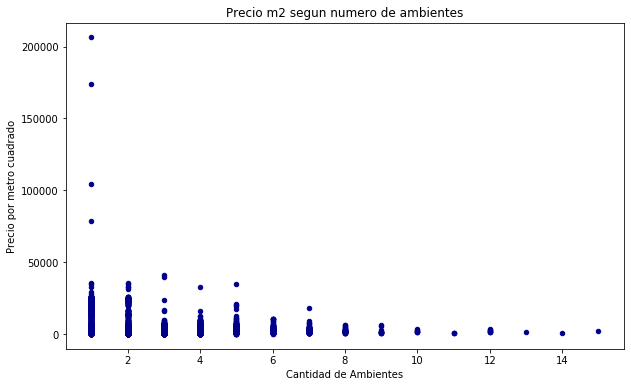

In [338]:
caba.plot(kind='scatter', x='rooms', y='price_usd_per_m2', figsize=(10, 6), color='darkblue')

plt.title('Precio m2 segun numero de ambientes')
plt.xlabel('Cantidad de Ambientes')
plt.ylabel('Precio por metro cuadrado')

plt.show()

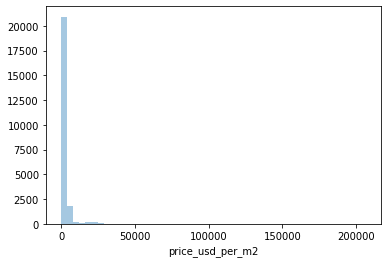

In [339]:
sns.distplot(caba[caba['price_usd_per_m2'].notnull()]['price_usd_per_m2'], kde=False);


In [340]:
caba2=caba[caba['price_usd_per_m2']<10000]

vamos a desestimar los registros que superen el precio por metro cuadrado en usd los 10.000 dado que consideramos que son inmuebles de lujos y no representan adecuadamente al dataset

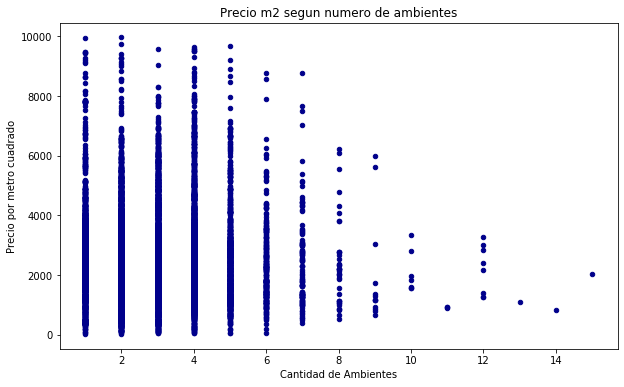

In [341]:
caba2.plot(kind='scatter', x='rooms', y='price_usd_per_m2', figsize=(10, 6), color='darkblue')

plt.title('Precio m2 segun numero de ambientes')
plt.xlabel('Cantidad de Ambientes')
plt.ylabel('Precio por metro cuadrado')

plt.show()

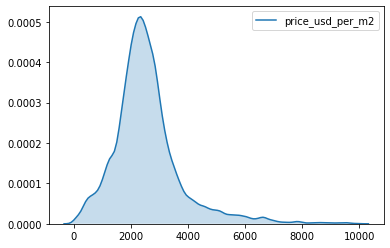

In [342]:
sns.kdeplot(caba2[caba2['price_usd_per_m2'].notnull()]['price_usd_per_m2'], shade=True)


In [343]:
#sns.kdeplot(caba2[(caba2['price_usd_per_m2'].notnull())&(caba2['property_type']=='apartment')]['price_usd_per_m2'], shade=True,legend='apartment')
#sns.kdeplot(caba2[(caba2['price_usd_per_m2'].notnull())&(caba2['property_type']=='PH')]['price_usd_per_m2'], shade=True,legend='apartment')
#sns.kdeplot(caba2[(caba2['price_usd_per_m2'].notnull())&(caba2['property_type']=='store')]['price_usd_per_m2'], shade=True,legend='apartment')
#sns.kdeplot(caba2[(caba2['price_usd_per_m2'].notnull())&(caba2['property_type']=='house')]['price_usd_per_m2'], shade=True,legend='apartment')



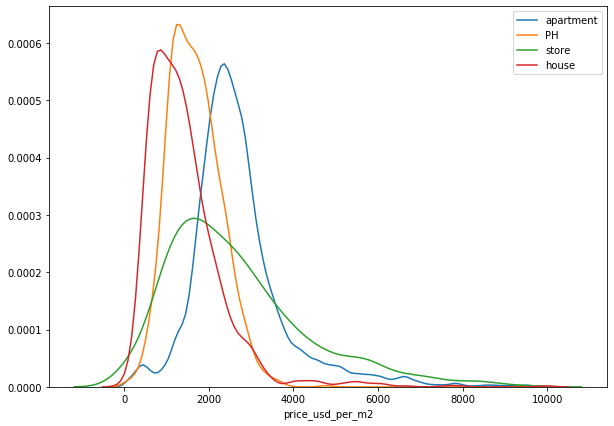

In [344]:
plt.figure(figsize=(10,7))
sns.distplot(caba2[(caba2['price_usd_per_m2'].notnull())&(caba2['property_type']=='apartment')]['price_usd_per_m2'],hist=False,label='apartment');
sns.distplot(caba2[(caba2['price_usd_per_m2'].notnull())&(caba2['property_type']=='PH')]['price_usd_per_m2'],hist=False,label='PH');
sns.distplot(caba2[(caba2['price_usd_per_m2'].notnull())&(caba2['property_type']=='store')]['price_usd_per_m2'],hist=False,label='store');
sns.distplot(caba2[(caba2['price_usd_per_m2'].notnull())&(caba2['property_type']=='house')]['price_usd_per_m2'],hist=False,label='house');


C:\Users\Mankarov\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Mankarov\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


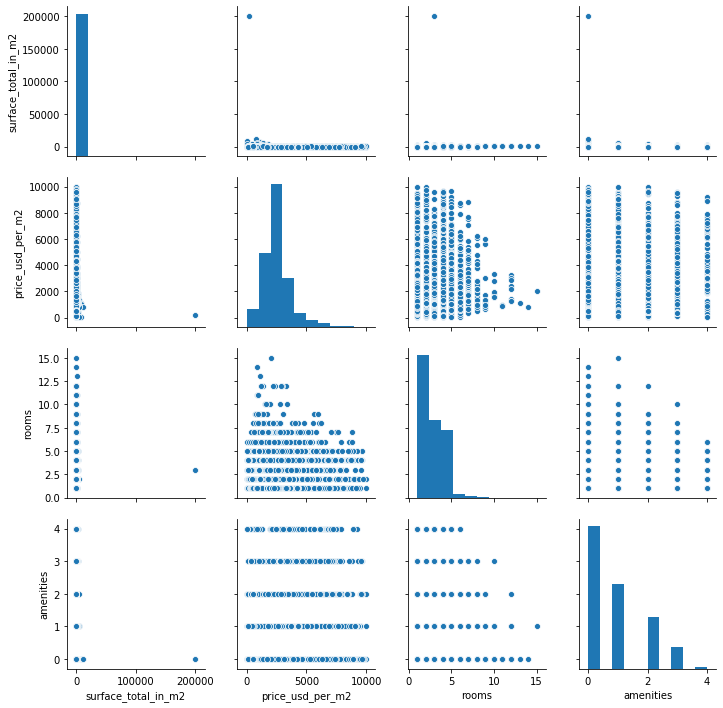

In [345]:
sns.pairplot(caba2[['surface_total_in_m2', 'price_usd_per_m2',
        'rooms','amenities']])

sigue existiendo unos valores extremos para la superficie total

In [346]:
caba2[caba2['surface_total_in_m2']>40000][['property_type','price_aprox_usd','surface_total_in_m2','price_usd_per_m2','rooms','description','title']]

,property_type,price_aprox_usd,surface_total_in_m2,price_usd_per_m2,rooms,description,title
23961,apartment,46545445.0,200000.0,232.727225,3.0,dsdffhghvcvbcdfdfghdfhghkjhkhjklhjkfgvghfghnfghgfhfg,Departamento venta


este valor outlier no me provee de informacion y parece estar desvirtuando el resto del dataset para algunos analisis particulares
sera desestimado

In [347]:
caba2.drop(labels=23961,axis=0,inplace=True)


C:\Users\Mankarov\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [348]:
zonas_caba = {'Norte': ['Barrio Norte','Las Cañitas','Nuñez','Belgrano','Colegiales','Palermo','Palermo Soho','Palermo Viejo','Palermo Hollywood','Palermo Chico','Recoleta'],
              'Sur':['Villa Real','Versalles','Liniers','Mataderos'
                                                                                    ,'Villa Lugano','Villa Riachuelo','Villa Soldati','Monte Castro','Villa Luro','Velez Sarsfield','Floresta','Parque Avellaneda','Nueva Pompeya','Pompeya','Parque Patricios','Barracas','Boca']
             ,'Centro':['Abasto','Once','Congreso','Centro / Microcentro','Saavedra',' Microcentro','Coghlan','Villa Urquiza','Villa Pueyrredón','Villa Devoto','Villa del Parque','Villa Santa Rita','Villa General Mitre','Flores','Caballito','Parque Centenario','Parque Chacabuco','Almagro','Boedo','Tribunales','Balvanera','San Cristobal','San Nicolás','Monserrat','Constitución','San Telmo','Puerto Madero','Catalinas','Retiro','Agronomía','Parque Chas','Villa Ortuzar','Paternal','Chacarita','Villa Crespo']}

In [349]:
zonas_caba_inv = {value: key for key in zonas_caba for value in zonas_caba[key]}

In [350]:
caba['zona'] = caba.ciudad.map(zonas_caba_inv).fillna(caba.ciudad)
caba2['zona'] = caba2.ciudad.map(zonas_caba_inv).fillna(caba2.ciudad)



C:\Users\Mankarov\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Mankarov\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [351]:
caba2['zona'].unique()

array(['Sur', 'Norte', 'Centro', 'Capital Federal'], dtype=object)

In [352]:
caba2.ciudad[caba.ciudad == caba.zona].unique()

array(['Capital Federal'], dtype=object)

In [353]:
caba2[caba2['zona']=='Capital Federal']['property_type'].value_counts()

house        393
apartment    363
store         54
PH            27
Name: property_type, dtype: int64

In [354]:
caba2[caba2['zona']=='Capital Federal']['price_usd_per_m2'].describe()

count     837.000000
mean     1783.069819
std      1424.334673
min        47.740529
25%       752.380952
50%      1500.000000
75%      2300.000000
max      9565.217391
Name: price_usd_per_m2, dtype: float64

In [355]:
caba2[caba2['zona']=='Capital Federal']['amenities'].value_counts()

0    317
1    272
2    172
3     66
4     10
Name: amenities, dtype: int64

In [356]:
caba2[caba2['zona']=='Capital Federal']

,property_type,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,...,moneda_local_regex,Q_Ambientes,ambiente_texto,ambiente_texto_valor,pileta,garage,jardin,parrilla,amenities,zona
108,house,Capital Federal,3.576394e+06,"-34.6,nan",-34.600746,NaN,170000.0,USD,2999565.00,170000.0,...,NaN,2.0,NaN,0.0,0,1,0,1,2,Capital Federal
110,house,Capital Federal,3.576394e+06,"-34.6,nan",-34.600746,NaN,490000.0,USD,8645805.00,490000.0,...,NaN,3.0,NaN,0.0,0,1,1,1,3,Capital Federal
115,house,Capital Federal,3.576394e+06,"-34.6,nan",-34.600746,NaN,440000.0,USD,7763580.00,440000.0,...,NaN,2.0,NaN,0.0,0,1,1,1,3,Capital Federal
119,house,Capital Federal,3.576394e+06,"-34.6,nan",-34.600746,NaN,320000.0,USD,5646240.00,320000.0,...,NaN,0.0,Tres,3.0,0,0,0,0,0,Capital Federal
121,house,Capital Federal,3.576394e+06,"-34.6,nan",-34.600746,NaN,370000.0,USD,6528465.00,370000.0,...,NaN,3.0,NaN,0.0,0,0,1,0,1,Capital Federal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115982,apartment,Capital Federal,3.576394e+06,"-34.6,nan",-34.600746,NaN,180000.0,USD,3176010.00,180000.0,...,NaN,3.0,NaN,0.0,0,1,0,0,1,Capital Federal
115985,apartment,Capital Federal,3.576394e+06,"-34.6,nan",-34.600746,NaN,231000.0,USD,4075879.50,231000.0,...,NaN,4.0,NaN,0.0,0,1,0,0,1,Capital Federal
116004,apartment,Capital Federal,3.576394e+06,"-34.6,nan",-34.600746,NaN,16100.0,USD,284076.45,16100.0,...,NaN,3.0,NaN,0.0,0,1,0,0,1,Capital Federal
116005,store,Capital Federal,3.576394e+06,"-34.6370141711,-58.4331771353",-34.600746,-58.433177,210000.0,USD,3705345.00,210000.0,...,NaN,0.0,NaN,0.0,0,0,0,0,0,Capital Federal


In [357]:
caba2[caba2['zona']=='Capital Federal']['amenities'].describe()

count    837.000000
mean       1.020311
std        1.003972
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: amenities, dtype: float64

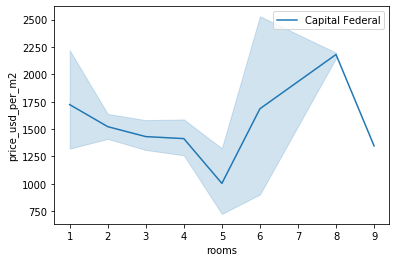

In [358]:
sns.lineplot(caba['rooms'],caba['price_usd_per_m2'][caba['zona']=='Capital Federal'],label='Capital Federal')


In [359]:
caba2['amenities'].value_counts()

0    10746
1     6378
2     3930
3     1628
4      146
Name: amenities, dtype: int64

C:\Users\Mankarov\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Mankarov\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Mankarov\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


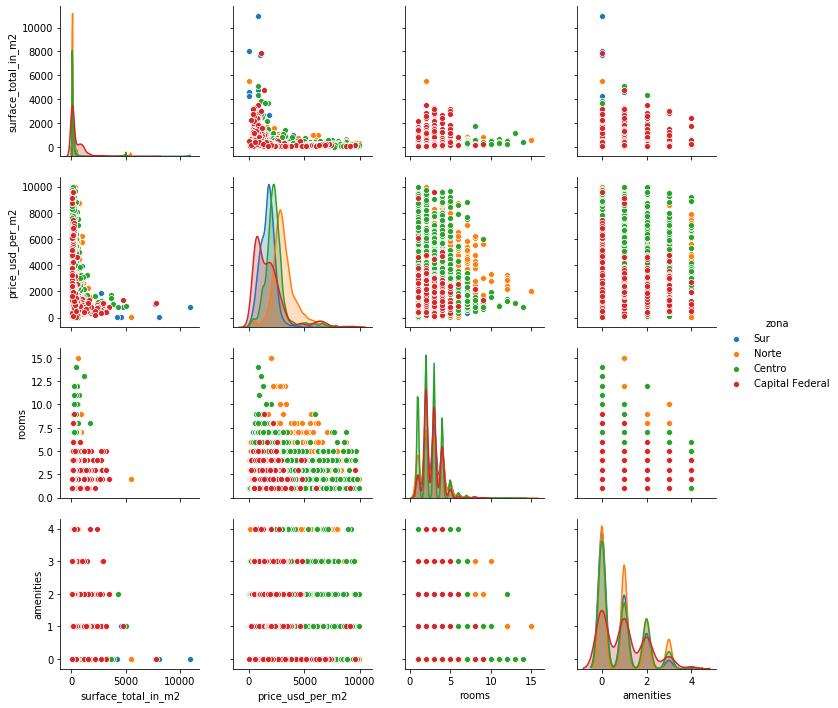

In [360]:
sns.pairplot(caba2[['surface_total_in_m2', 'price_usd_per_m2',
        'rooms','amenities','zona']],hue='zona', size=2.5)
plt.savefig('pairplot')

<Figure size 3600x3600 with 0 Axes>

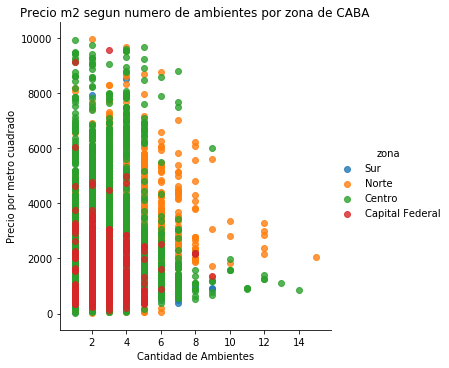

In [361]:
plt.figure(figsize=(50,50))
sns.lmplot(x='rooms',y='price_usd_per_m2',data=caba2,hue='zona',fit_reg=False)
plt.title('Precio m2 segun numero de ambientes por zona de CABA')
plt.xlabel('Cantidad de Ambientes')
plt.ylabel('Precio por metro cuadrado')
plt.show()

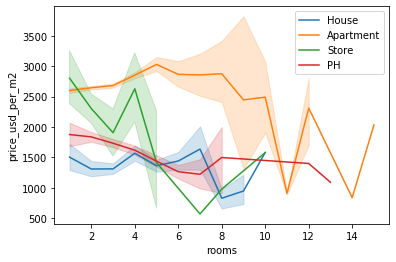

In [362]:
sns.lineplot(caba2['rooms'],caba2['price_usd_per_m2'][caba2['property_type']=='house'],label='House')
sns.lineplot(caba2['rooms'],caba2['price_usd_per_m2'][caba2['property_type']=='apartment'],label='Apartment')
sns.lineplot(caba2['rooms'],caba2['price_usd_per_m2'][caba2['property_type']=='store'],label='Store')
sns.lineplot(caba2['rooms'],caba2['price_usd_per_m2'][caba2['property_type']=='PH'],label='PH')

Text(0.5, 1.0, 'precio/m2 segun cantidad de ambientes segregado por las zonas de CABA')

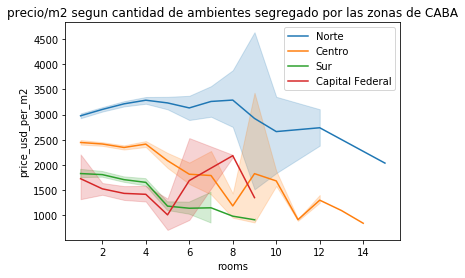

In [363]:
sns.lineplot(caba2['rooms'],caba2['price_usd_per_m2'][caba2['zona']=='Norte'],label='Norte')
sns.lineplot(caba2['rooms'],caba2['price_usd_per_m2'][caba2['zona']=='Centro'],label='Centro')
sns.lineplot(caba2['rooms'],caba2['price_usd_per_m2'][caba2['zona']=='Sur'],label='Sur')
sns.lineplot(caba2['rooms'],caba2['price_usd_per_m2'][caba2['zona']=='Capital Federal'],label='Capital Federal')
plt.title('precio/m2 segun cantidad de ambientes segregado por las zonas de CABA')

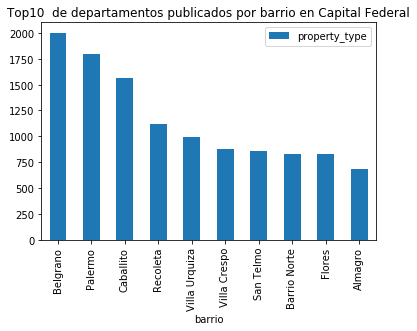

In [364]:
# top 10 de cantidades de departamentos por barrios de caba
caba2[   (caba2['property_type'] == 'apartment')
              ].groupby(by='barrio').count()\
                .reset_index().sort_values(by='price_usd_per_m2',ascending=False).head(10)\
                .plot.bar(y='property_type',x='barrio',title='Top10  de departamentos publicados por barrio en Capital Federal')

In [365]:
prope[['surface_total_in_m2', 'price_usd_per_m2',
        'rooms','pileta',
       'garage', 'jardin', 'parrilla', 'amenities']].corr()

,surface_total_in_m2,price_usd_per_m2,rooms,pileta,garage,jardin,parrilla,amenities
surface_total_in_m2,1.000000,-0.044874,0.060544,0.013901,-0.002197,0.011499,0.022447,0.017434
price_usd_per_m2,-0.044874,1.000000,-0.098665,0.086076,0.006070,-0.027407,0.046732,0.049073
rooms,0.060544,-0.098665,1.000000,0.015113,0.100292,0.059370,0.039525,0.091920
pileta,0.013901,0.086076,0.015113,1.000000,0.170723,0.083419,0.244158,0.577550
garage,-0.002197,0.006070,0.100292,0.170723,1.000000,0.093462,0.200039,0.694130
jardin,0.011499,-0.027407,0.059370,0.083419,0.093462,1.000000,0.144793,0.403317
parrilla,0.022447,0.046732,0.039525,0.244158,0.200039,0.144793,1.000000,0.703725
amenities,0.017434,0.049073,0.091920,0.577550,0.694130,0.403317,0.703725,1.000000


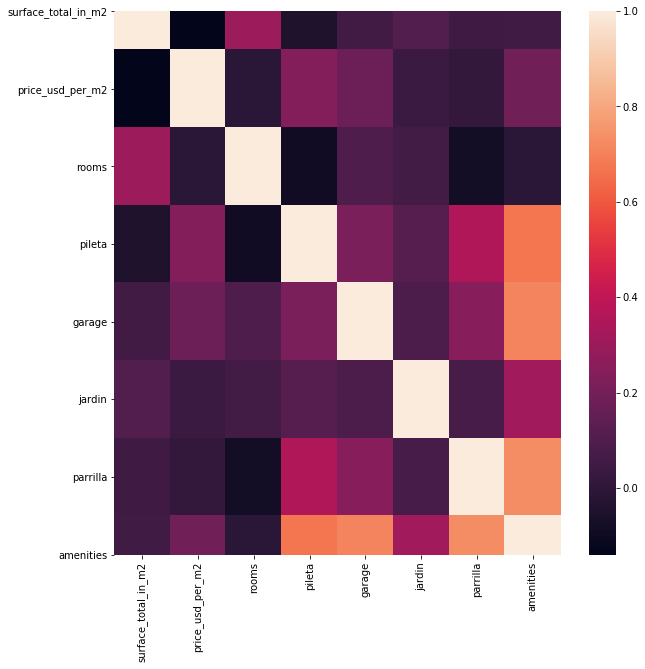

In [366]:
plt.figure(figsize=(10,10))
sns.heatmap(caba2[['surface_total_in_m2', 'price_usd_per_m2',
        'rooms','pileta',
       'garage', 'jardin', 'parrilla', 'amenities']].corr())

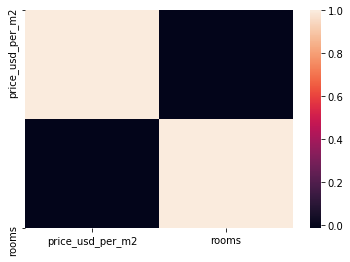

In [367]:
sns.heatmap(caba2[['price_usd_per_m2','rooms']].corr())

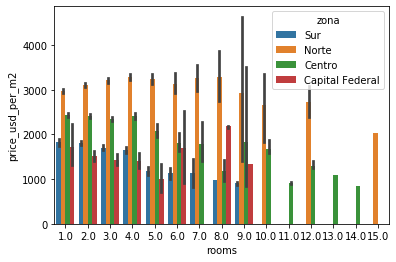

In [368]:
sns.barplot(x='rooms',y='price_usd_per_m2',data=caba2,hue='zona')

In [369]:
barrio_ordenado=caba2.groupby('barrio')['price_usd_per_m2'].mean()
barrio_ordenado.reset_index
barrio_ordenado.sort_values(ascending=False,inplace=True)
barrio_ordenado
#sns.barplot(x=barrio_ordenado['barrio'],y=barrio_ordenado['price_usd_per_m2'],data=barrio_ordenado)


barrio
Puerto Madero      5867.753580
Palermo Chico      4292.891834
Las Cañitas        3454.625590
Recoleta           3267.381742
Palermo            3262.807336
                      ...     
Parque Chas        1333.249618
Villa Lugano       1175.301939
Villa Riachuelo    1110.690766
Pompeya            1084.339734
Villa Soldati       743.666758
Name: price_usd_per_m2, Length: 62, dtype: float64

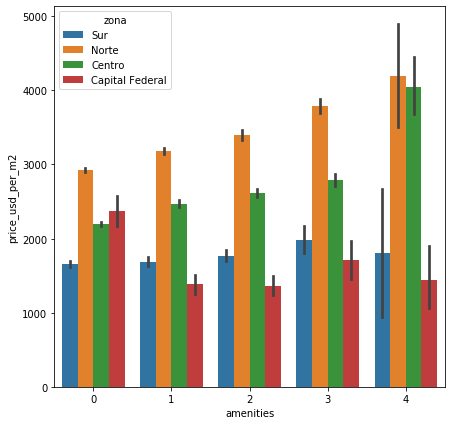

In [370]:
plt.figure(figsize=(7,7))
sns.barplot(x='amenities',y='price_usd_per_m2',data=caba2,hue='zona')
plt.show()

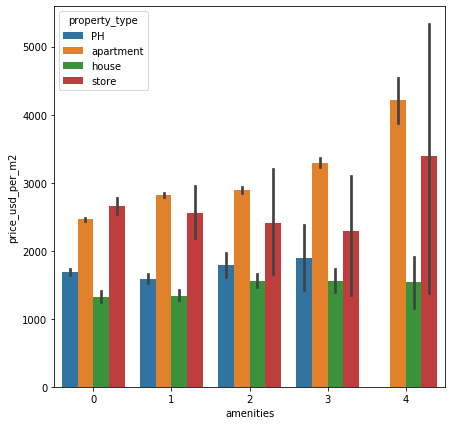

In [371]:
plt.figure(figsize=(7,7))
sns.barplot(x='amenities',y='price_usd_per_m2',data=caba2,hue='property_type')

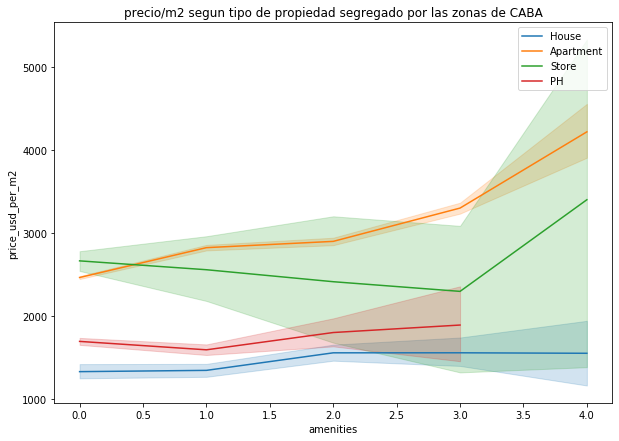

In [372]:
plt.figure(figsize=(10,7))
sns.lineplot(caba2['amenities'],caba2['price_usd_per_m2'][caba2['property_type']=='house'],label='House')
sns.lineplot(caba2['amenities'],caba2['price_usd_per_m2'][caba2['property_type']=='apartment'],label='Apartment')
sns.lineplot(caba2['amenities'],caba2['price_usd_per_m2'][caba2['property_type']=='store'],label='Store')
sns.lineplot(caba2['amenities'],caba2['price_usd_per_m2'][caba2['property_type']=='PH'],label='PH')
plt.title('precio/m2 segun tipo de propiedad segregado por las zonas de CABA')
plt.savefig('amenties_property')

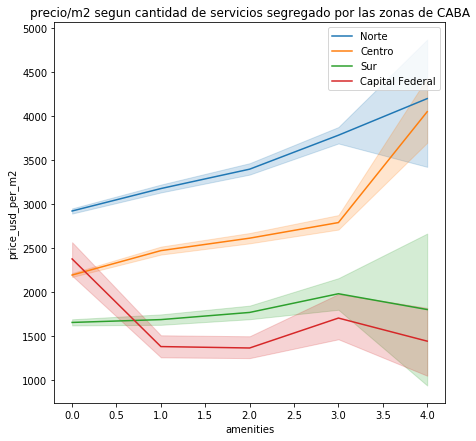

In [373]:
plt.figure(figsize=(7,7))
sns.lineplot(caba2['amenities'],caba2['price_usd_per_m2'][caba2['zona']=='Norte'],label='Norte')
sns.lineplot(caba2['amenities'],caba2['price_usd_per_m2'][caba2['zona']=='Centro'],label='Centro')
sns.lineplot(caba2['amenities'],caba2['price_usd_per_m2'][caba2['zona']=='Sur'],label='Sur')
sns.lineplot(caba2['amenities'],caba2['price_usd_per_m2'][caba2['zona']=='Capital Federal'],label='Capital Federal')
plt.title('precio/m2 segun cantidad de servicios segregado por las zonas de CABA')
plt.savefig('amenties_zona')

algo importante a remarcar en el analisis de los amenities es que no hay una relacion lineal intrinseca entre la cantidad de amentieis
dado que estamos asumiendo que ambos tienen la misma preponderancia 
a la hora de incrementar un precio del inmueble, lo cual no es cierto:Una pileta no pesa lo mismo que una parrilla, o un jardin.
Asi creemos que si bien tener mas deberia tender subir el precio, es mas seguro analizar en los dos extremos :
cuandto tenemos todos (4)y cuando no tenemos ningun servicio (0).

In [374]:
caba2[(caba2['zona']=='Capital Federal')&(caba['amenities']==4)][['price_usd_per_m2','surface_total_in_m2','amenities']].sort_values(by='amenities',ascending=False).head(20)

C:\Users\Mankarov\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,price_usd_per_m2,surface_total_in_m2,amenities
16451,901.041667,192.0,4
17023,812.500000,2400.0,4
20678,515.759312,1745.0,4
20912,1914.893617,141.0,4
34270,1289.062500,128.0,4
34272,1283.783784,148.0,4
34755,1053.571429,560.0,4
44051,2714.285714,105.0,4
47582,1980.676329,207.0,4
48113,1980.676329,207.0,4


In [375]:
print(caba2[(caba2['zona']=='Capital Federal')&(caba['amenities']==4)]['price_usd_per_m2'].describe())
print(caba2[(caba2['zona']=='Capital Federal')&(caba['amenities']==3)]['price_usd_per_m2'].describe())


count      10.000000
mean     1444.625068
std       680.583227
min       515.759312
25%       939.174107
50%      1286.423142
75%      1964.230651
max      2714.285714
Name: price_usd_per_m2, dtype: float64
count      66.000000
mean     1706.973113
std      1072.250303
min       390.243902
25%       790.044977
50%      1353.549103
75%      2524.752475
max      4776.119403
Name: price_usd_per_m2, dtype: float64


C:\Users\Mankarov\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\Mankarov\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


vemos que al ser pocos valores para Capital Federal con amenities = 4 
los valores indivualesson inferiores a los del resto de los casos para Capital Federal 
(que son de diversas localidad que no pudieron ser identificadas)
tiran el numero hacia abajo para el analisis por precio usd per m2 por zona y por Q_ Amenities


In [393]:
caba2=caba2[(caba2['zona']!='Capital Federal')]

dado que Capital Federal no me esta aportando informacion y me puede sesgar algunos insights del analisis por barrio (no pudiendo limpiarse esos registros con metodos de geolocalizacion), vamos a desestimarlo para el analisis particular.

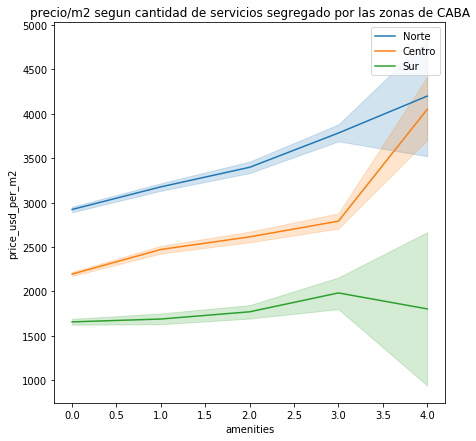

In [391]:
plt.figure(figsize=(7,7))
sns.lineplot(caba2['amenities'],caba2['price_usd_per_m2'][caba2['zona']=='Norte'],label='Norte')
sns.lineplot(caba2['amenities'],caba2['price_usd_per_m2'][caba2['zona']=='Centro'],label='Centro')
sns.lineplot(caba2['amenities'],caba2['price_usd_per_m2'][caba2['zona']=='Sur'],label='Sur')
plt.title('precio/m2 segun cantidad de servicios segregado por las zonas de CABA')
plt.savefig('amenties_zona2')

In [394]:

print(caba2[(caba2['zona']=='Sur')&(caba['amenities']==3)]['price_usd_per_m2'].describe())
print(caba2[(caba2['zona']=='Sur')&(caba['amenities']==4)]['price_usd_per_m2'].describe())


count      75.000000
mean     1983.300439
std       787.867162
min       409.090909
25%      1186.956522
50%      2214.285714
75%      2384.615385
max      4150.943396
Name: price_usd_per_m2, dtype: float64
count       2.000000
mean     1803.763441
std      1220.329445
min       940.860215
25%      1372.311828
50%      1803.763441
75%      2235.215054
max      2666.666667
Name: price_usd_per_m2, dtype: float64


C:\Users\Mankarov\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\Mankarov\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


dado que Capital Federal no me esta aportando informacion y me puede sesgar algunos insights del analisis por barrio (no pudiendo limpiarse esos registros con metodos de geolocalizacion), vamos a desestimarlo para el analisis particular.

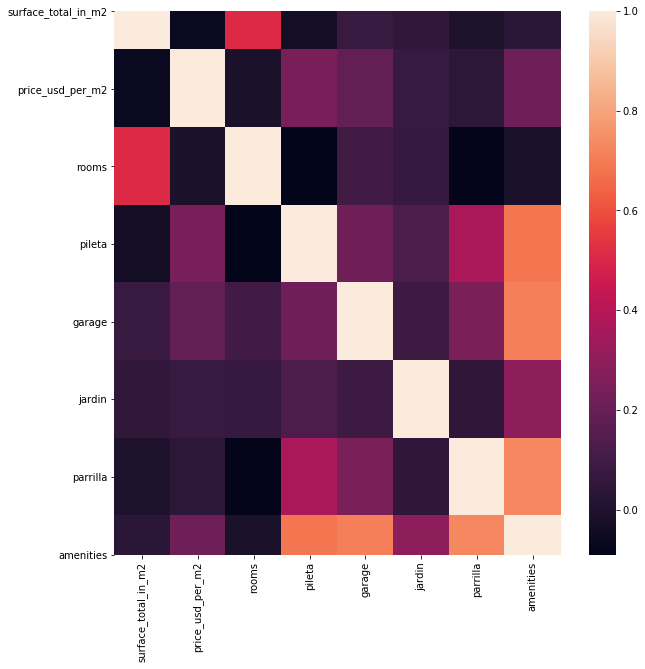

In [378]:
plt.figure(figsize=(10,10))
sns.heatmap(caba2[['surface_total_in_m2', 'price_usd_per_m2',
        'rooms','pileta',
       'garage', 'jardin', 'parrilla', 'amenities']].corr())

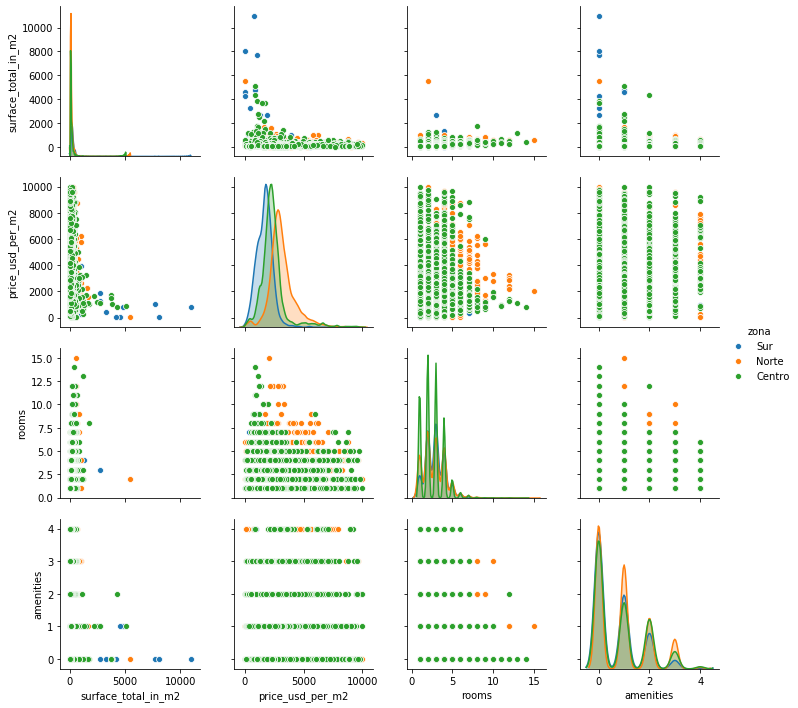

In [379]:
sns.pairplot(caba2[['surface_total_in_m2', 'price_usd_per_m2',
        'rooms','amenities','zona']],hue='zona', size=2.5)
plt.savefig('pairplot')

In [380]:
caba2[['price_aprox_usd','surface_total_in_m2','price_usd_per_m2','price_per_m2','rooms','pileta','garage','jardin',
    'parrilla','amenities']].corr()

,price_aprox_usd,surface_total_in_m2,price_usd_per_m2,price_per_m2,rooms,pileta,garage,jardin,parrilla,amenities
price_aprox_usd,1.000000,0.611663,0.437555,0.045354,0.431353,0.068891,0.216607,0.108987,0.019830,0.162780
surface_total_in_m2,0.611663,1.000000,-0.058640,-0.018937,0.506434,-0.036222,0.074230,0.052594,-0.001369,0.031770
price_usd_per_m2,0.437555,-0.058640,1.000000,0.097837,-0.010219,0.243431,0.187140,0.071948,0.040726,0.218064
price_per_m2,0.045354,-0.018937,0.097837,1.000000,-0.034127,0.101669,0.038572,0.073552,0.052249,0.095954
rooms,0.431353,0.506434,-0.010219,-0.034127,1.000000,-0.090618,0.099272,0.070851,-0.083052,-0.010427
pileta,0.068891,-0.036222,0.243431,0.101669,-0.090618,1.000000,0.219204,0.129950,0.367080,0.684830
garage,0.216607,0.074230,0.187140,0.038572,0.099272,0.219204,1.000000,0.082842,0.253327,0.707952
jardin,0.108987,0.052594,0.071948,0.073552,0.070851,0.129950,0.082842,1.000000,0.047344,0.298473
parrilla,0.019830,-0.001369,0.040726,0.052249,-0.083052,0.367080,0.253327,0.047344,1.000000,0.729438
amenities,0.162780,0.031770,0.218064,0.095954,-0.010427,0.684830,0.707952,0.298473,0.729438,1.000000


In [381]:
caba2[['price_aprox_usd','surface_total_in_m2','price_usd_per_m2','price_per_m2','rooms','pileta','garage','jardin',
    'parrilla','amenities']].describe()

,price_aprox_usd,surface_total_in_m2,price_usd_per_m2,price_per_m2,rooms,pileta,garage,jardin,parrilla,amenities
count,2.186900e+04,21991.000000,21991.000000,20695.000000,18068.000000,21991.000000,21991.000000,21991.000000,21991.000000,21991.000000
mean,2.523693e+05,100.365741,2606.484387,5597.212439,2.700077,0.173889,0.374881,0.034560,0.273930,0.857260
std,3.333884e+05,175.394650,1189.154229,15984.085425,1.324809,0.379023,0.484103,0.182666,0.445984,0.982126
min,5.103610e+03,10.000000,11.284822,24.207190,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.050000e+05,43.000000,1939.393939,2250.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.524400e+05,63.000000,2437.500000,2839.506173,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2.650000e+05,110.000000,3000.000000,3583.033573,4.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,8.500000e+06,10958.000000,9966.666667,692046.000000,15.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [382]:
caba2[['surface_total_in_m2', 'price_usd_per_m2',
        'rooms','pileta',
       'garage', 'jardin', 'parrilla', 'amenities']].describe()

,surface_total_in_m2,price_usd_per_m2,rooms,pileta,garage,jardin,parrilla,amenities
count,21991.000000,21991.000000,18068.000000,21991.000000,21991.000000,21991.000000,21991.000000,21991.000000
mean,100.365741,2606.484387,2.700077,0.173889,0.374881,0.034560,0.273930,0.857260
std,175.394650,1189.154229,1.324809,0.379023,0.484103,0.182666,0.445984,0.982126
min,10.000000,11.284822,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,43.000000,1939.393939,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,63.000000,2437.500000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,110.000000,3000.000000,4.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,10958.000000,9966.666667,15.000000,1.000000,1.000000,1.000000,1.000000,4.000000


Text(37.45955729166667, 0.5, 'Precio por metro cuadrado')

<Figure size 720x504 with 0 Axes>

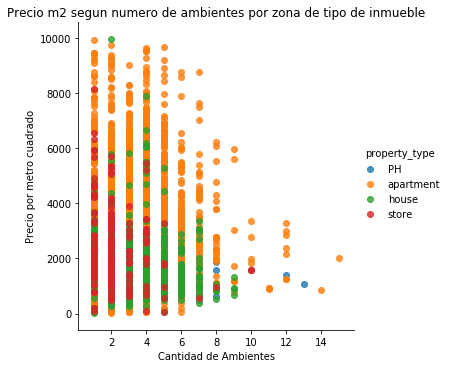

In [383]:
plt.figure(figsize=(10,7))


sns.lmplot(x='rooms',y='price_usd_per_m2',data=caba2,hue='property_type',fit_reg=False)
plt.title('Precio m2 segun numero de ambientes por zona de tipo de inmueble')
plt.xlabel('Cantidad de Ambientes')
plt.ylabel('Precio por metro cuadrado')


In [384]:
#geometry=[Point(xy) for xy in zip (caba['lat'],cabaa['lon'])]
#geometry[:3]

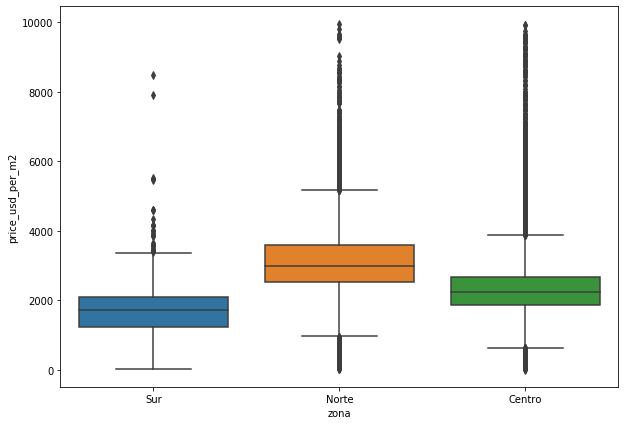

In [385]:
plt.figure(figsize=(10,7))
sns.boxplot(x='zona',y='price_usd_per_m2',data=caba2)

In [386]:
caba2.groupby('zona')['price_usd_per_m2'].describe()

,count,mean,std,min,25%,50%,75%,max
zona,,,,,,,,
Centro,11633.0,2397.940958,1143.037106,11.284822,1853.658537,2250.000000,2666.444444,9938.571429
Norte,8103.0,3159.982249,1110.371225,13.272807,2539.841270,2987.804878,3593.750000,9966.666667
Sur,2255.0,1693.399035,679.471259,13.797467,1236.263736,1728.571429,2091.958721,8490.566038


In [387]:
caba2['price_usd_per_m2'].describe()

count    21991.000000
mean      2606.484387
std       1189.154229
min         11.284822
25%       1939.393939
50%       2437.500000
75%       3000.000000
max       9966.666667
Name: price_usd_per_m2, dtype: float64

In [389]:
caba2.to_csv(r'C:\Users\Mankarov\Downloads\caba.csv')
